In [ ]:
for x in range(0, 3):
    print("We're on time %d" % (x))

In [ ]:
for x in range(0, 3):
    print("We're on time %d" % (x))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


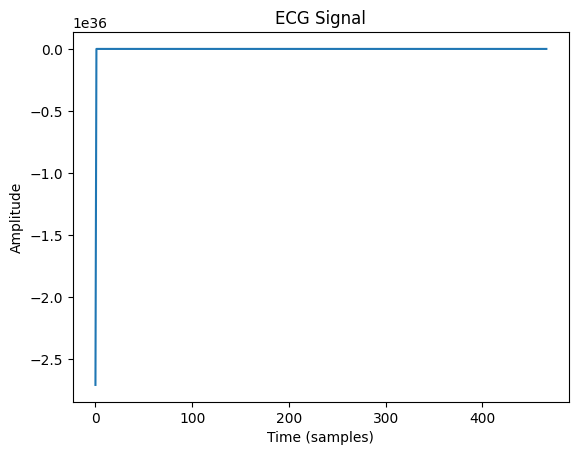

In [40]:
import numpy as np
import matplotlib.pyplot as plt
myarray = np.fromfile('mit-bih-arrhythmia-database-1.0.0 2/108.atr',dtype=np.complex64)
if myarray.size > 0:
    plt.plot(myarray[:1000])
    plt.title("ECG Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define the model architecture
model = Sequential()

# Add a 1D Convolutional layer (for time-series data like ECG)
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_length, 1)))  # input_length is the length of your ECG segment

# Add MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Add a second convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu'))

# Add another MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to pass it to fully connected layers
model.add(Flatten())

# Add fully connected layer
model.add(Dense(128, activation='relu'))

# Add Dropout for regularization
model.add(Dropout(0.5))

# Output layer: 1 neuron (binary classification: peak or not peak)
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



ModuleNotFoundError: No module named 'keras'

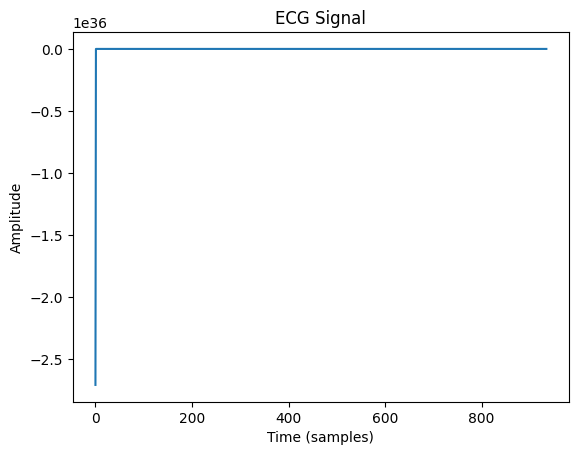

In [44]:
import numpy as np
import matplotlib.pyplot as plt
real_part = np.real(myarray)
myarray = np.fromfile('mit-bih-arrhythmia-database-1.0.0 2/108.atr',dtype=np.float32)
if myarray.size > 0:
    plt.plot(myarray[:1000])
    plt.title("ECG Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()





In [78]:
import wfdb
file_path = '/Users/madalynneufeld/Desktop/RIC2002/data/mit-bih-arrhythmia-database-1.0.0 2/108'
record = wfdb.rdann(file_path, 'atr')

# Print the annotations to verify if they were successfully read
print(record)



In [76]:
import os
file_path = '/Users/madalynneufeld/Desktop/RIC 2002 /data'
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist!")

: 

In [71]:
import os
print(os.getcwd())
/Users/madalynneufeld/Desktop/RIC 2002 /data

/Users/madalynneufeld/Desktop/RIC2002 /data


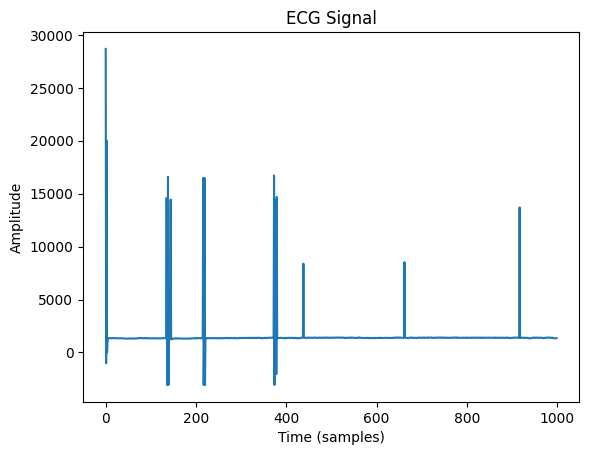

In [1]:
import numpy as np
import matplotlib.pyplot as plt
myarray = np.fromfile('/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/101.atr',dtype=np.int16)
if myarray.size > 0:
    plt.plot(myarray[:1000])
    plt.title("ECG Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()


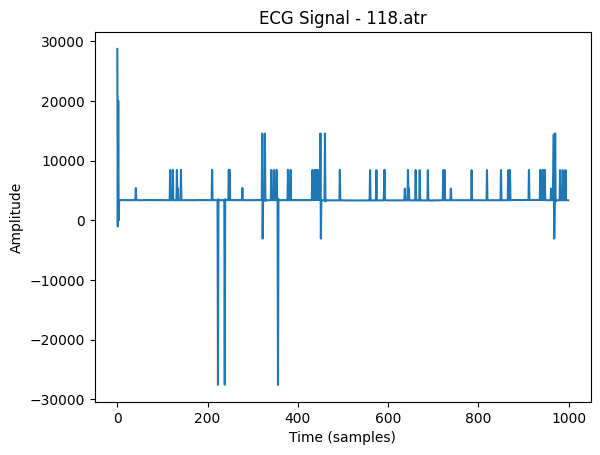

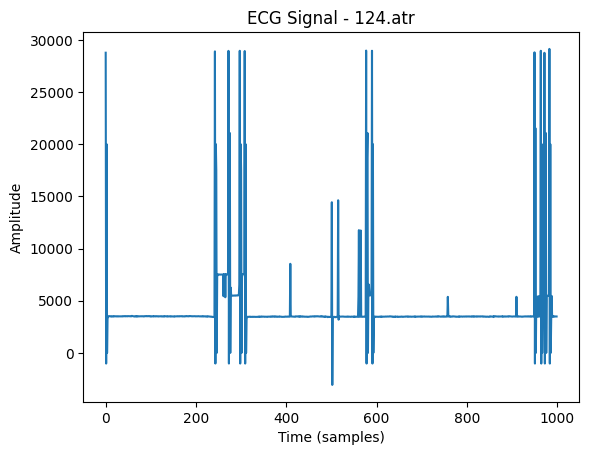

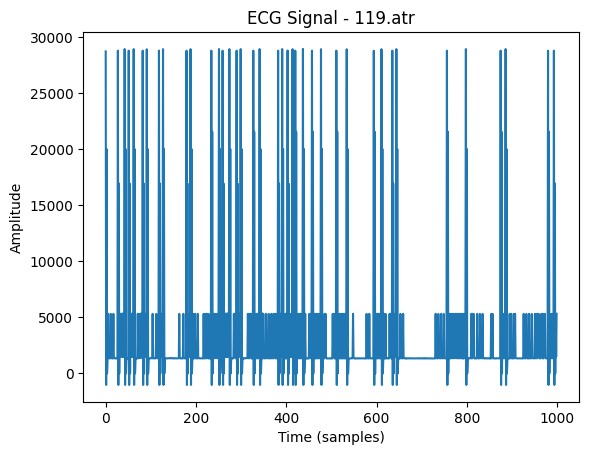

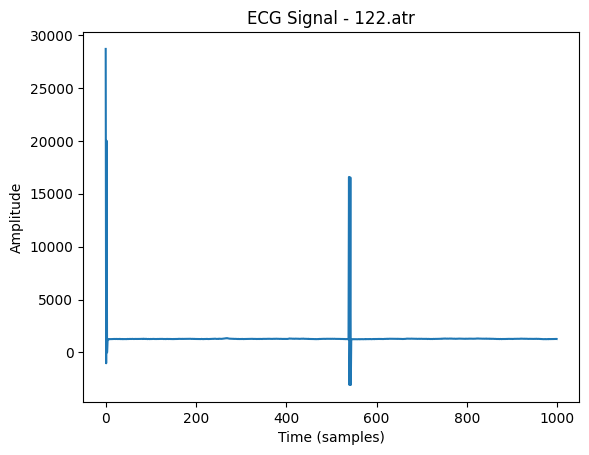

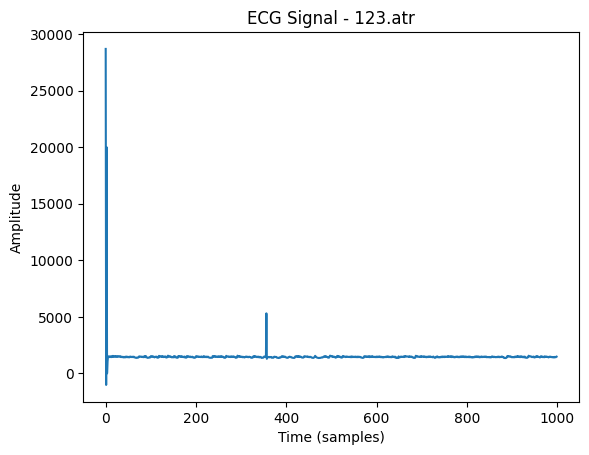

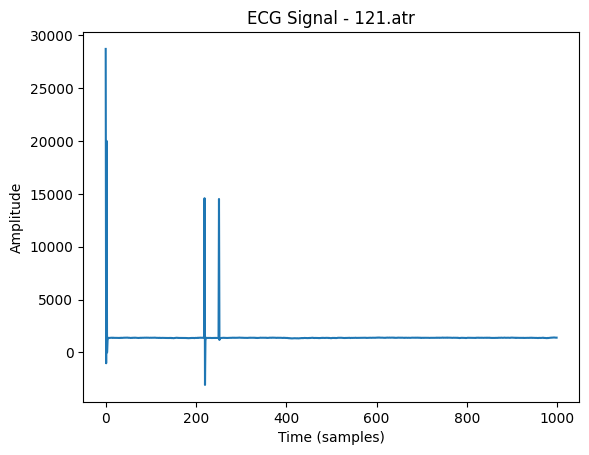

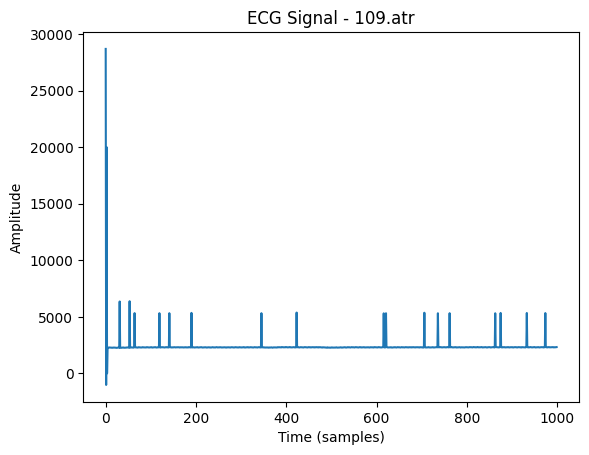

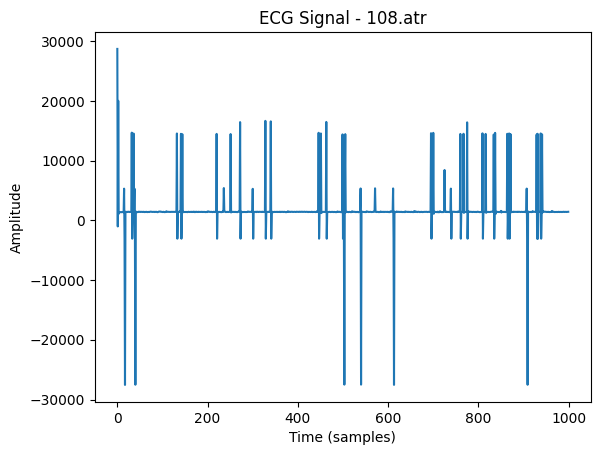

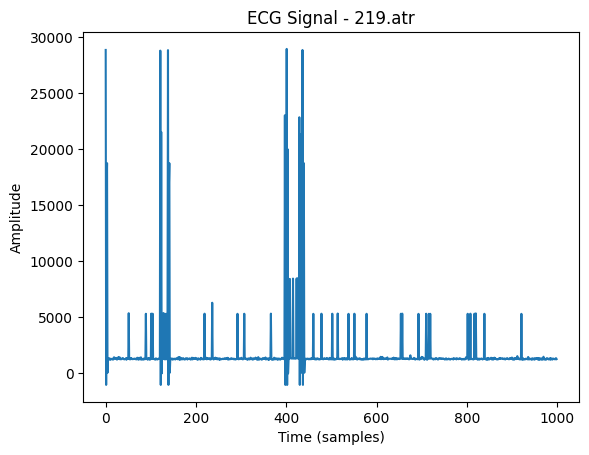

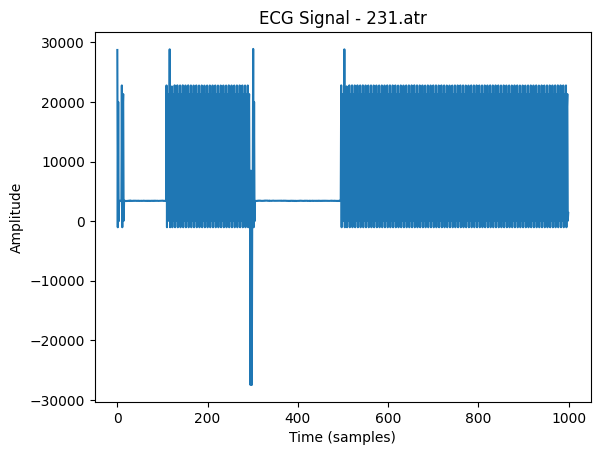

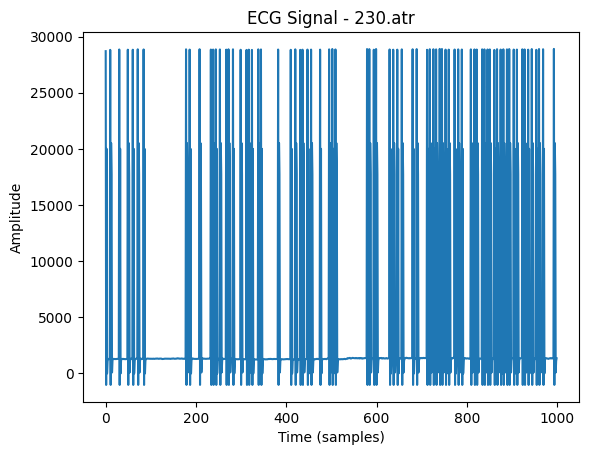

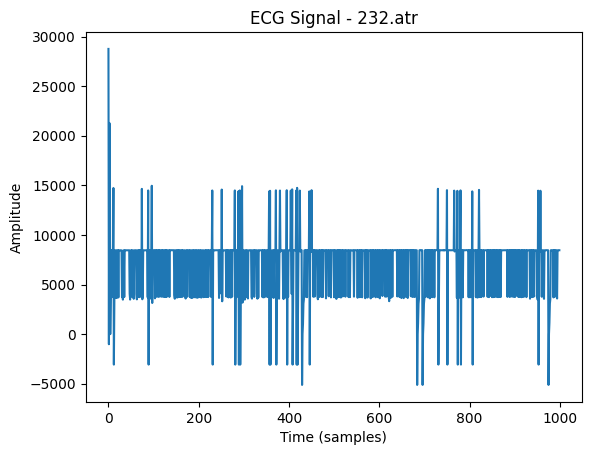

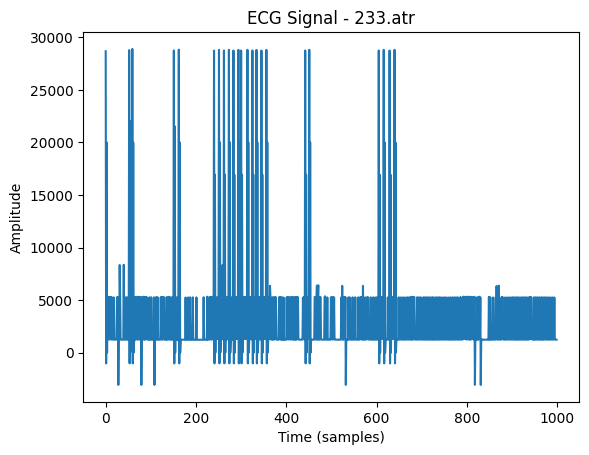

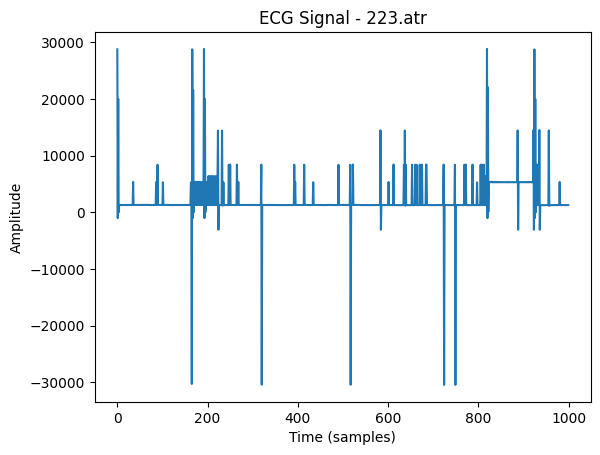

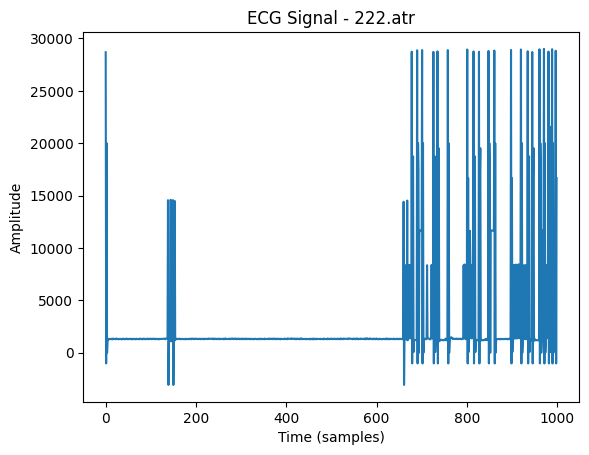

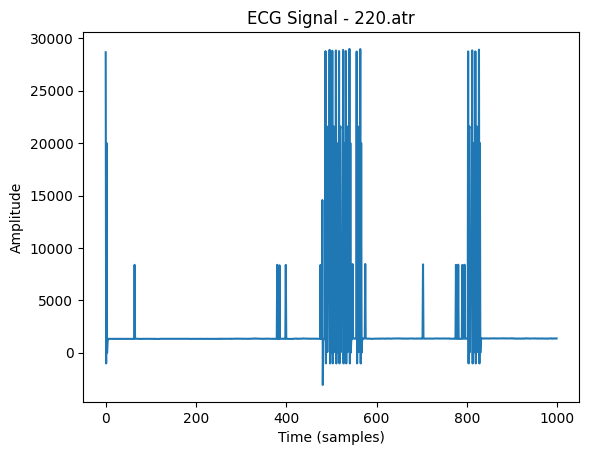

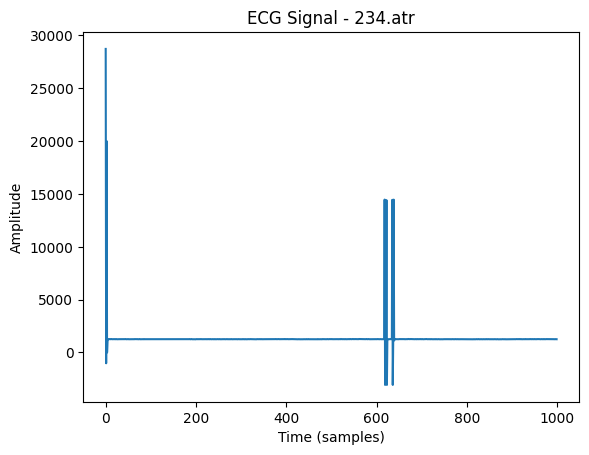

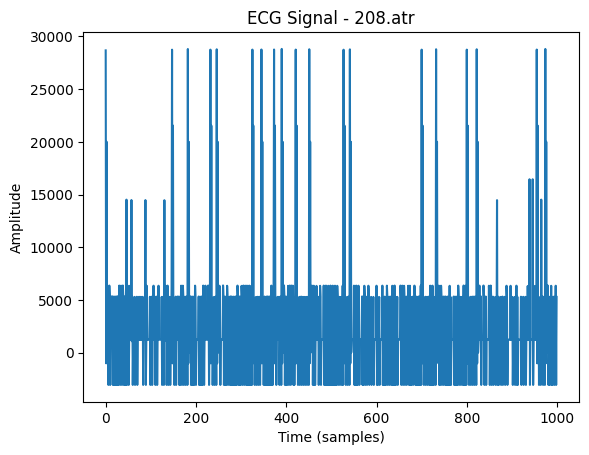

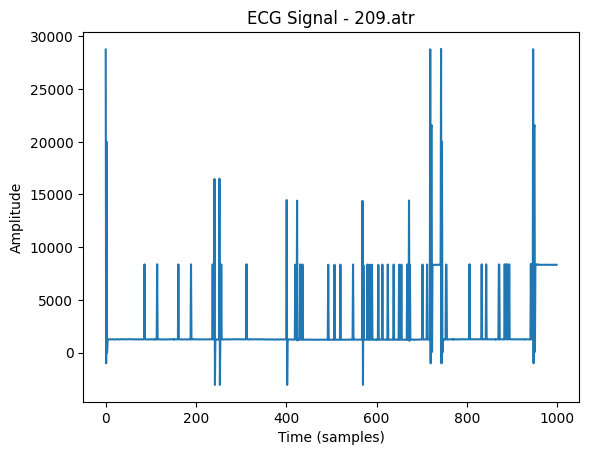

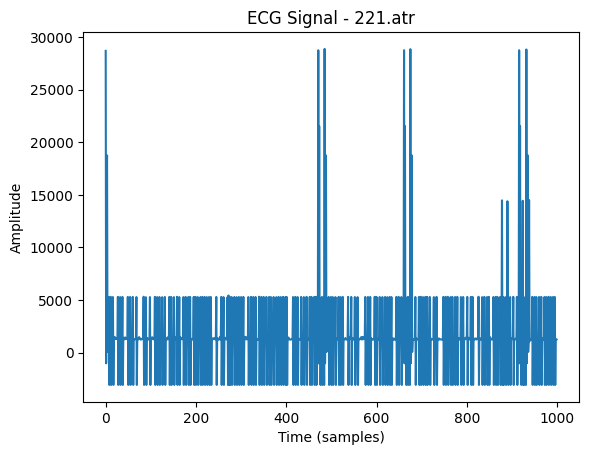

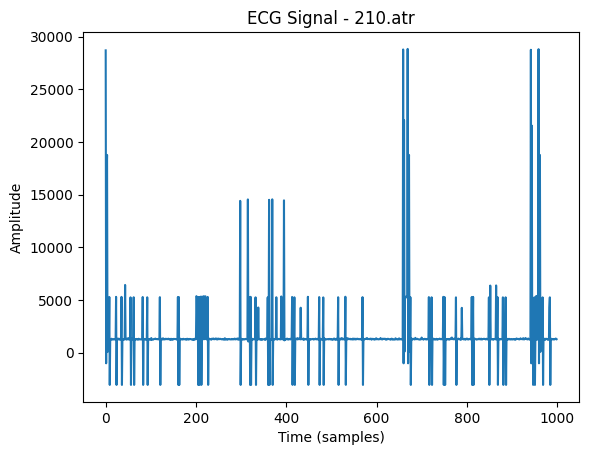

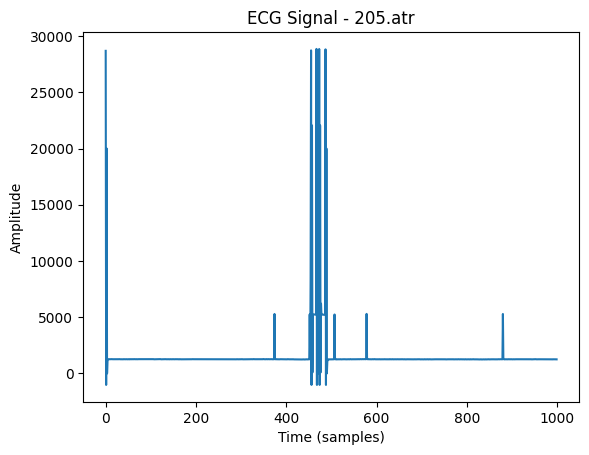

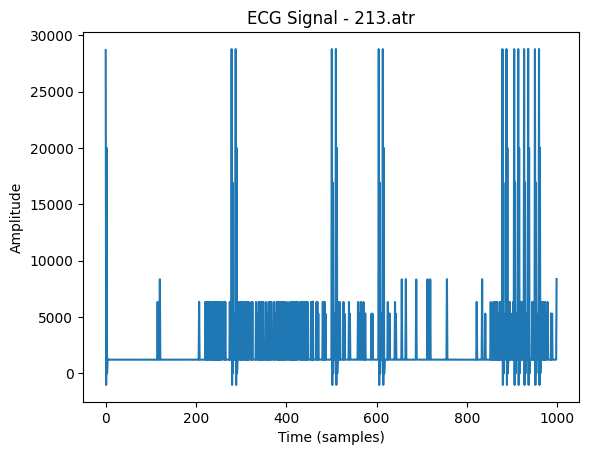

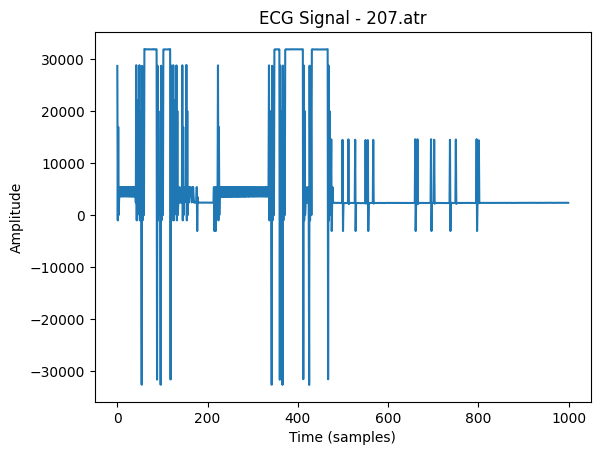

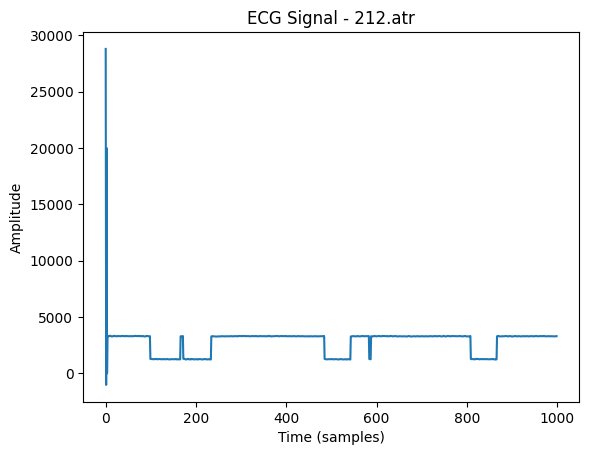

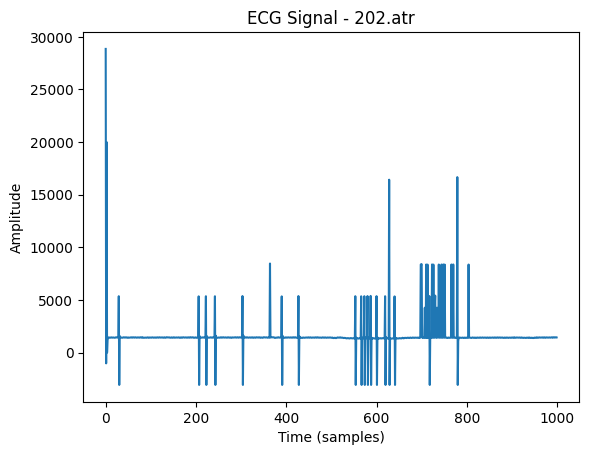

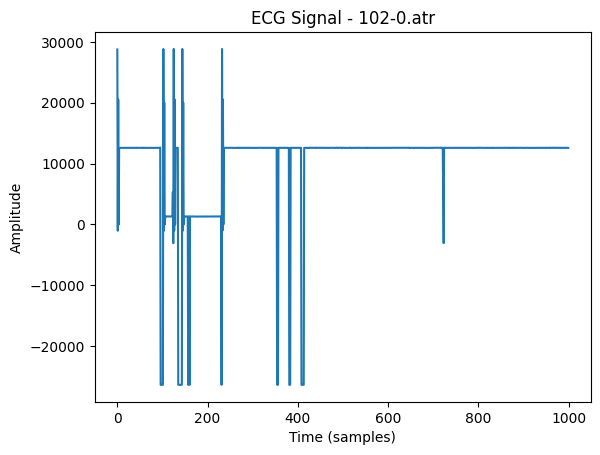

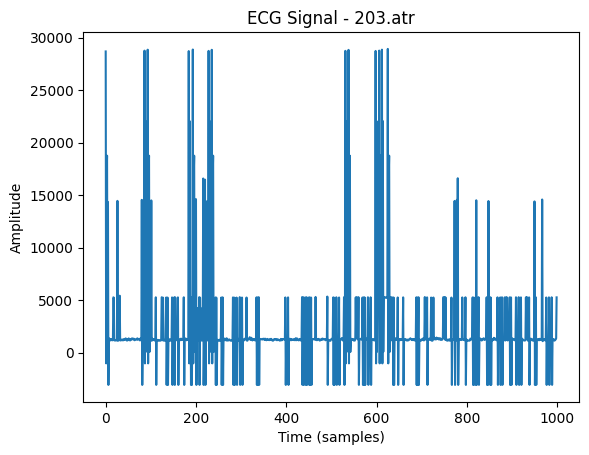

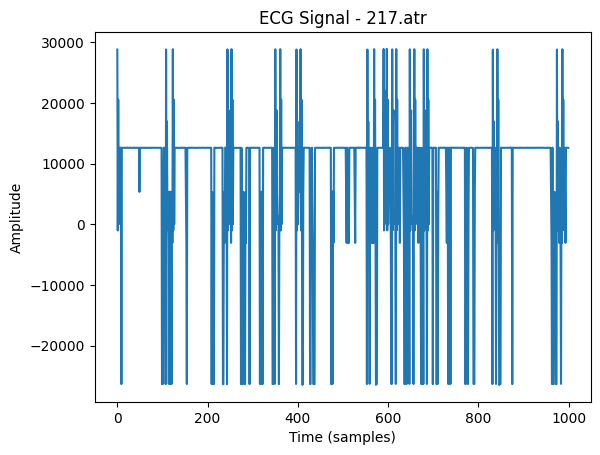

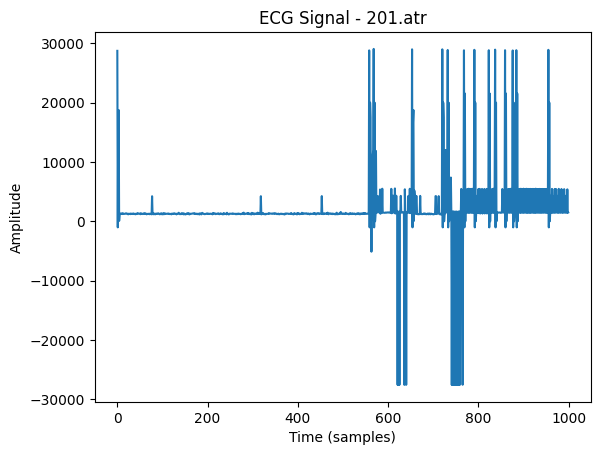

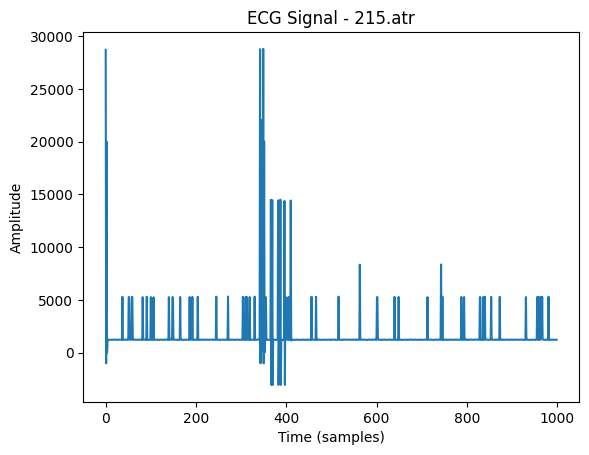

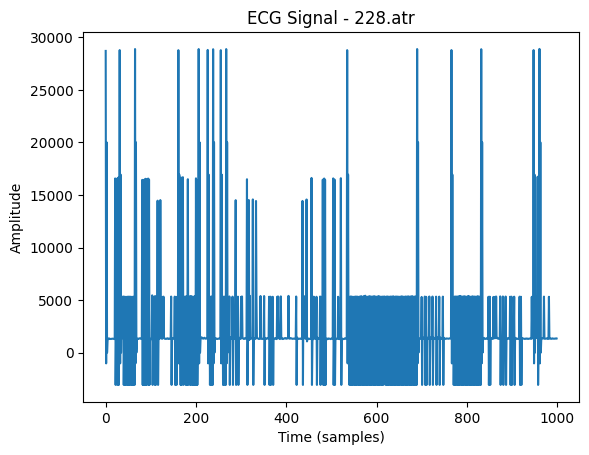

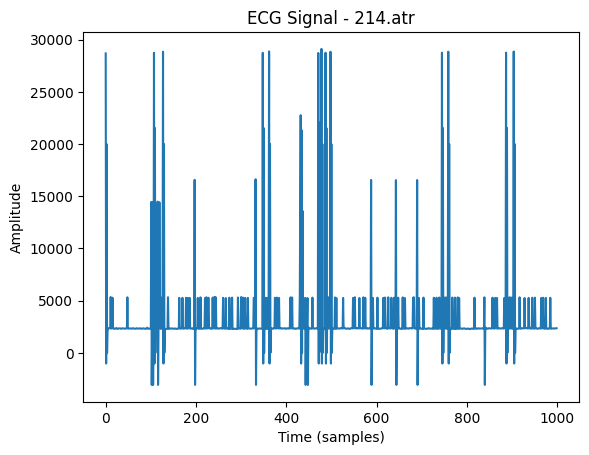

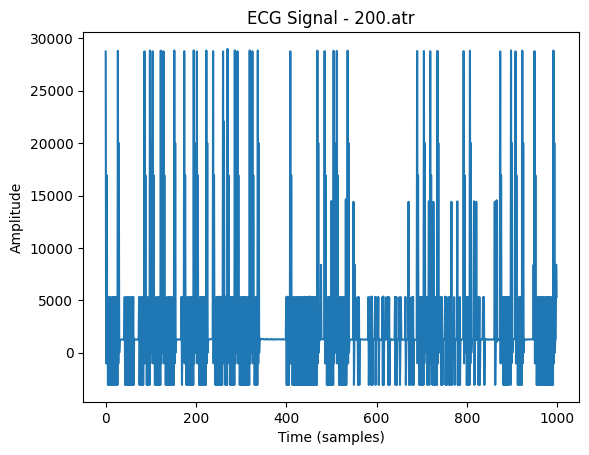

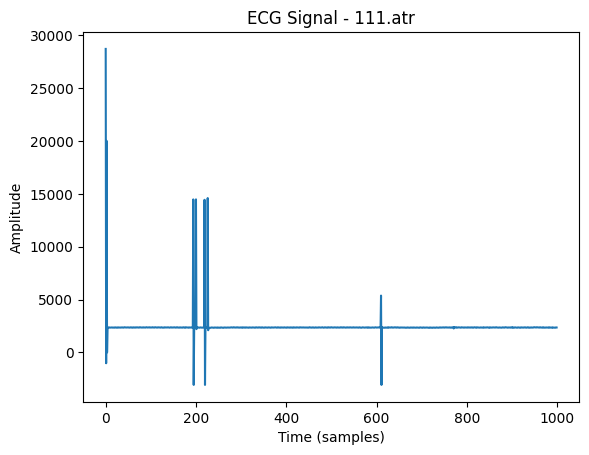

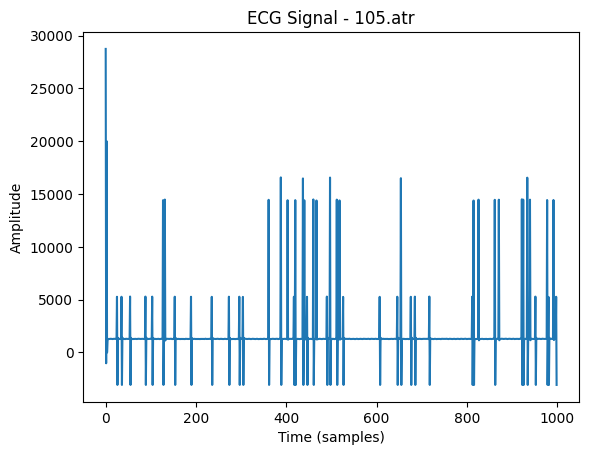

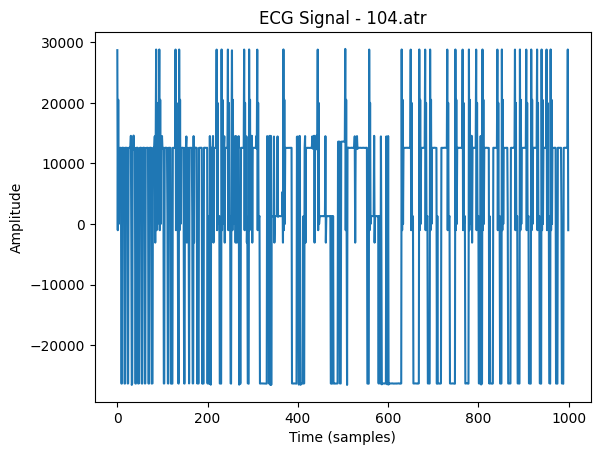

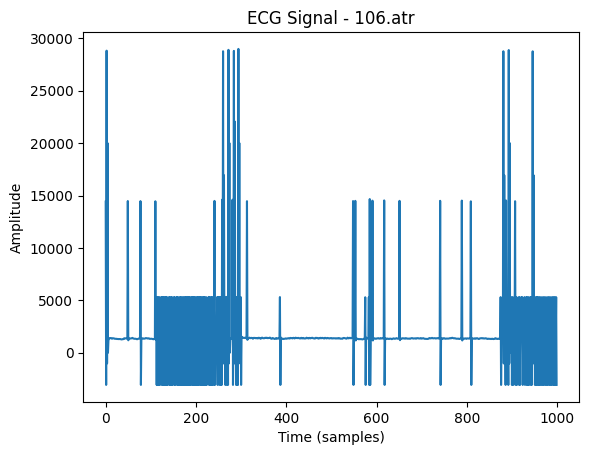

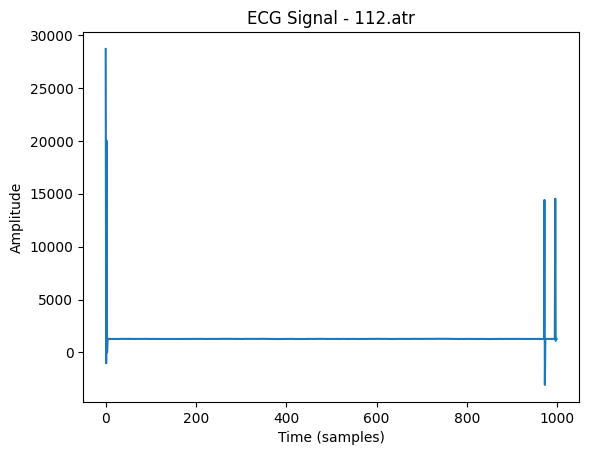

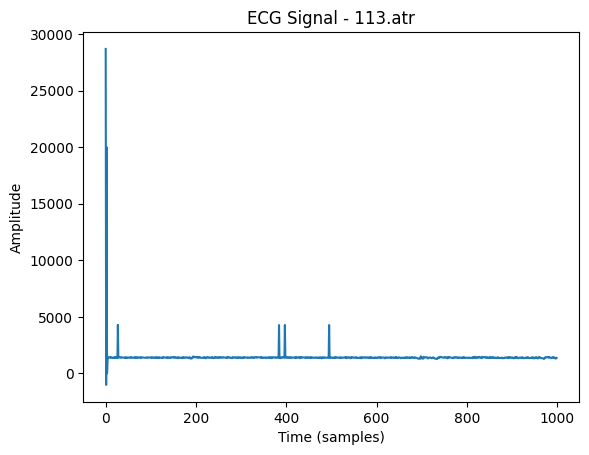

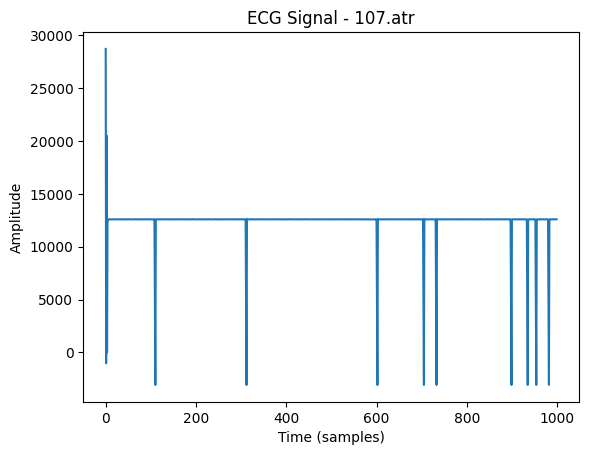

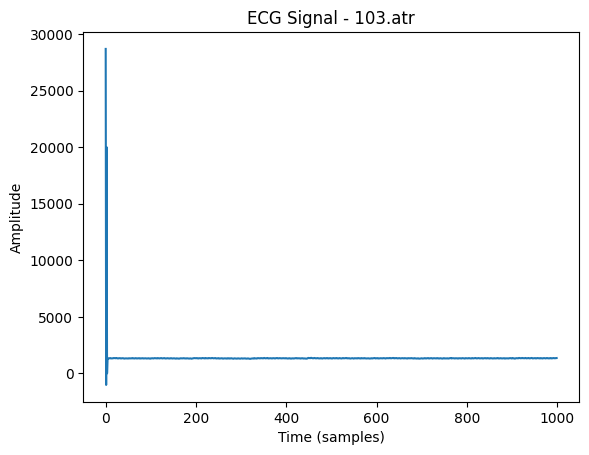

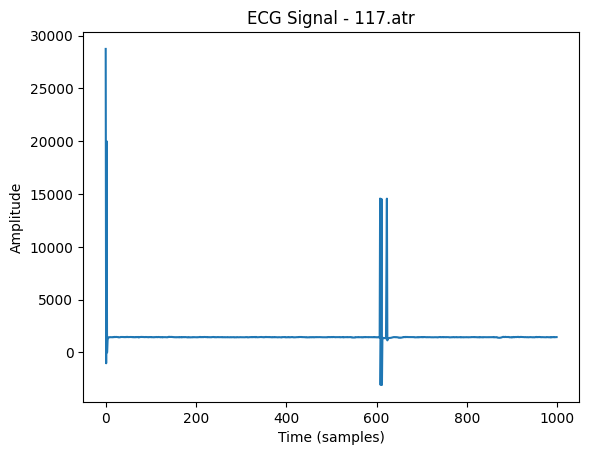

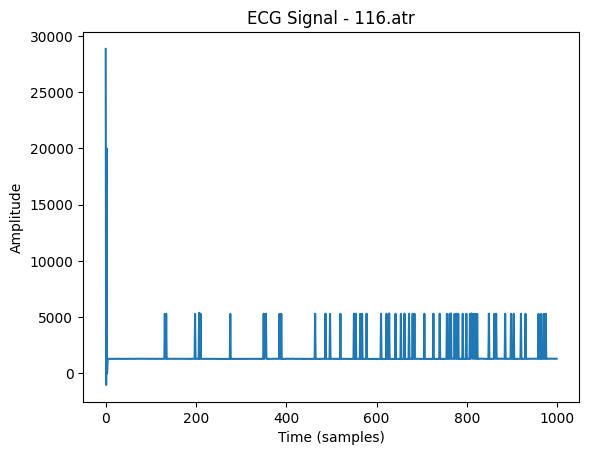

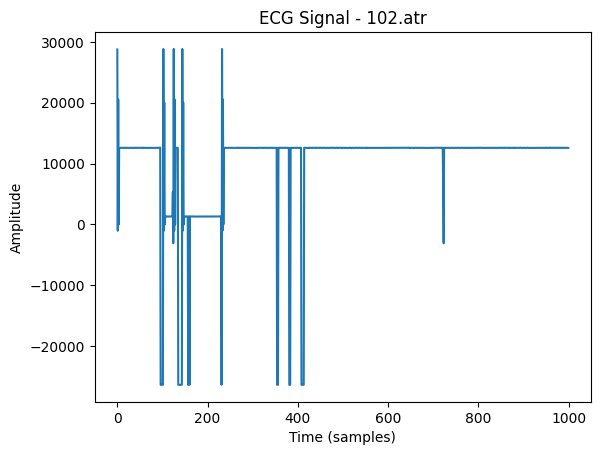

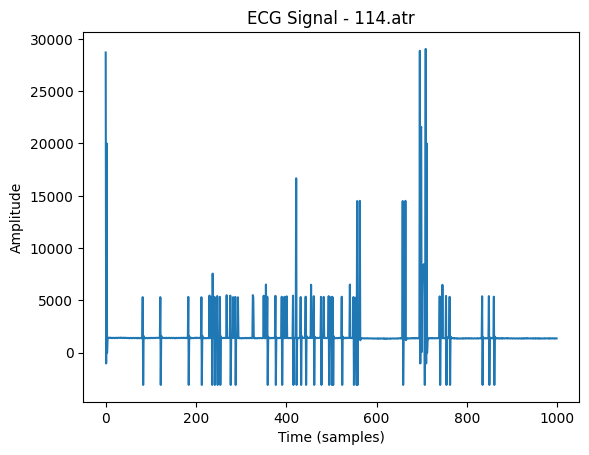

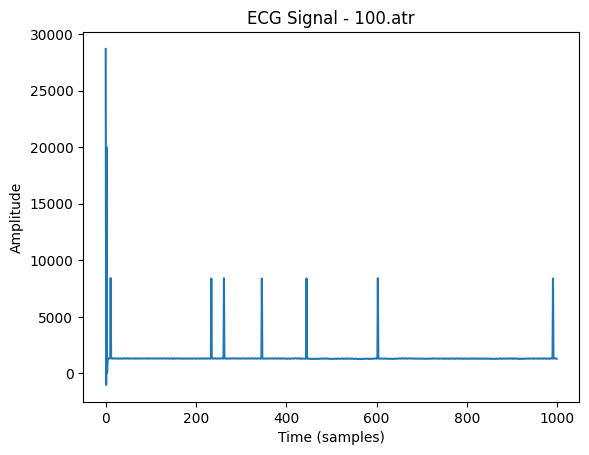

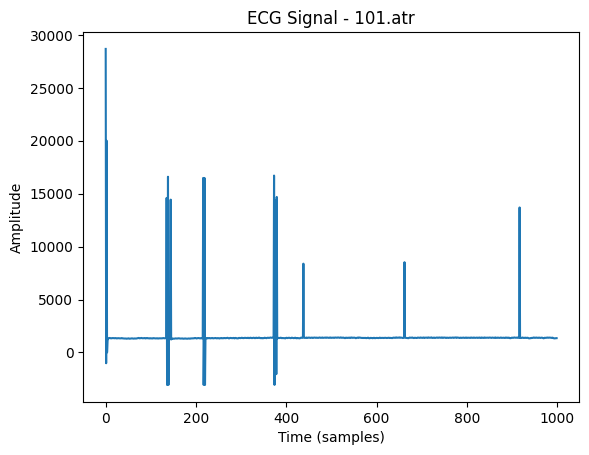

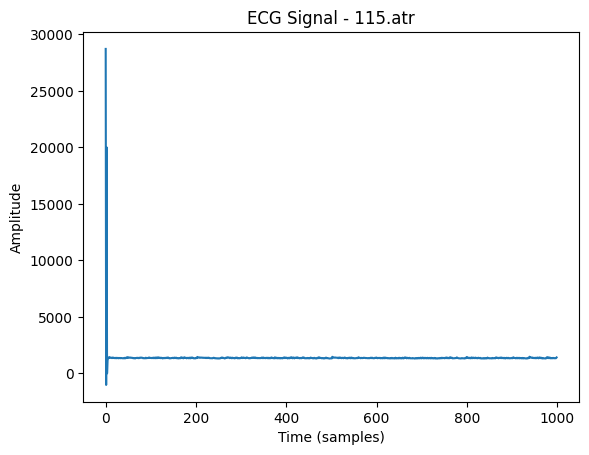

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

data_directory = '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/'
files = os.listdir(data_directory)

for x in range(0, len(files)):
    file = files[x]
    if file.endswith('.atr'): 
        file_path = os.path.join(data_directory, file)

        try:

            myarray = np.fromfile(file_path, dtype=np.int16)

            if myarray.size > 0:
                plt.plot(myarray[:1000]) 
                plt.title(f"ECG Signal - {file}")
                plt.xlabel("Time (samples)")
                plt.ylabel("Amplitude")
                plt.show()

        except Exception as e:
            print(f"Error reading {file}: {e}")


In [ ]:
#checking if torch downloaded
import torch
print(torch.__version__)


2.6.0


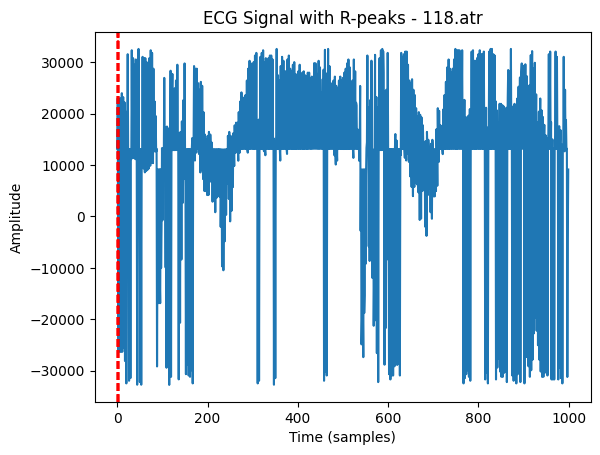

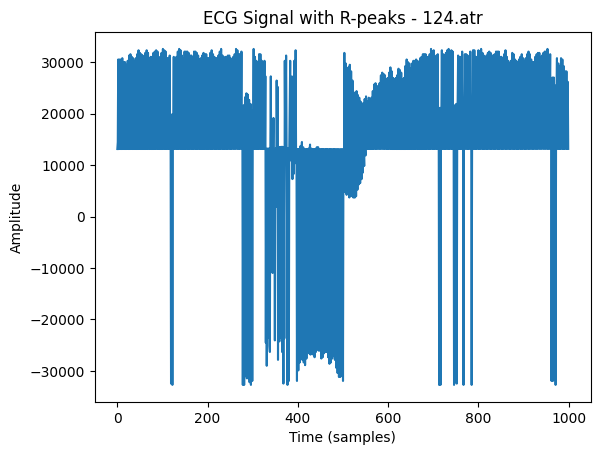

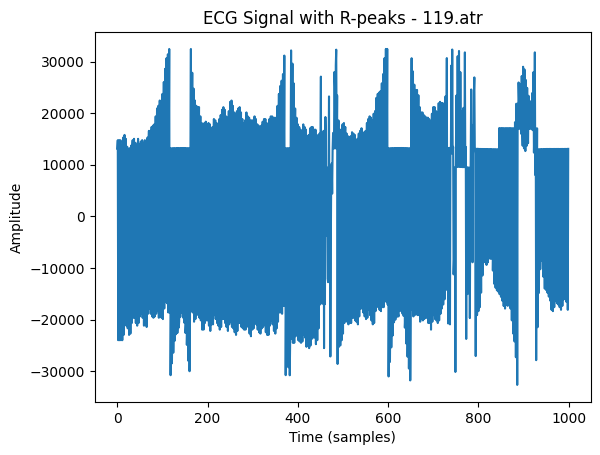

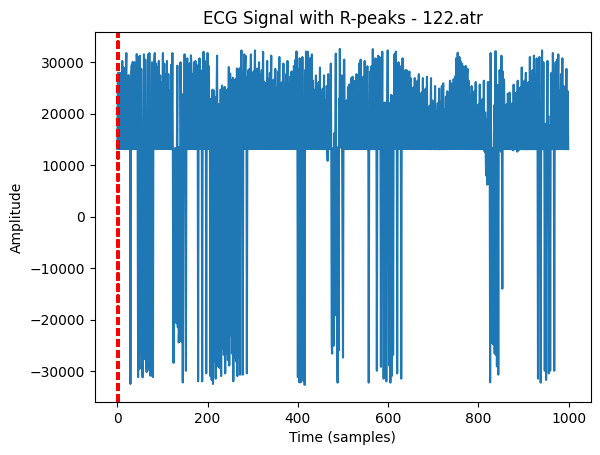

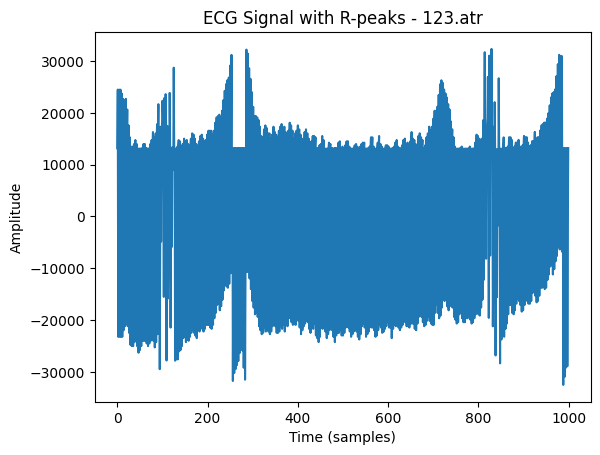

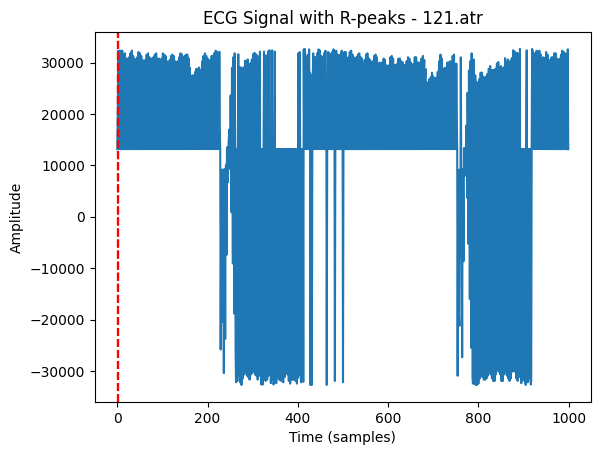

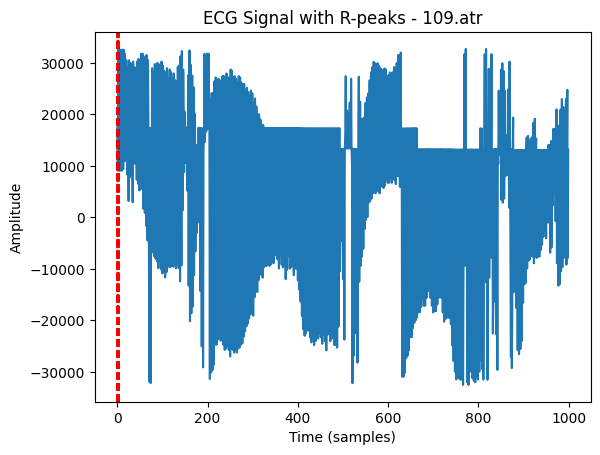

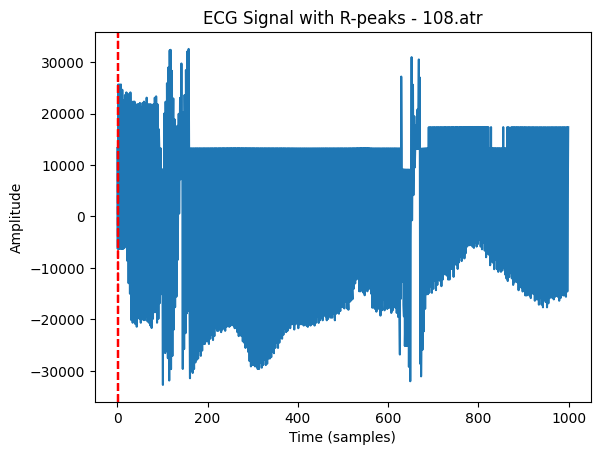

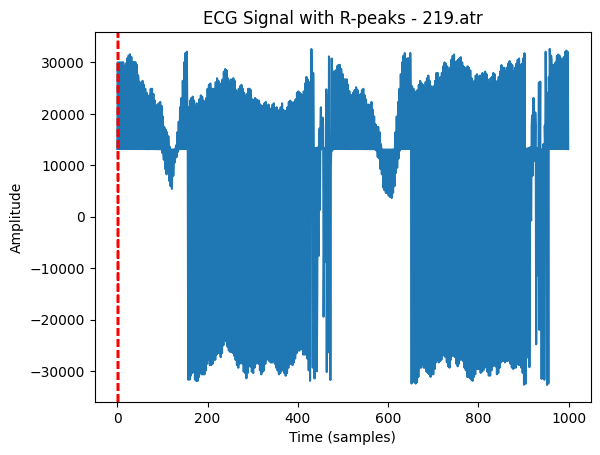

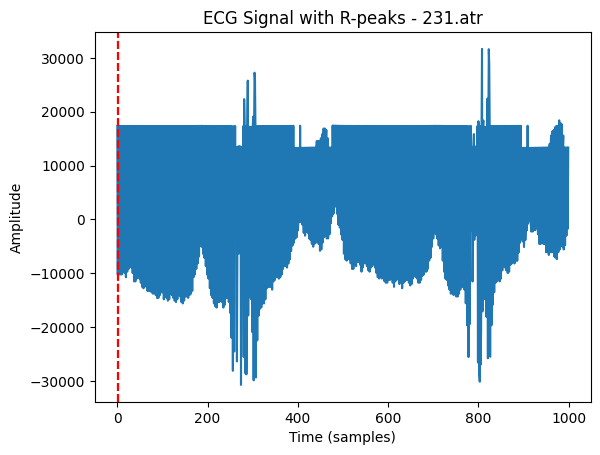

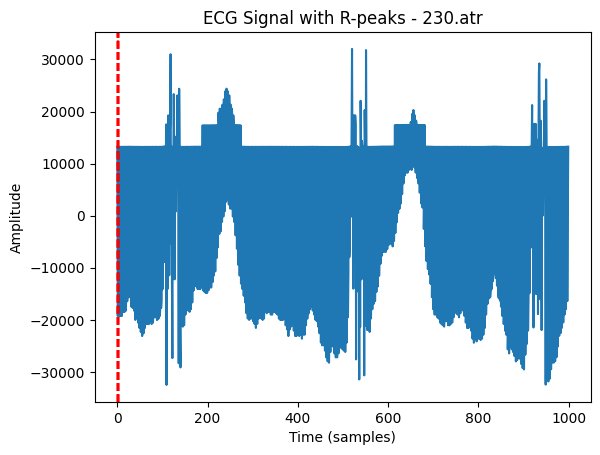

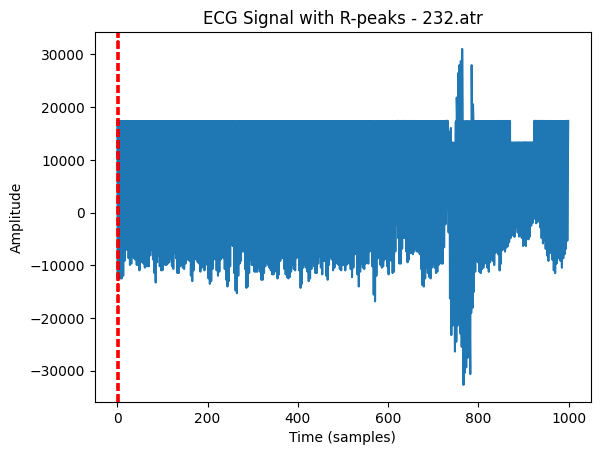

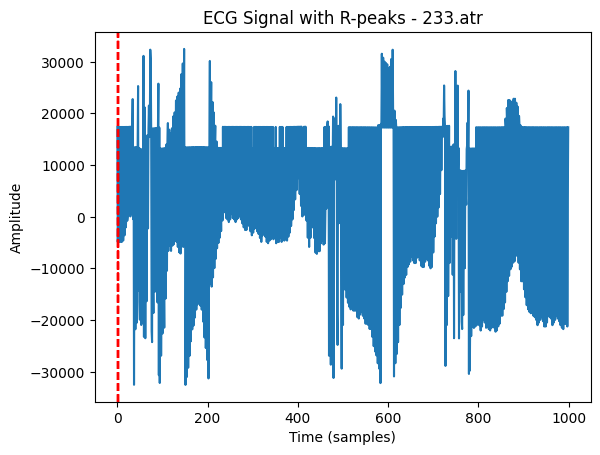

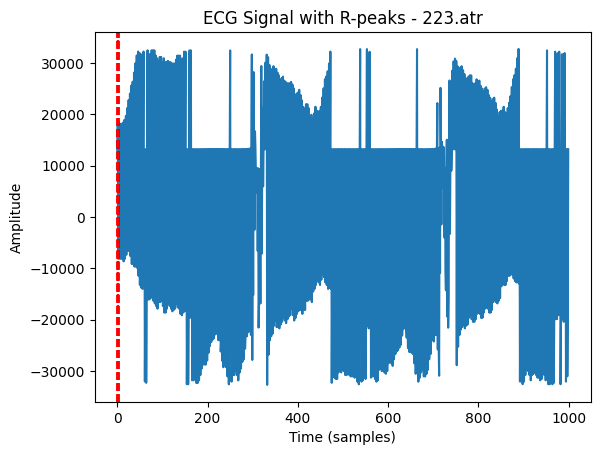

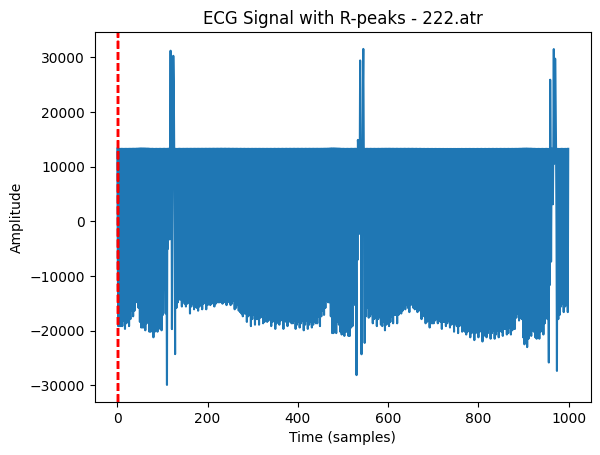

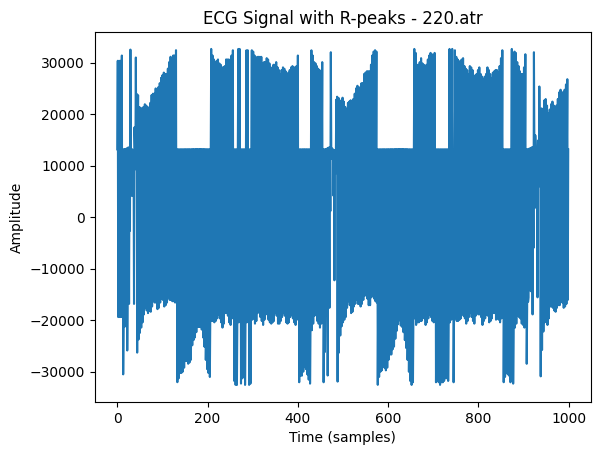

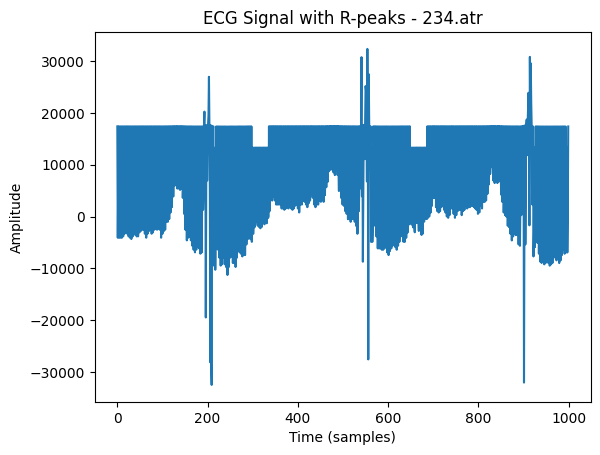

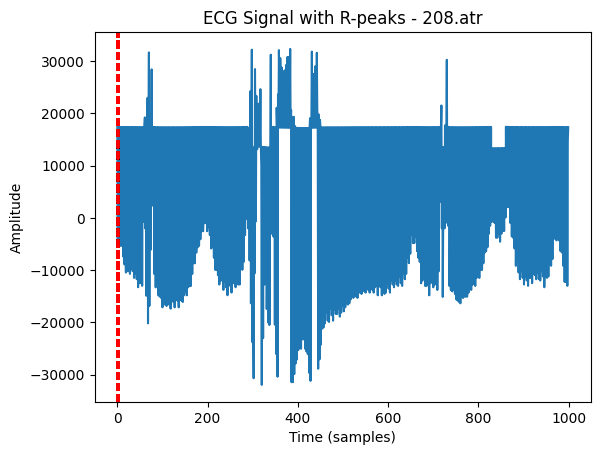

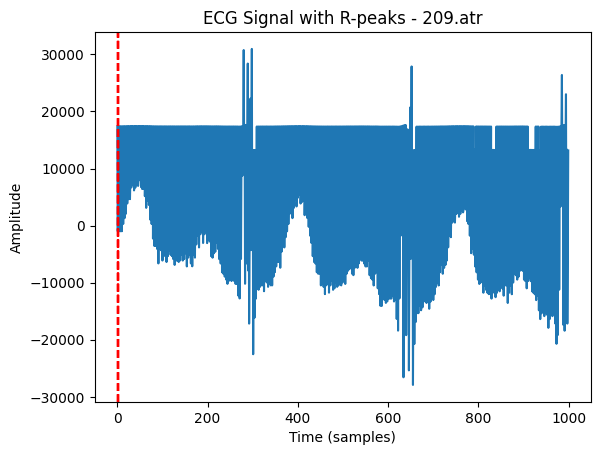

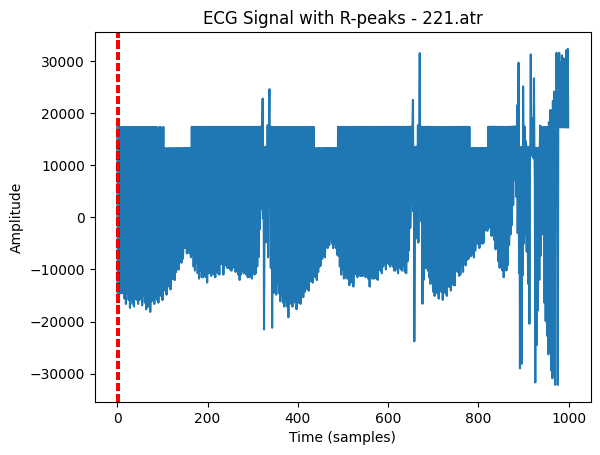

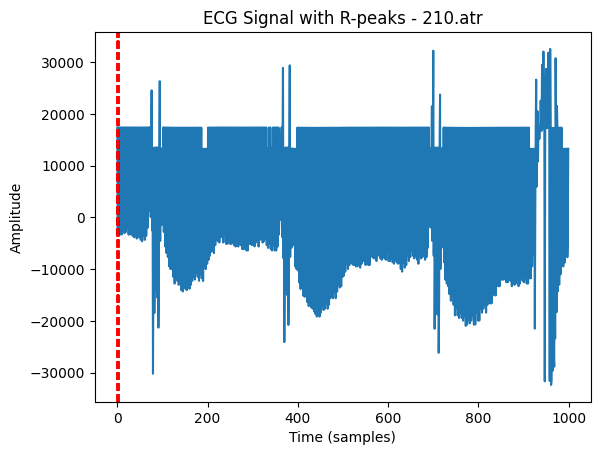

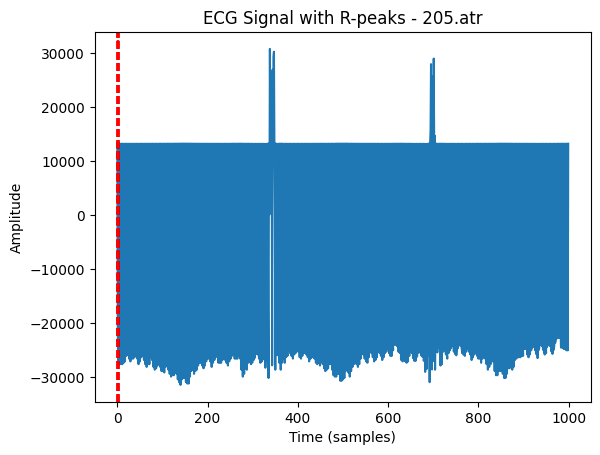

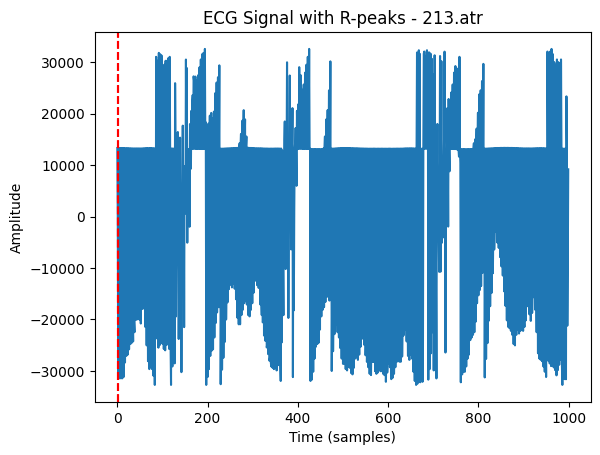

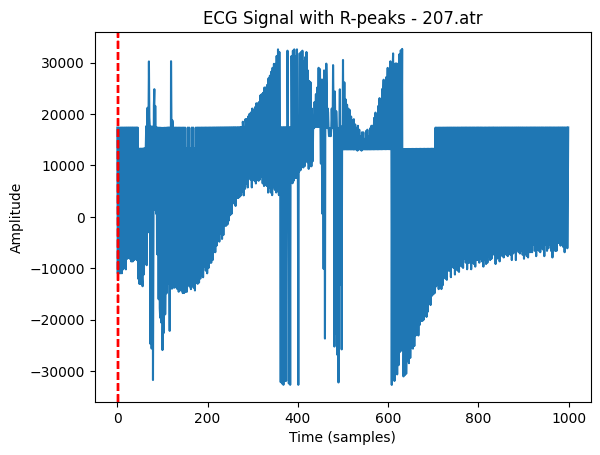

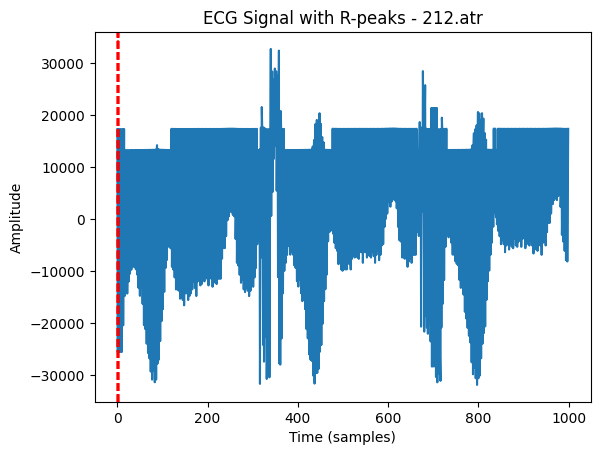

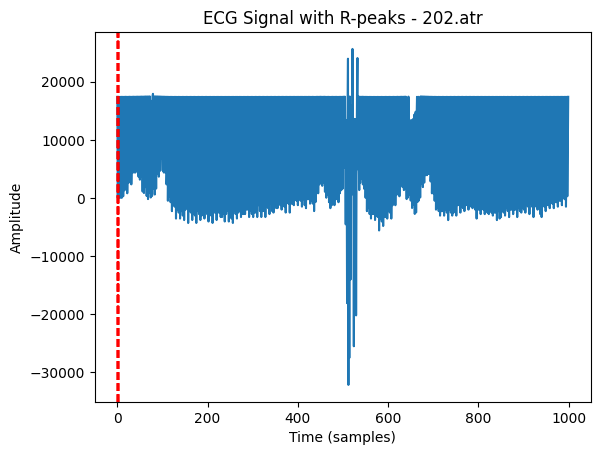

Error reading 102-0.atr: [Errno 2] No such file or directory: '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/102-0.dat'


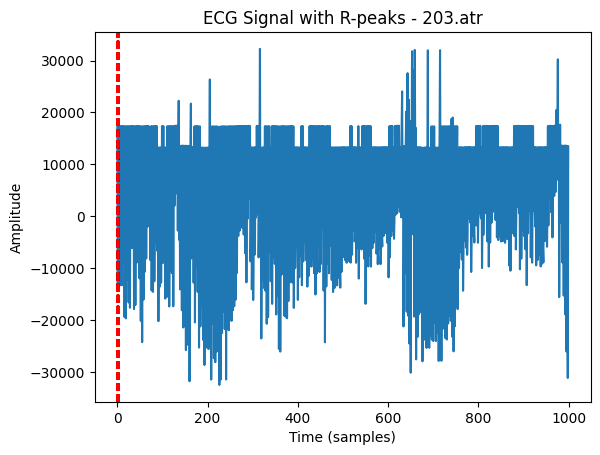

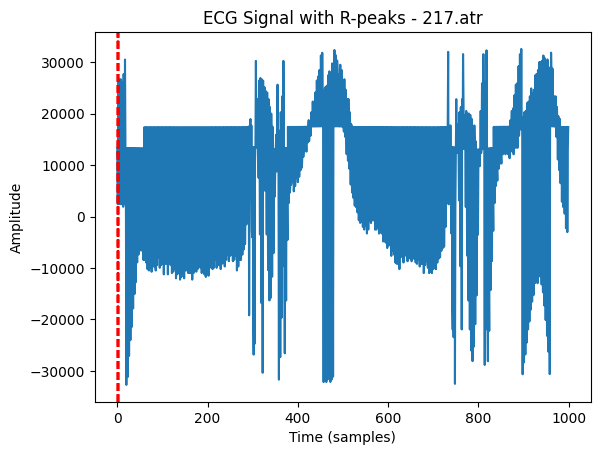

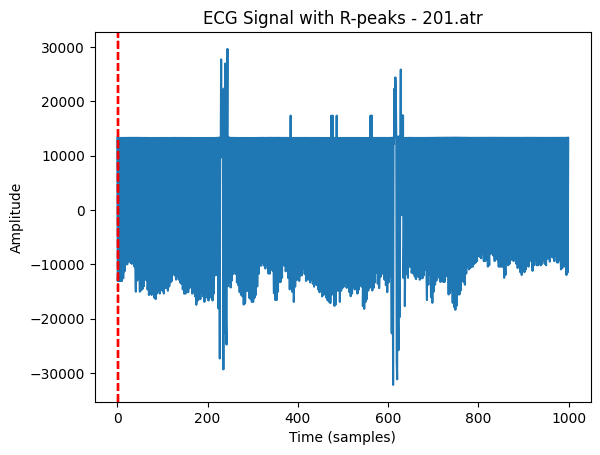

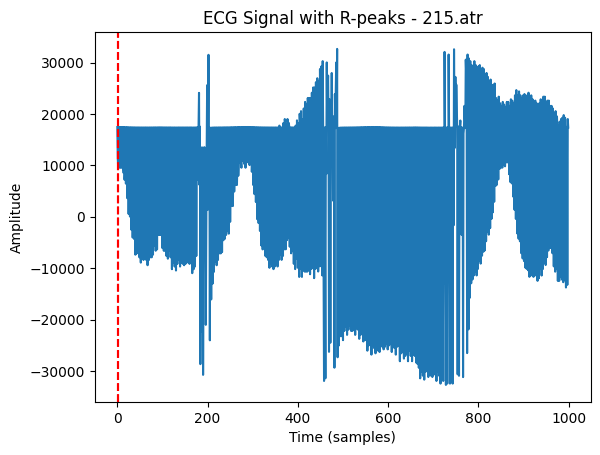

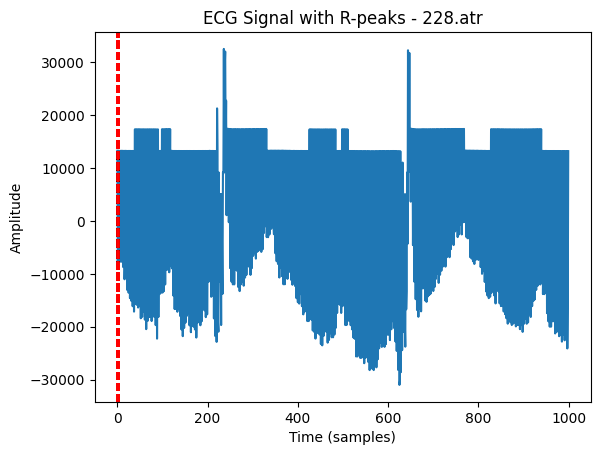

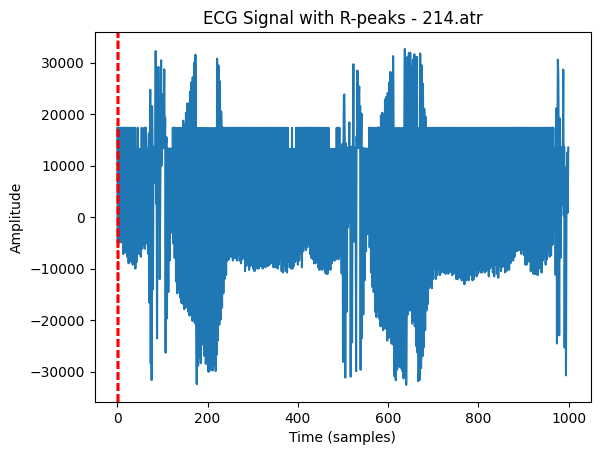

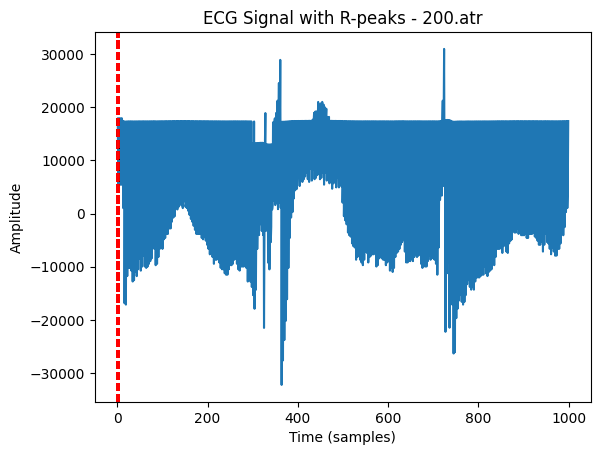

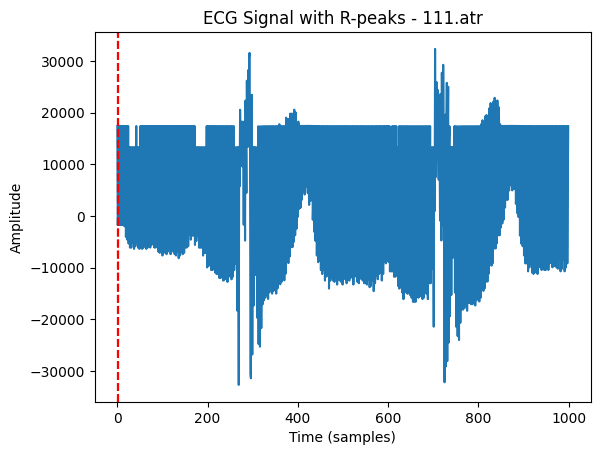

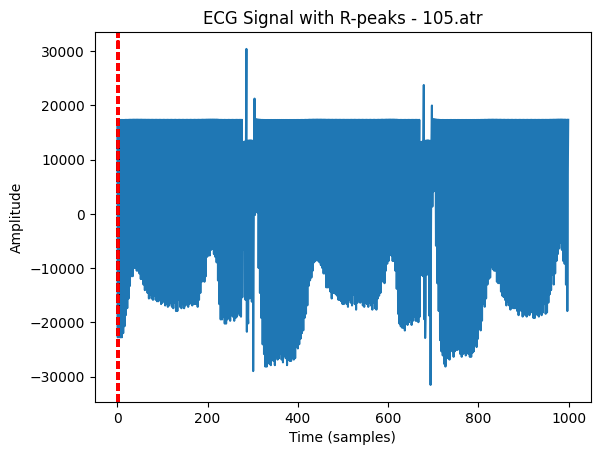

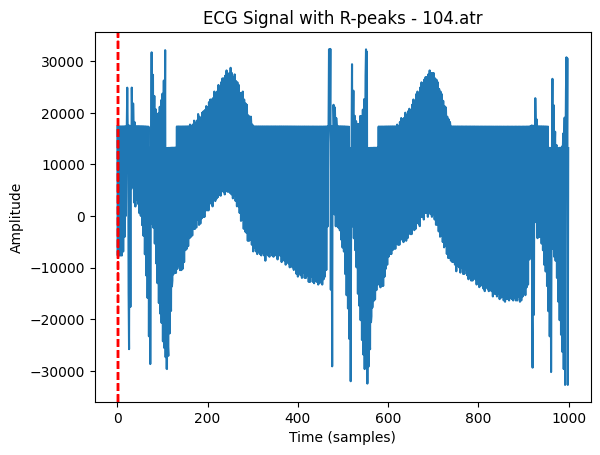

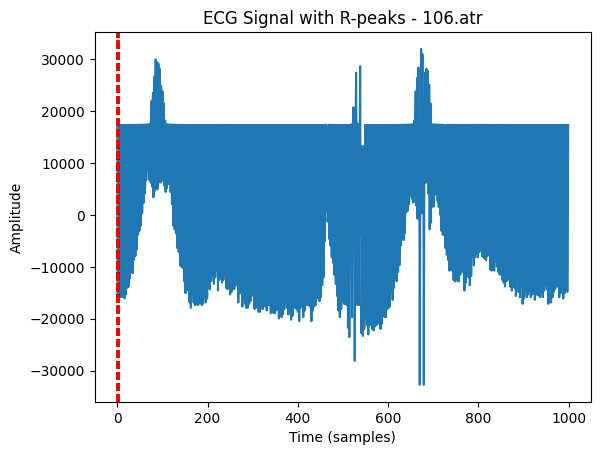

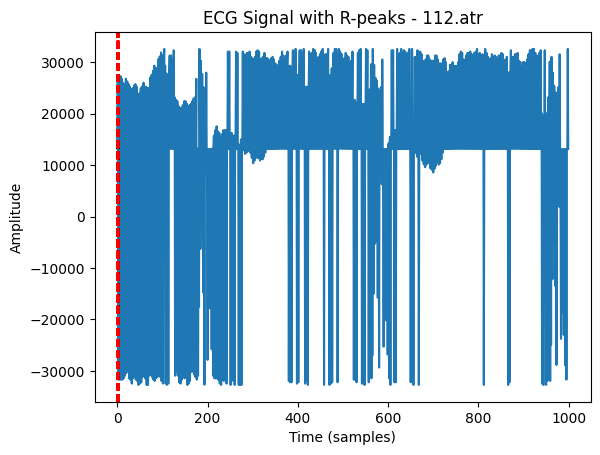

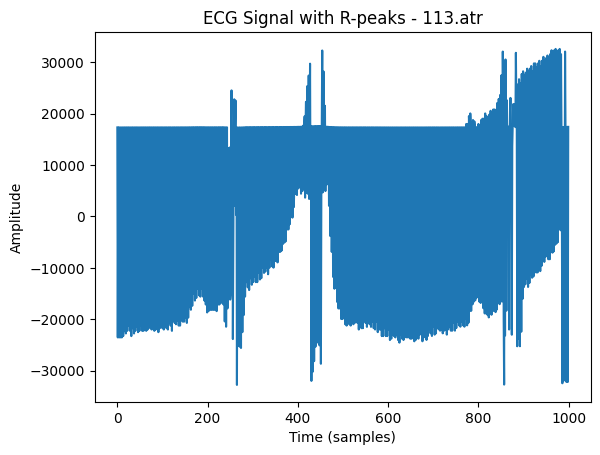

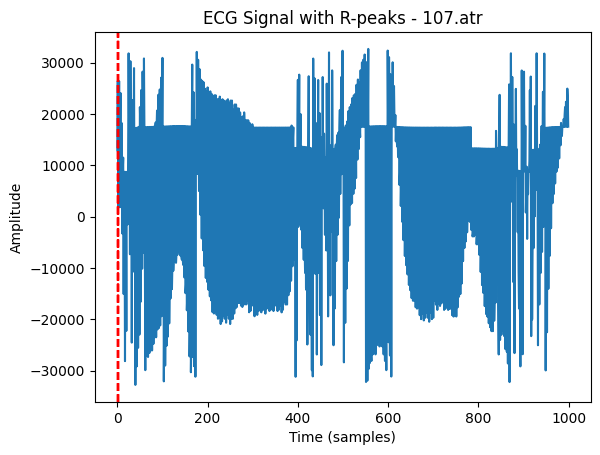

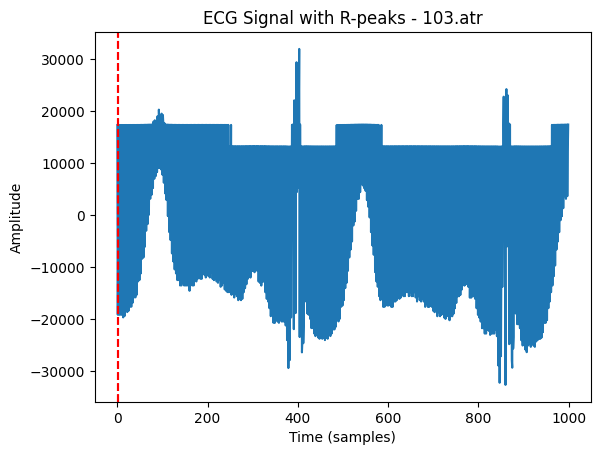

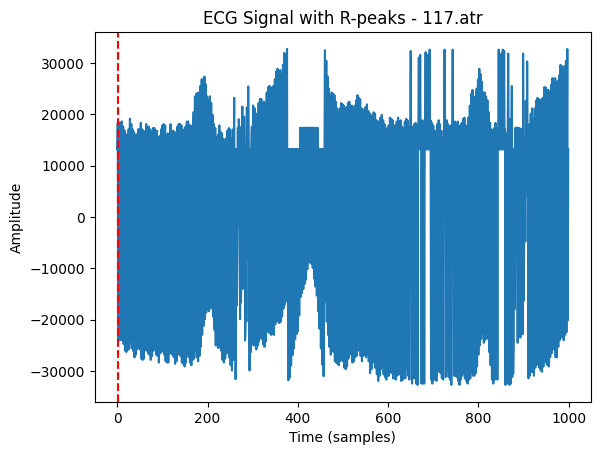

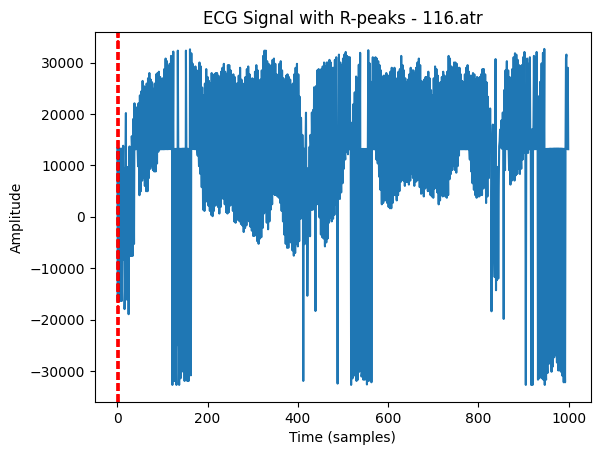

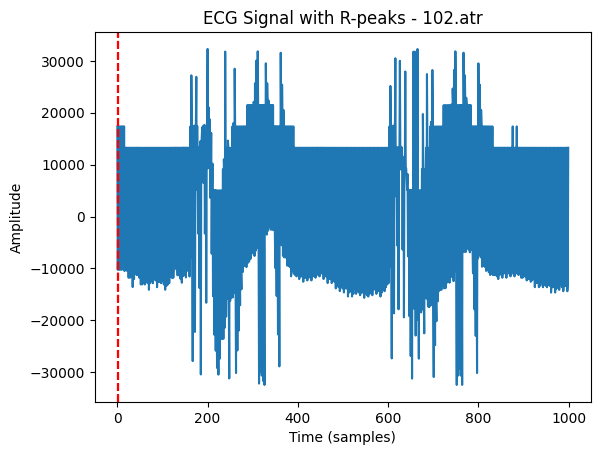

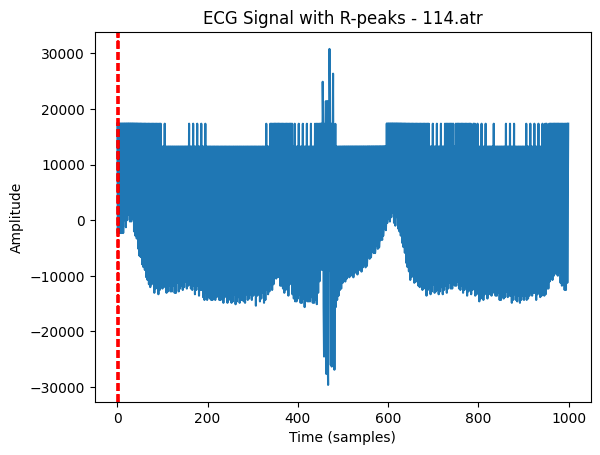

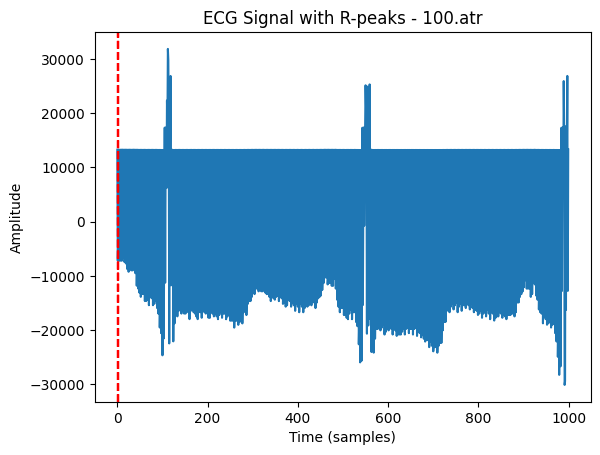

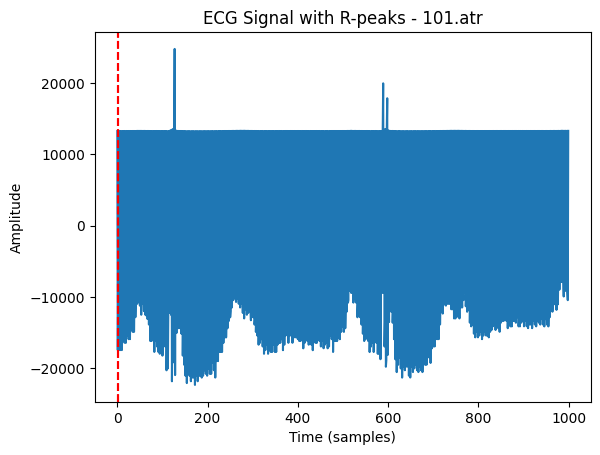

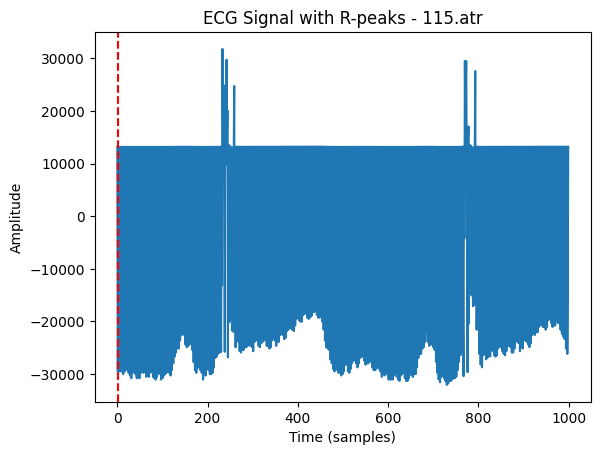

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

data_directory = '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/'
files = os.listdir(data_directory)

for file in files:
    if file.endswith('.atr'):
        # Construct paths to the .dat (ECG signal) and .atr (annotations) files
        ecg_filename = file.replace('.atr', '.dat')
        atr_filename = file
        
        ecg_file_path = os.path.join(data_directory, ecg_filename)
        atr_file_path = os.path.join(data_directory, atr_filename)
        
        try:
            # Load the ECG signal data
            ecg_signal = np.fromfile(ecg_file_path, dtype=np.int16)
            
            # Load the annotations from the .atr file (these are usually in specific formats)
            annotations = np.fromfile(atr_file_path, dtype=np.int8)

            # Extract R-peak positions (this will depend on the format of your .atr file)
            # For simplicity, assuming annotations are the R-peaks for now (check your data for exact format)
            r_peaks = annotations[annotations == 1]  # Change this based on how the peaks are represented

            # Plotting ECG signal with R-peaks marked
            plt.plot(ecg_signal[:1000])  # Plot first 1000 samples of ECG signal
            plt.title(f"ECG Signal with R-peaks - {file}")
            plt.xlabel("Time (samples)")
            plt.ylabel("Amplitude")

            # Mark R-peaks on the plot (using a red vertical line for simplicity)
            for peak in r_peaks:
                plt.axvline(x=peak, color='r', linestyle='--')  # R-peak markers

            plt.show()

        except Exception as e:
            print(f"Error reading {file}: {e}")


Peaks for 118.atr: [    13     68    369 ... 649226 649429 649742]


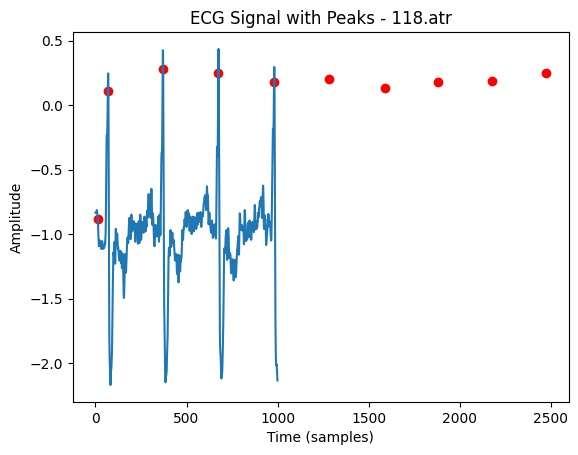

Peaks for 124.atr: [   100    243    693 ... 649146 649510 649876]


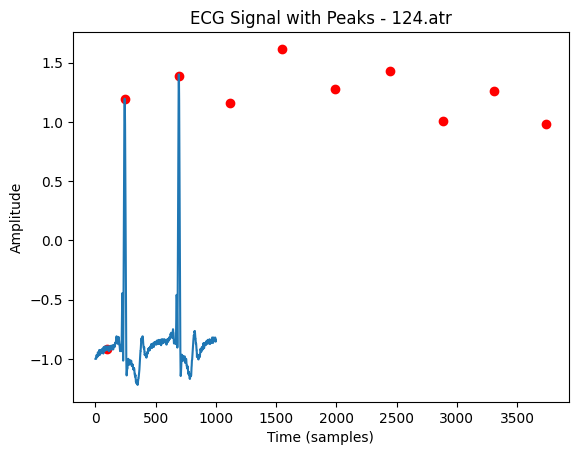

Peaks for 119.atr: [    32    309    503 ... 649129 649468 649788]


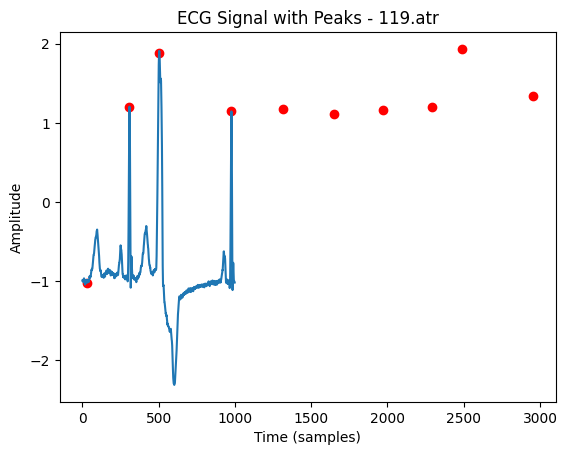

Peaks for 122.atr: [    17     93    326 ... 649383 649643 649905]


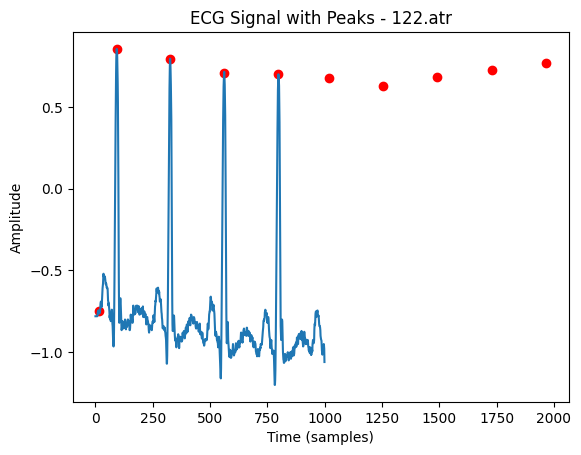

Peaks for 123.atr: [    25     70    550 ... 648997 649342 649689]


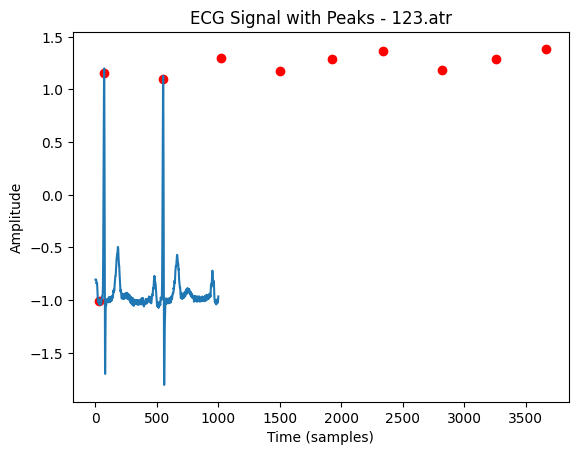

Peaks for 121.atr: [    36    163    513 ... 649287 649587 649878]


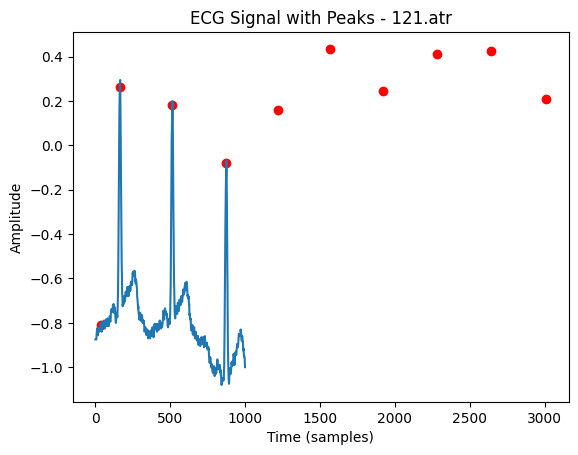

Peaks for 109.atr: [    18    111    343 ... 649378 649663 649931]


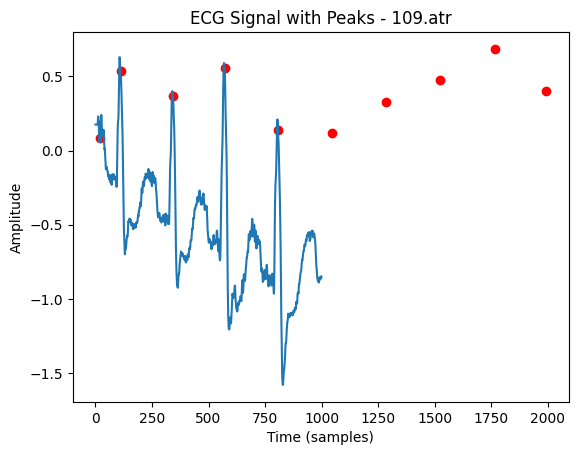

Peaks for 108.atr: [    23     88    442 ... 649170 649471 649769]


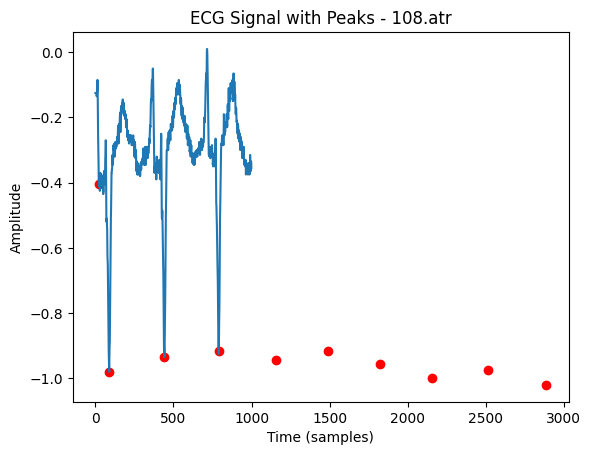

Peaks for 219.atr: [   188    300    614 ... 649174 649448 649737]


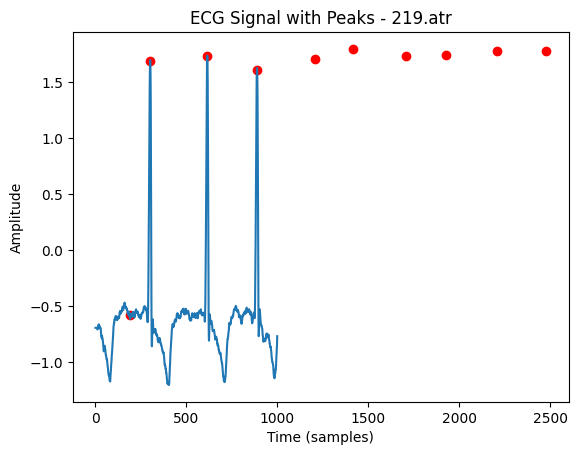

Peaks for 231.atr: [    57    180    527 ... 649142 649501 649862]


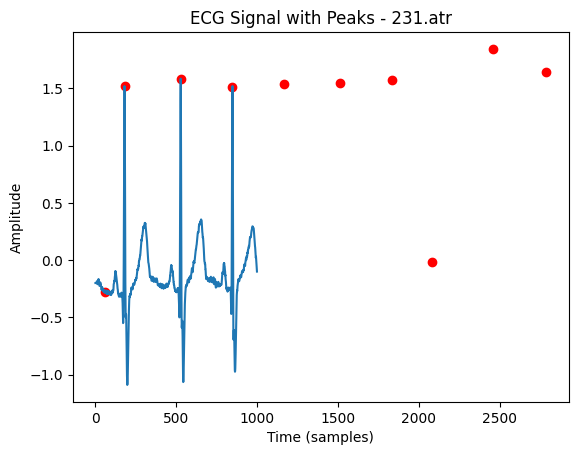

Peaks for 230.atr: [    30     75    349 ... 649338 649572 649807]


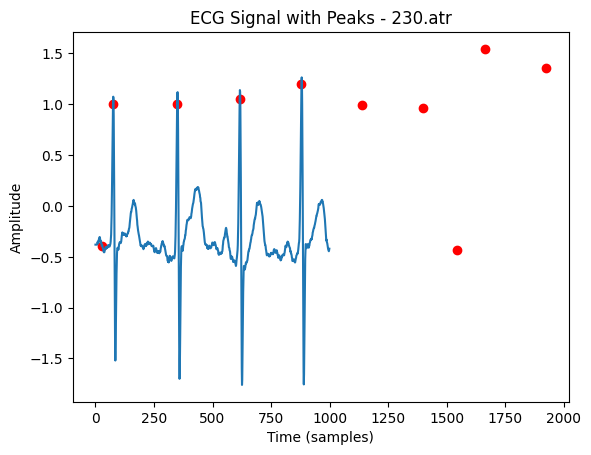

Peaks for 232.atr: [    76    491    737 ... 648845 649097 649366]


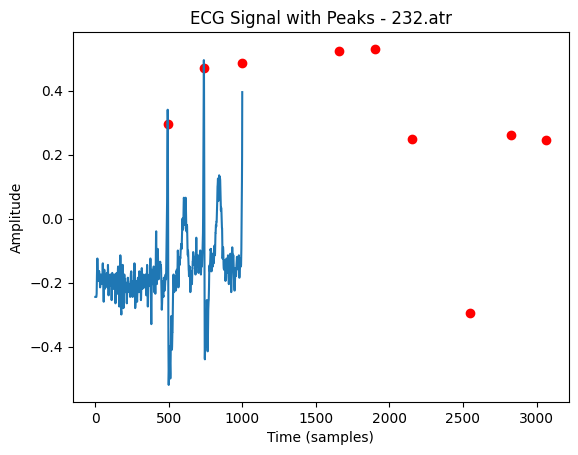

Peaks for 233.atr: [     3     42    320 ... 649518 649730 649946]


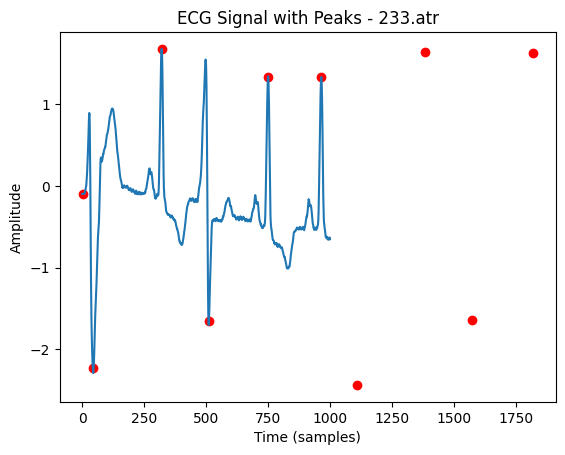

Peaks for 223.atr: [    96    204    480 ... 649349 649599 649849]


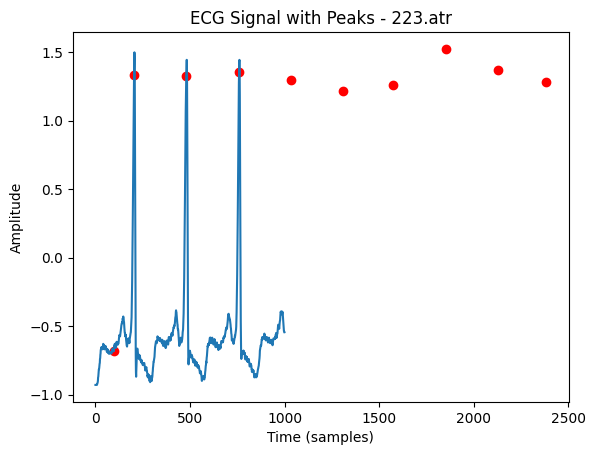

Peaks for 222.atr: [    17     81    361 ... 649317 649600 649859]


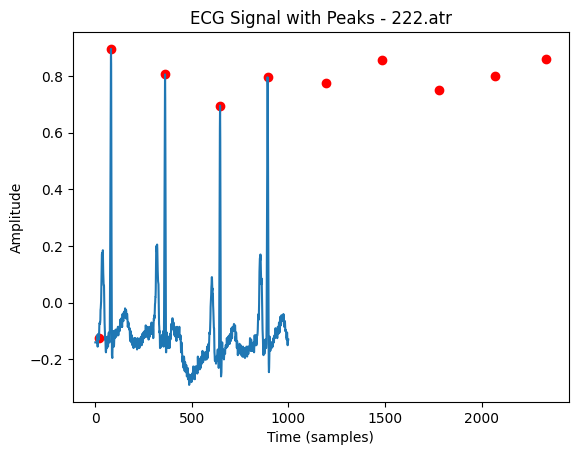

Peaks for 220.atr: [     0     28    313 ... 649277 649584 649904]


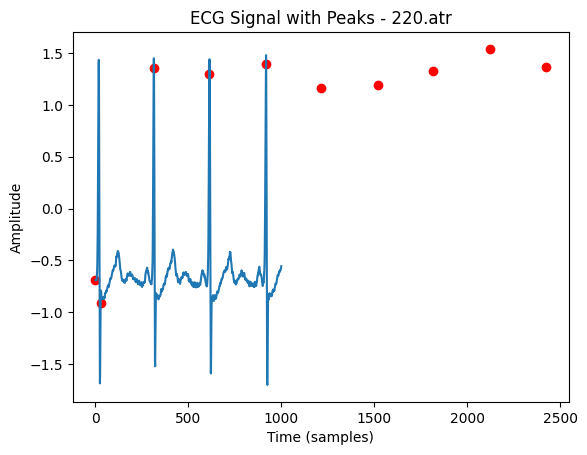

Peaks for 234.atr: [    52    135    366 ... 649292 649536 649772]


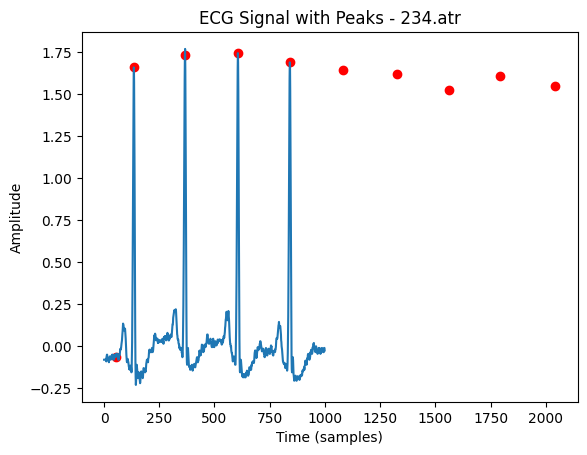

Peaks for 208.atr: [     9     46    209 ... 649411 649704 649935]


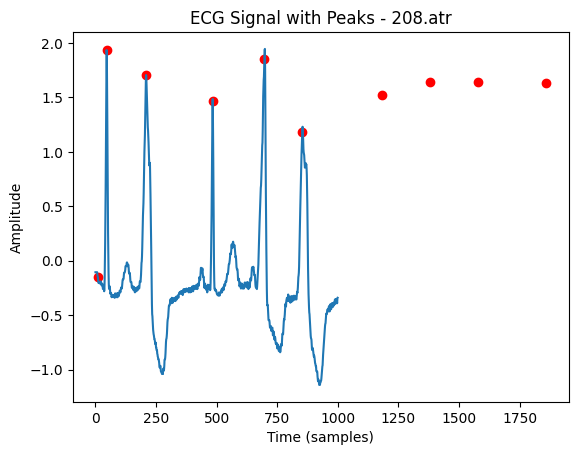

Peaks for 209.atr: [    84    189    425 ... 649387 649627 649857]


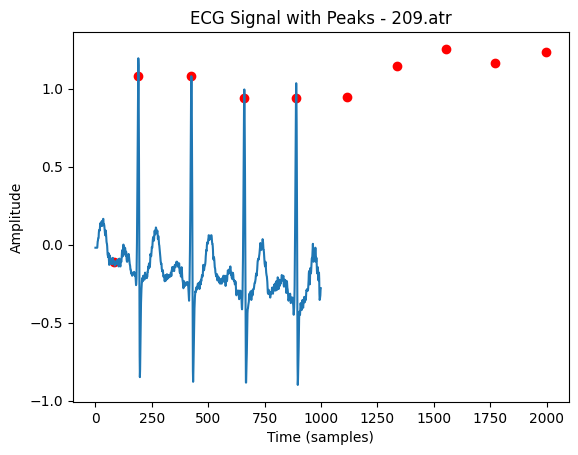

Peaks for 221.atr: [    28    220    442 ... 649236 649530 649810]


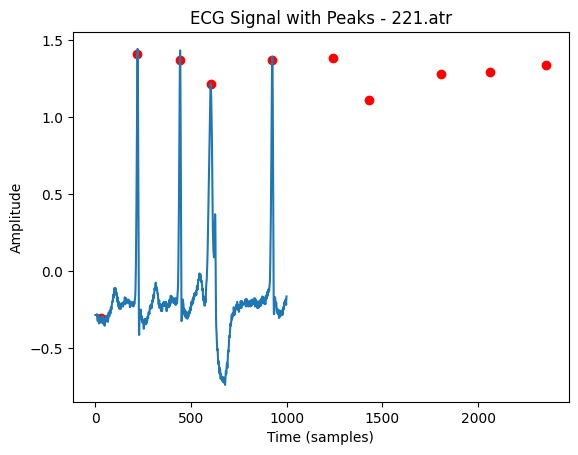

Peaks for 210.atr: [    13     57    250 ... 649513 649758 649962]


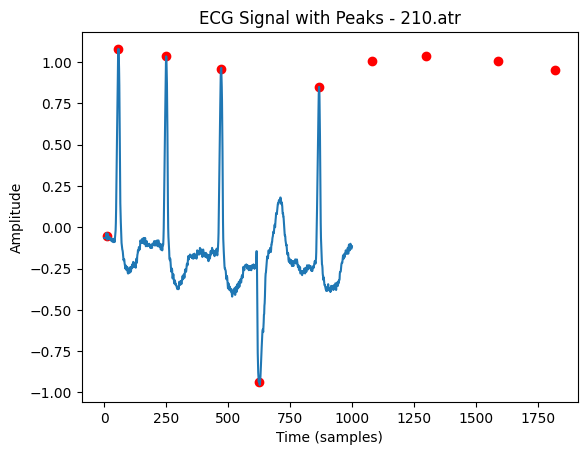

Peaks for 205.atr: [    15    229    466 ... 649326 649596 649857]


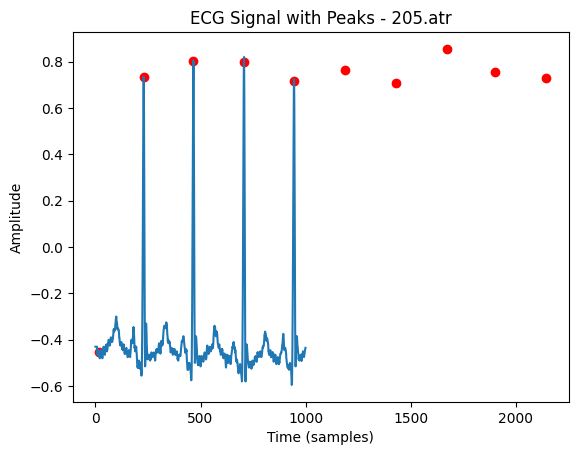

Peaks for 213.atr: [    18     95    253 ... 649577 649790 649992]


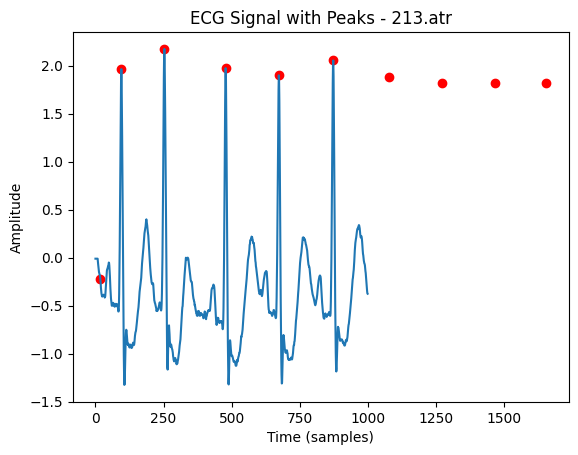

Peaks for 207.atr: [     9     50    312 ... 649431 649602 649799]


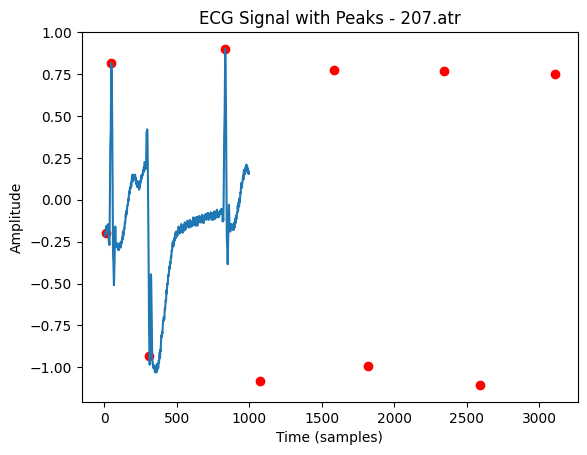

Peaks for 212.atr: [   125    214    451 ... 649414 649673 649945]


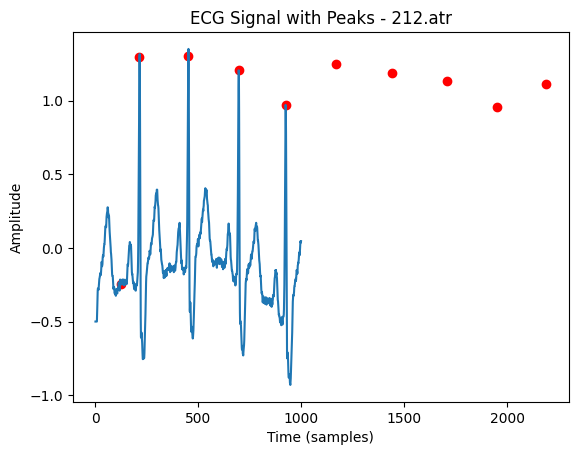

Peaks for 202.atr: [   183    348    742 ... 649342 649615 649877]


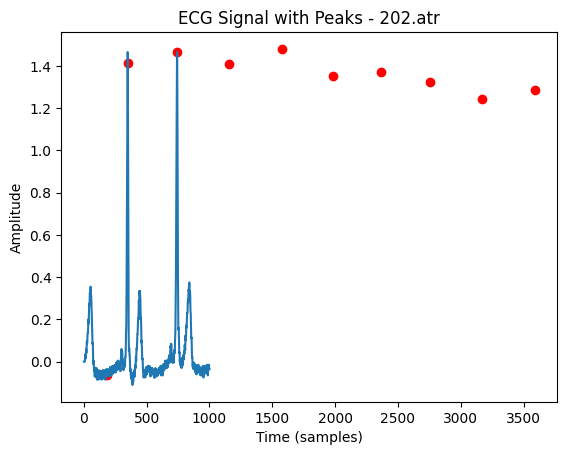

Error processing 102-0.atr: [Errno 2] No such file or directory: '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/102-0.hea'
Peaks for 203.atr: [    14     24     99 ... 649237 649448 649777]


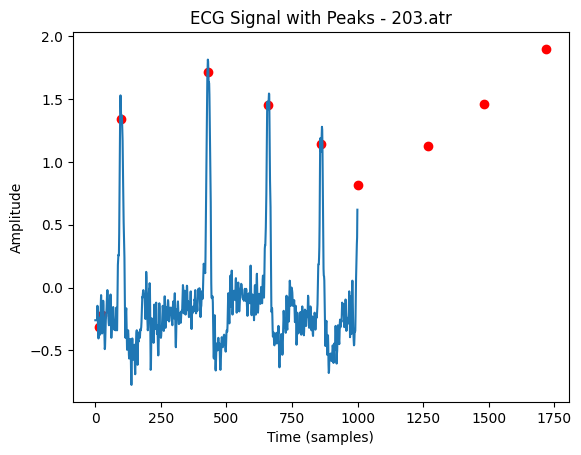

Peaks for 217.atr: [   102    205    500 ... 649114 649429 649738]


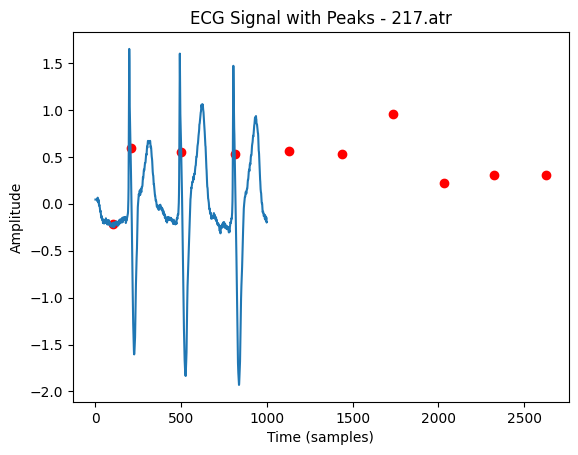

Peaks for 201.atr: [    60    159    415 ... 649104 649181 649800]


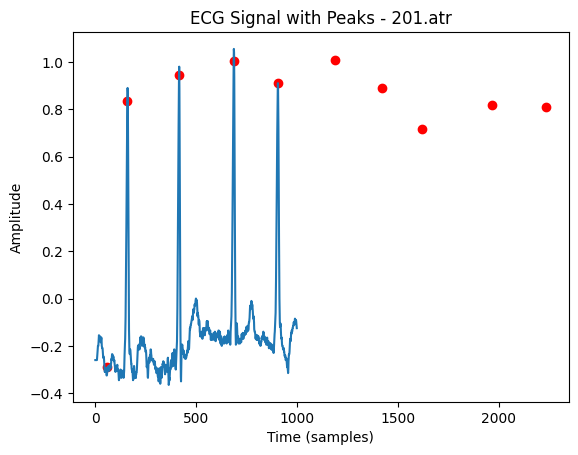

Peaks for 215.atr: [    41    124    313 ... 649501 649685 649875]


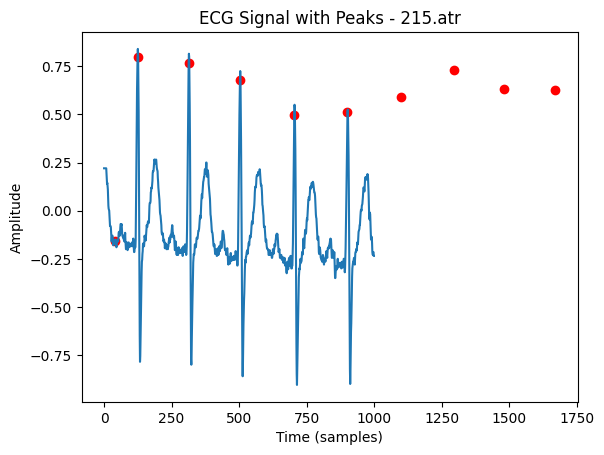

Peaks for 228.atr: [    27    160    433 ... 649108 649332 649761]


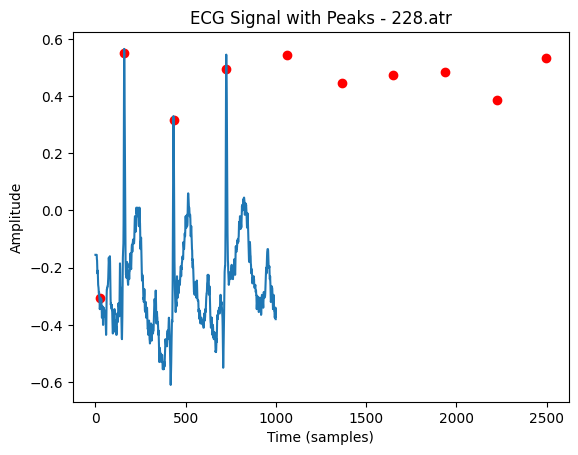

Peaks for 214.atr: [    19     58    346 ... 649379 649627 649891]


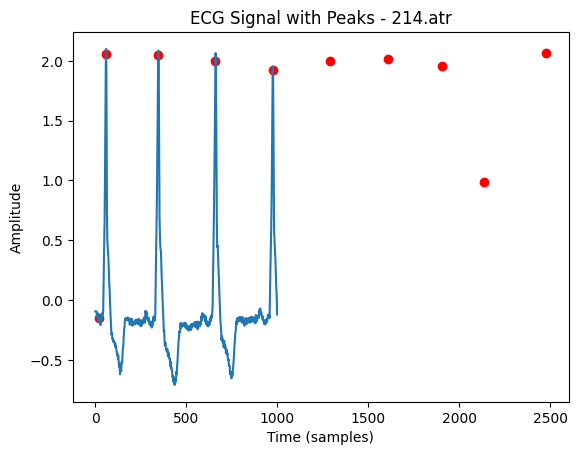

Peaks for 200.atr: [    67    225    487 ... 649408 649664 649927]


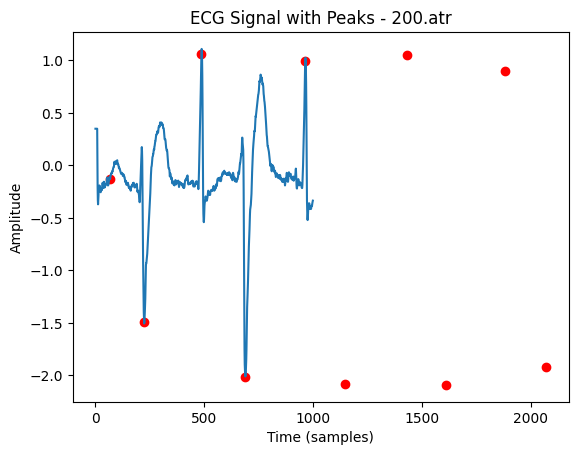

Peaks for 111.atr: [    31    197    489 ... 649148 649441 649724]


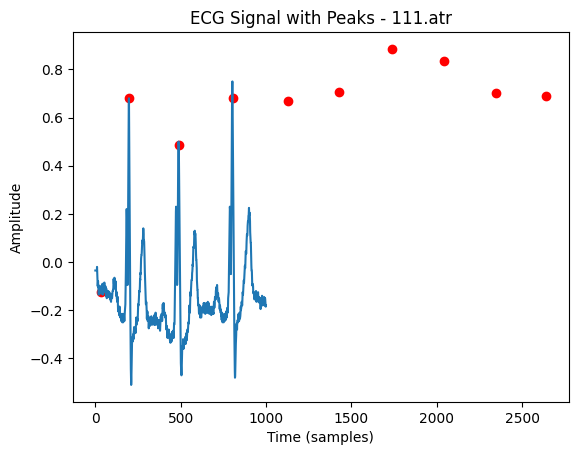

Peaks for 105.atr: [    67    197    459 ... 649221 649471 649740]


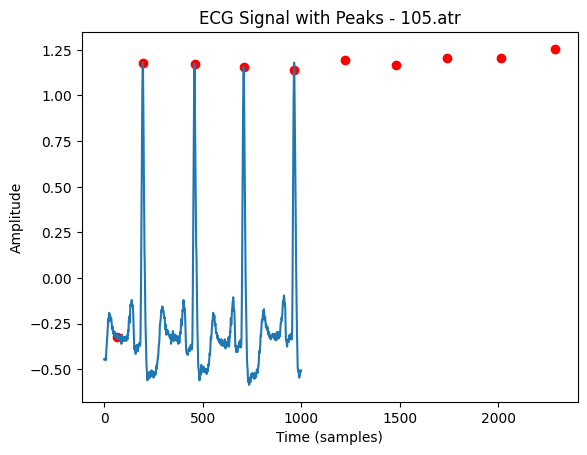

Peaks for 104.atr: [    36     73    316 ... 649300 649580 649876]


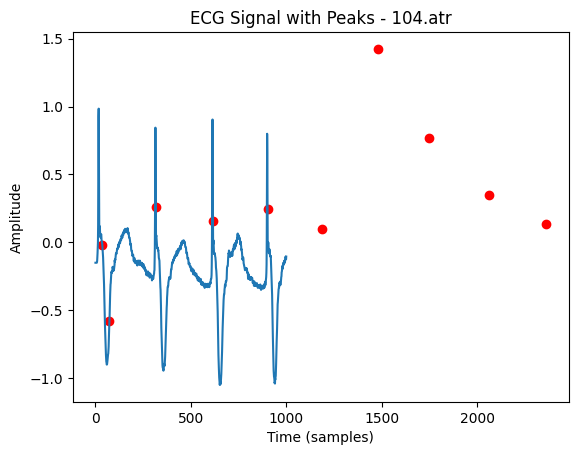

Peaks for 106.atr: [    83    229    351 ... 649162 649340 649791]


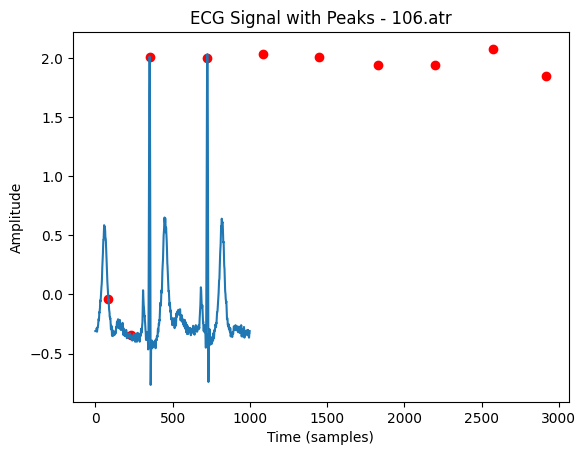

Peaks for 112.atr: [    15    124    382 ... 649361 649626 649883]


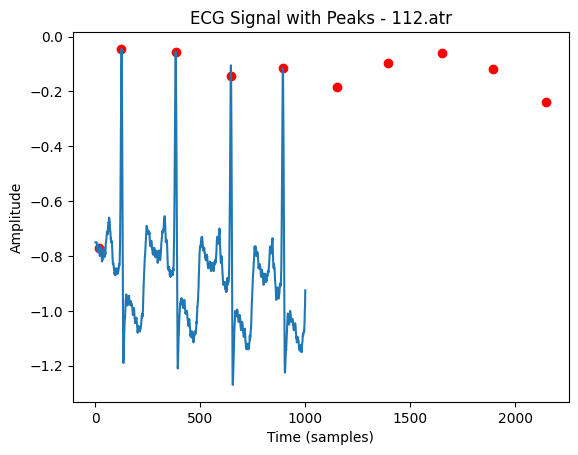

Peaks for 113.atr: [    22    170    583 ... 649364 649675 649994]


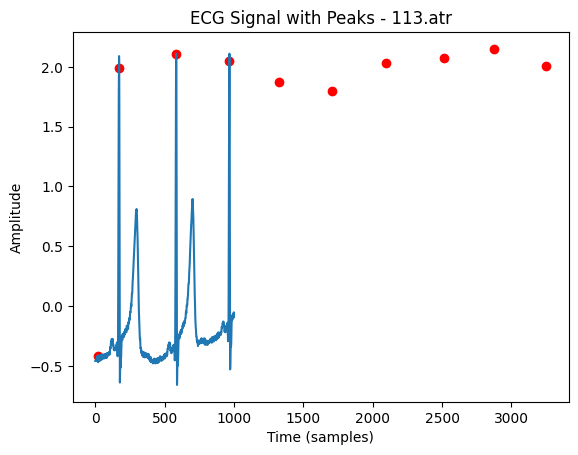

Peaks for 107.atr: [    47     95    272 ... 649129 649441 649748]


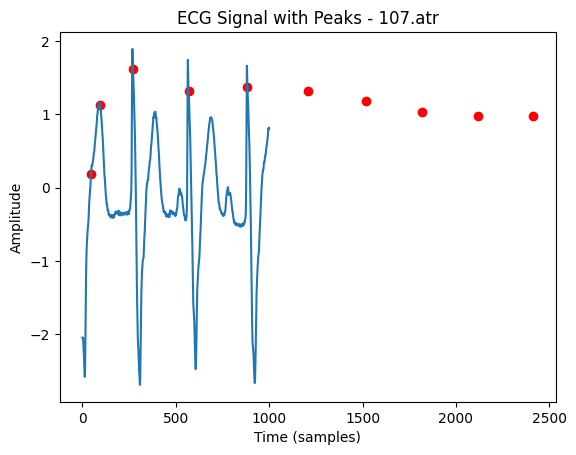

Peaks for 103.atr: [    21    265    575 ... 649195 649534 649875]


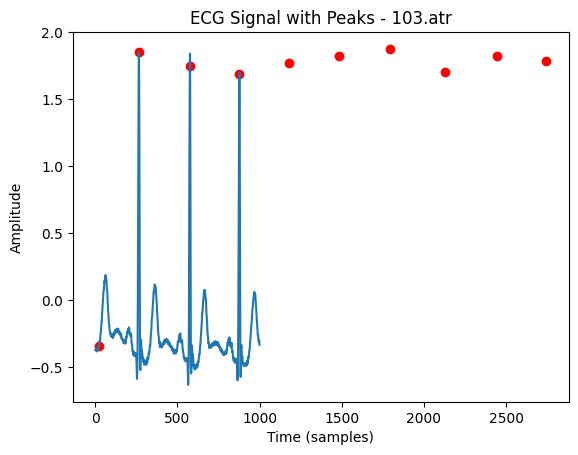

Peaks for 117.atr: [    72    189    598 ... 649070 649498 649926]


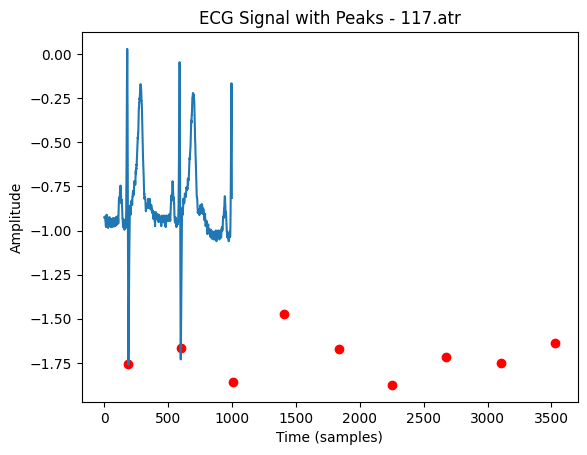

Peaks for 116.atr: [   174    282    561 ... 649442 649701 649957]


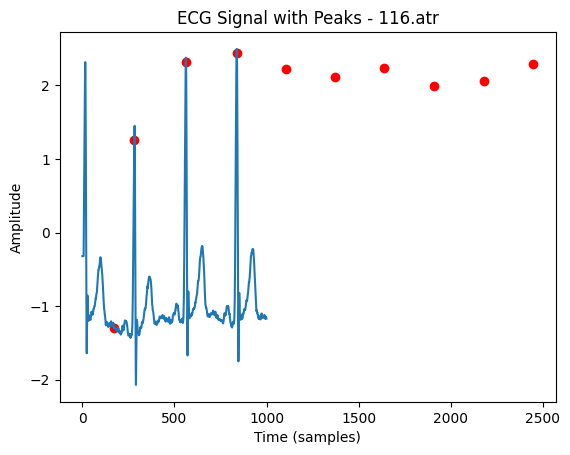

Peaks for 102.atr: [    68    136    410 ... 649244 649553 649852]


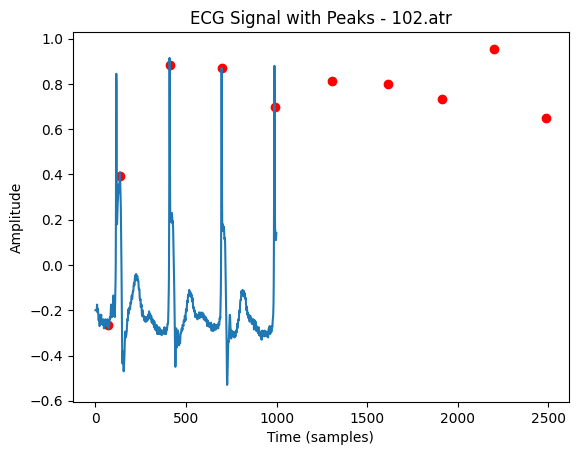

Peaks for 114.atr: [    21    310    726 ... 649261 649523 649783]


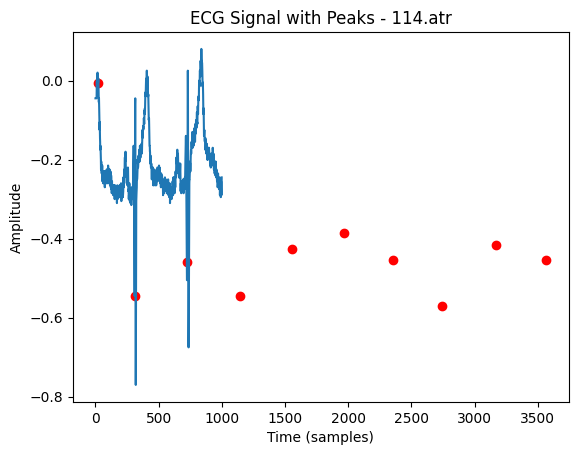

Peaks for 100.atr: [    18     77    370 ... 649484 649734 649991]


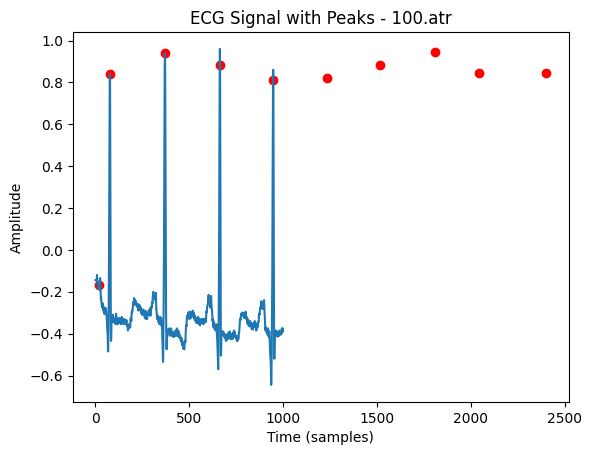

Peaks for 101.atr: [     7     83    396 ... 649004 649372 649751]


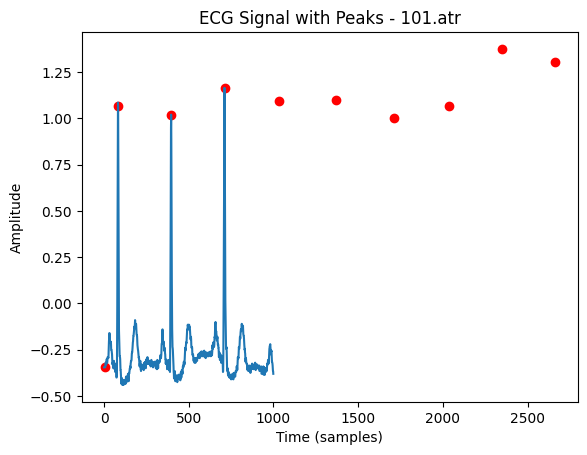

Peaks for 115.atr: [    44    161    518 ... 649357 649647 649955]


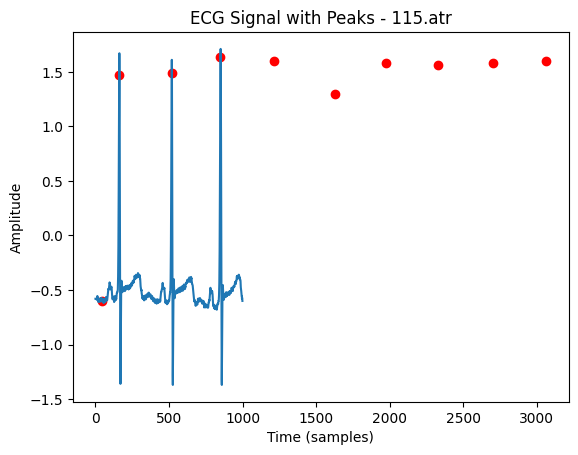

In [ ]:
import wfdb
import numpy as np
import os

data_directory = '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/'
files = os.listdir(data_directory)

#setting up my directory using my .atr files and loping data
for file in files:
    if file.endswith('.atr'): #data is in .atr format (google dif between .atr and .dat for paper?)
       
        record_name = file.split('.')[0] #extracting 'base' name of file, so it combines dat and atr for each sample
        try:
            # Load ECG record and annotations
            record = wfdb.rdrecord(os.path.join(data_directory, record_name))
            annotation = wfdb.rdann(os.path.join(data_directory, record_name), 'atr')
            
            # Record the signal and annotations
            ecg_signal = record.p_signal[:, 0]  # Assuming single channel ECG
            peak_indices = annotation.sample  # Indices of the annotated peaks
            
            print(f"Peaks for {file}: {peak_indices}")
            plt.plot(ecg_signal[:1000])
            plt.scatter(peak_indices[:10], ecg_signal[peak_indices[:10]], color='red')  # Plot first 10 peaks
            plt.title(f"ECG Signal with Peaks - {file}")
            plt.xlabel("Time (samples)")
            plt.ylabel("Amplitude")
            plt.show()

        except Exception as e:
            print(f"Error processing {file}: {e}")



In [10]:
def create_windows(ecg_signal, peak_indices, window_size=1000):
    windows = []
    labels = []
    
    for i in range(0, len(ecg_signal) - window_size, window_size):
        window = ecg_signal[i:i + window_size]
        label = 1 if any(i <= (i + window_size) and i + window_size >= i for i in peak_indices) else 0  # label based on peaks
        windows.append(window)
        labels.append(label)
    
    return np.array(windows), np.array(labels)

# Example usage:
windows, labels = create_windows(ecg_signal, peak_indices)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class ECG_CNN(nn.Module):
    def __init__(self, window_size):
        super(ECG_CNN, self).__init__()
        self.window_size = window_size  # Store window_size as a class attribute
        
        # Define the layers
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, padding=2)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(32 * (window_size // 2), 128)  # Use window_size in the calculation
        self.fc2 = nn.Linear(128, 1)  # Binary output (peak or no peak)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * (self.window_size // 2))  # Use window_size here
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        r


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the window size (use the same window size you used in preprocessing)
window_size = 1000  # Example window size

# Define the CNN model
class ECG_CNN(nn.Module):
    def __init__(self, window_size):
        super(ECG_CNN, self).__init__()
        self.window_size = window_size
        
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, padding=2)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(32 * (window_size // 2), 128)
        self.fc2 = nn.Linear(128, 1)  # Binary output (peak or no peak)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * (self.window_size // 2))  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = ECG_CNN(window_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

# Training setup (you can continue with the training loop after this)


In [17]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    
    for inputs, labels in train_loader:  # Assuming you're using a DataLoader
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Ensure both outputs and labels have the same shape
        # Squeeze the output to remove the extra dimension
        outputs = outputs.squeeze()  # This will make outputs shape (batch_size,)

        # Check if the labels are in the correct shape (should be of shape (batch_size,))
        # If not, reshape the labels to match the output shape
        if labels.dim() > 1:
            labels = labels.squeeze()  # Ensure labels are of shape (batch_size,)

        # Compute loss (Binary Cross-Entropy)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimizer step
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")




ValueError: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([16])) is deprecated. Please ensure they have the same size.

Peaks for 118.atr: [    13     68    369 ... 649226 649429 649742]


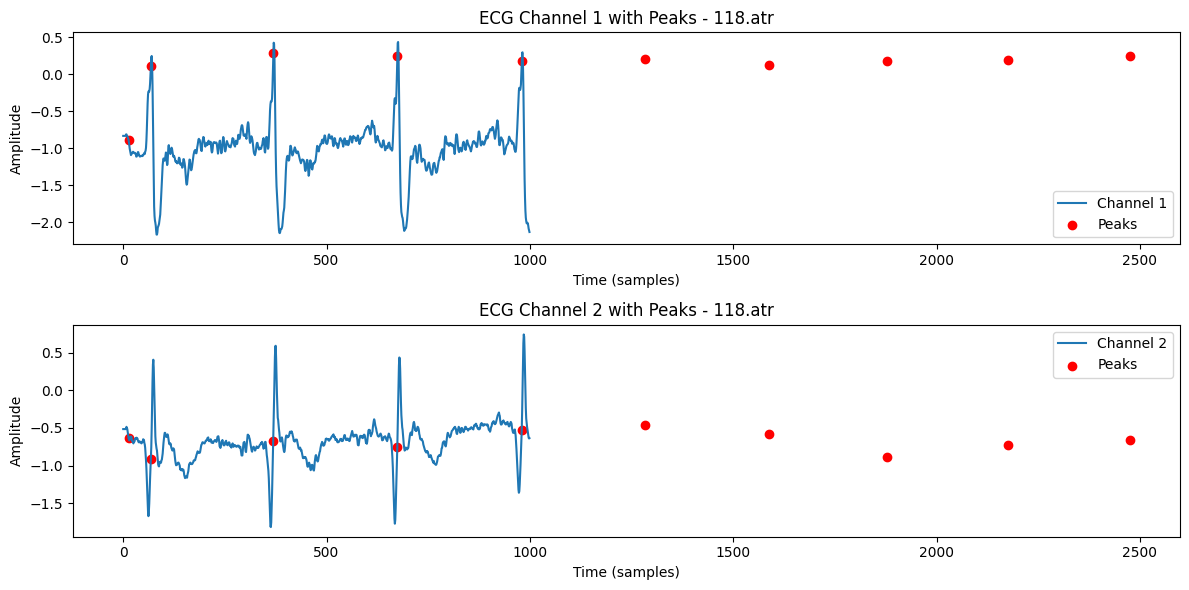

Peaks for 124.atr: [   100    243    693 ... 649146 649510 649876]


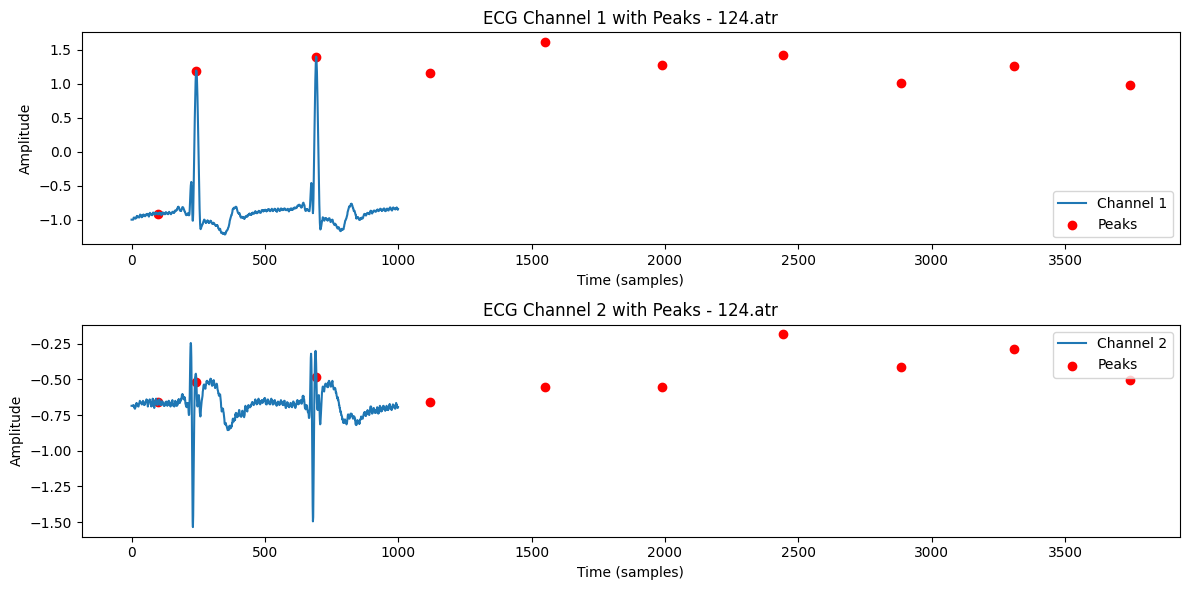

Peaks for 119.atr: [    32    309    503 ... 649129 649468 649788]


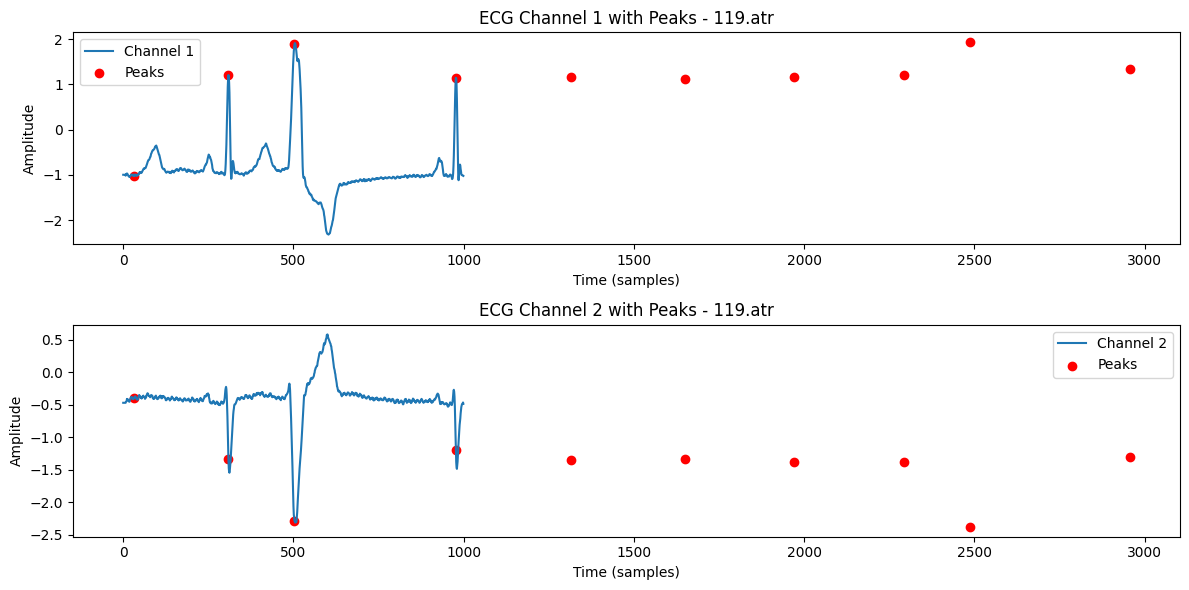

Peaks for 122.atr: [    17     93    326 ... 649383 649643 649905]


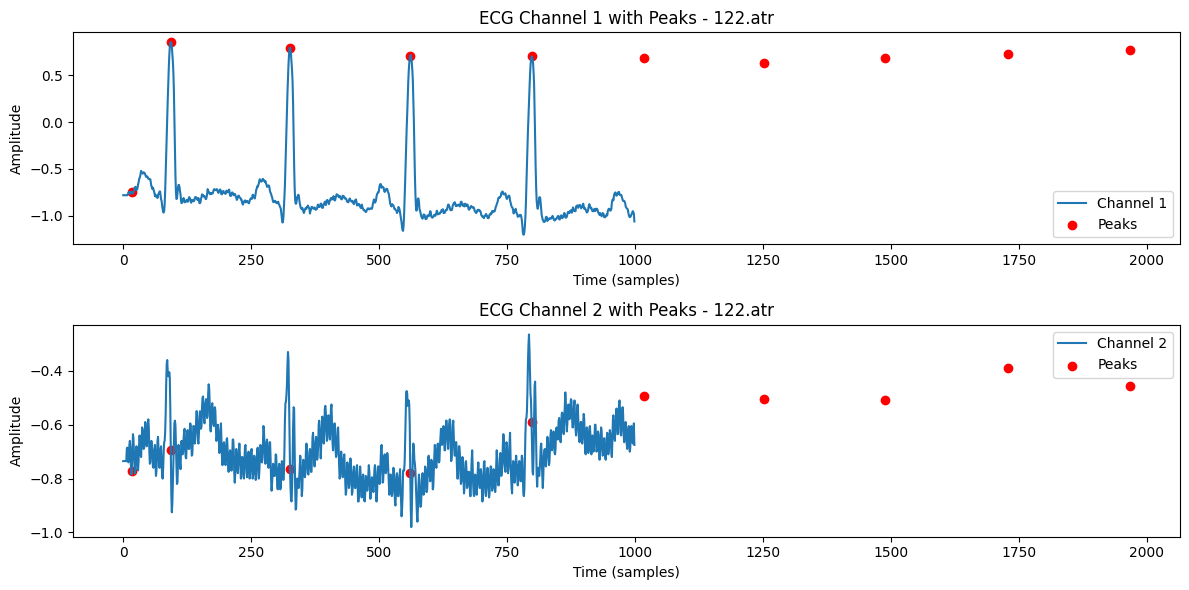

Peaks for 123.atr: [    25     70    550 ... 648997 649342 649689]


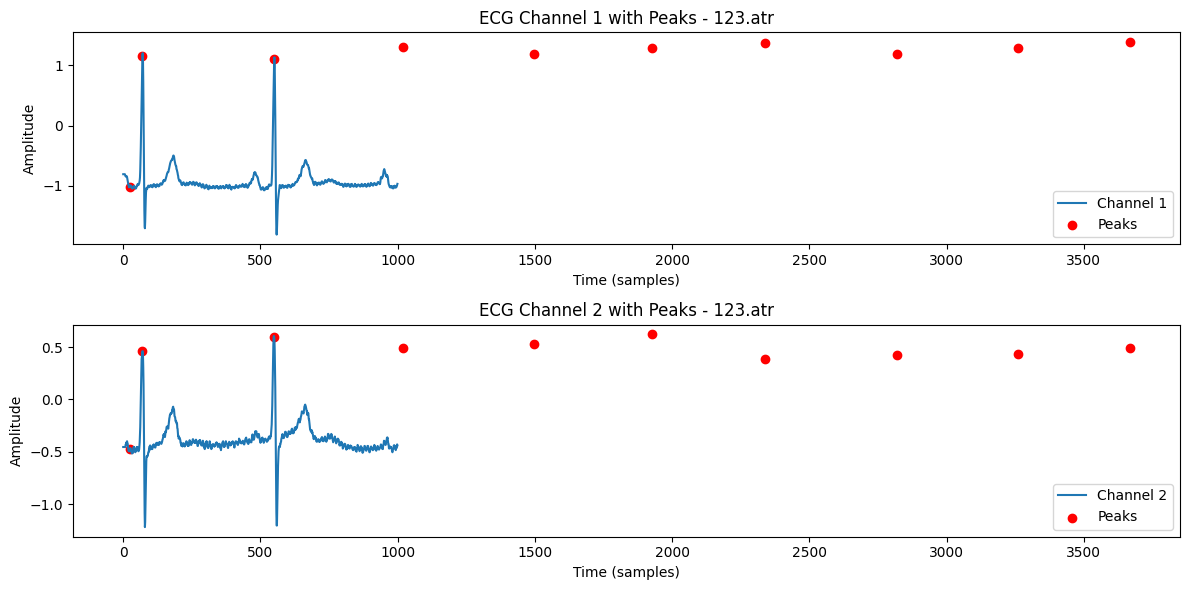

Peaks for 121.atr: [    36    163    513 ... 649287 649587 649878]


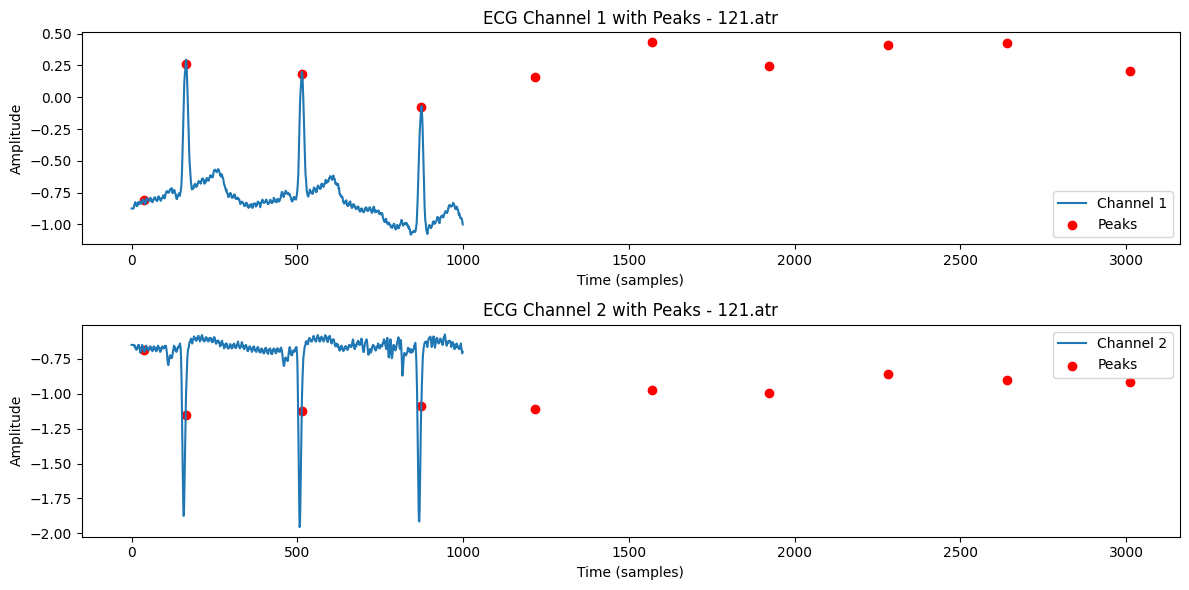

Peaks for 109.atr: [    18    111    343 ... 649378 649663 649931]


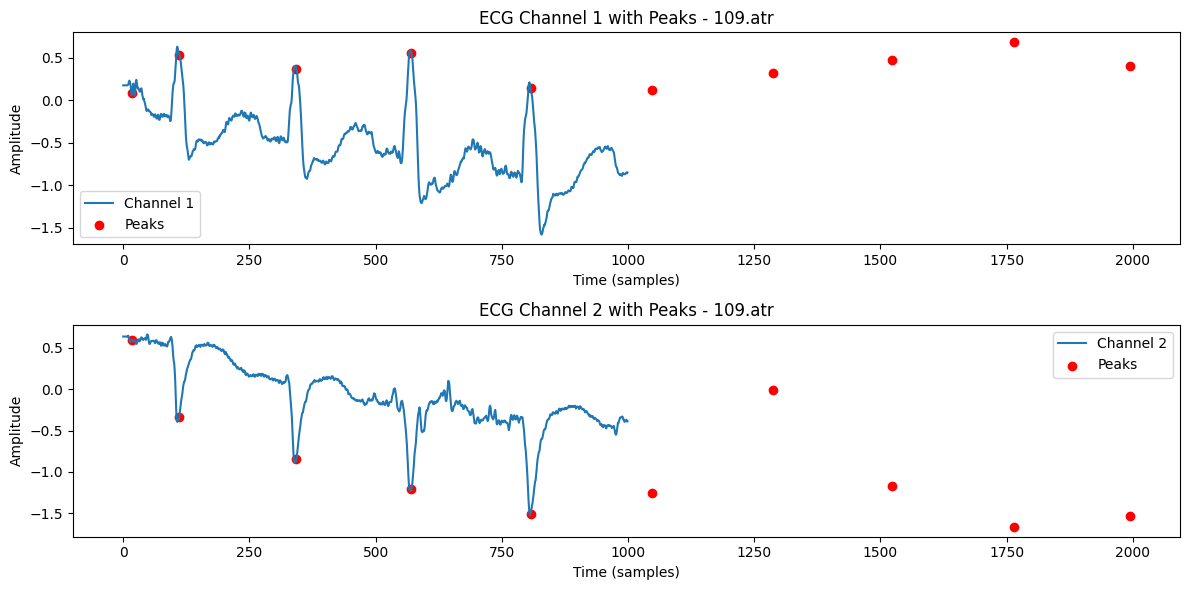

Peaks for 108.atr: [    23     88    442 ... 649170 649471 649769]


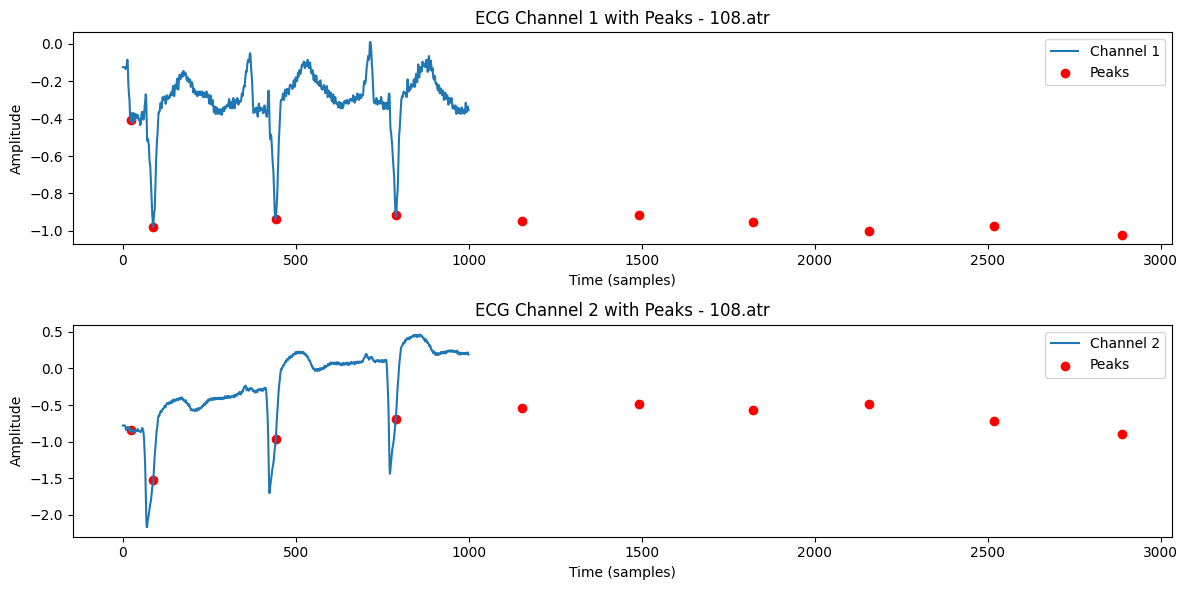

Peaks for 219.atr: [   188    300    614 ... 649174 649448 649737]


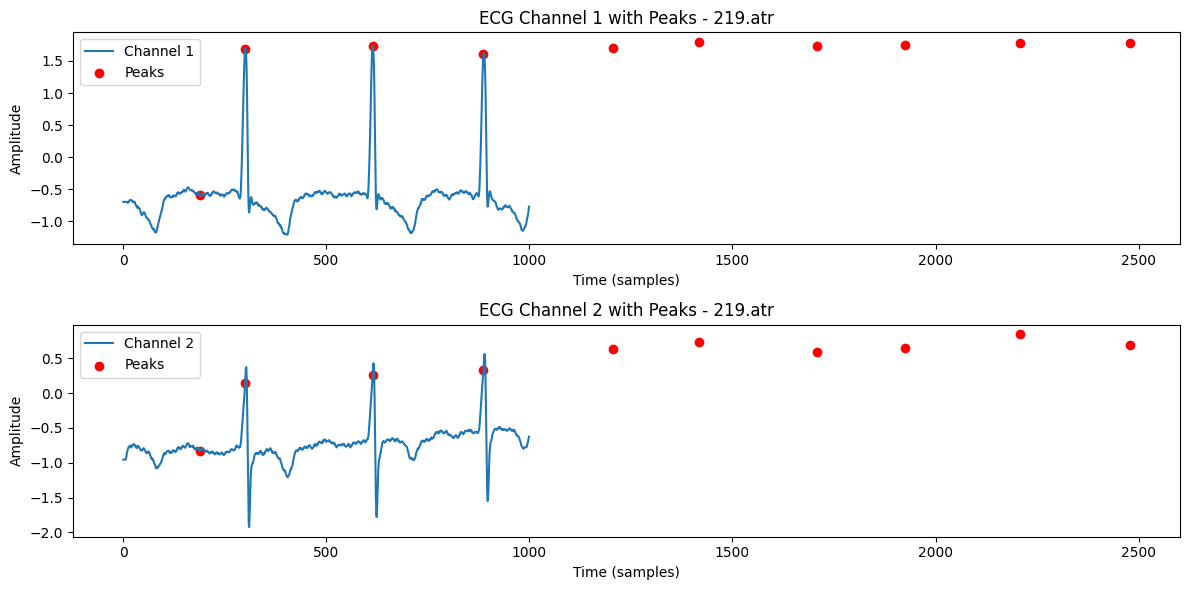

Peaks for 231.atr: [    57    180    527 ... 649142 649501 649862]


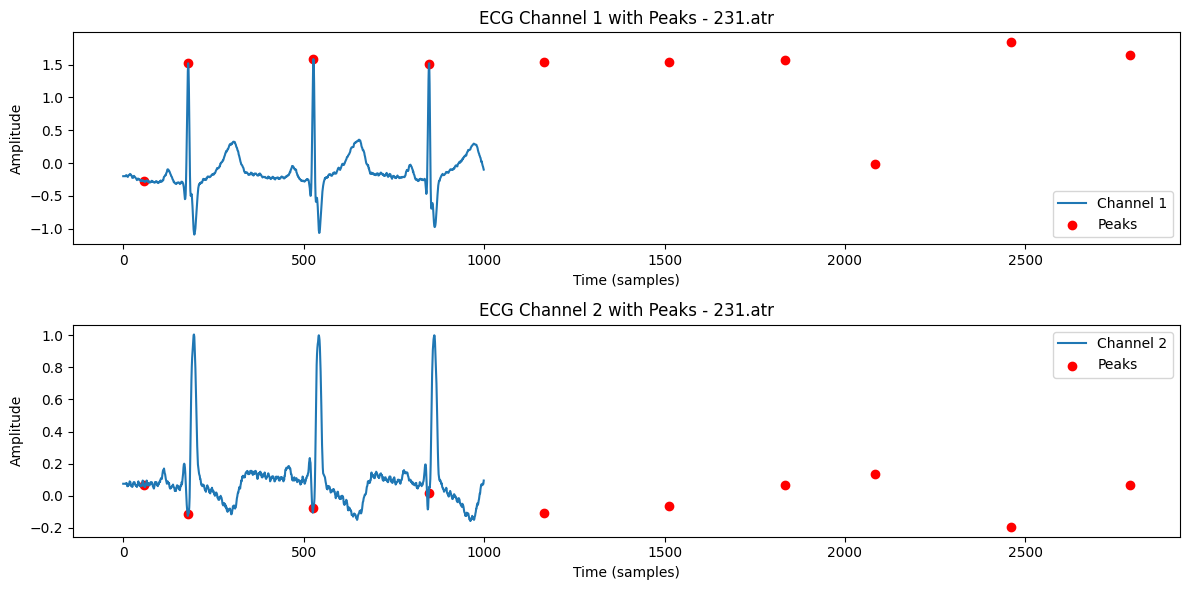

Peaks for 230.atr: [    30     75    349 ... 649338 649572 649807]


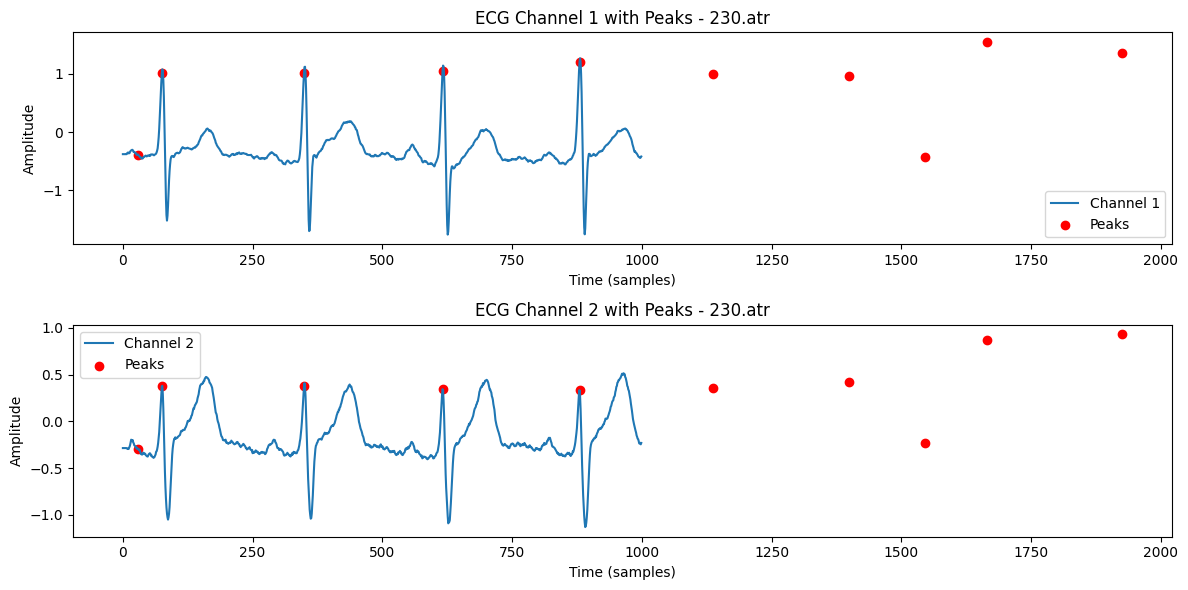

Peaks for 232.atr: [    76    491    737 ... 648845 649097 649366]


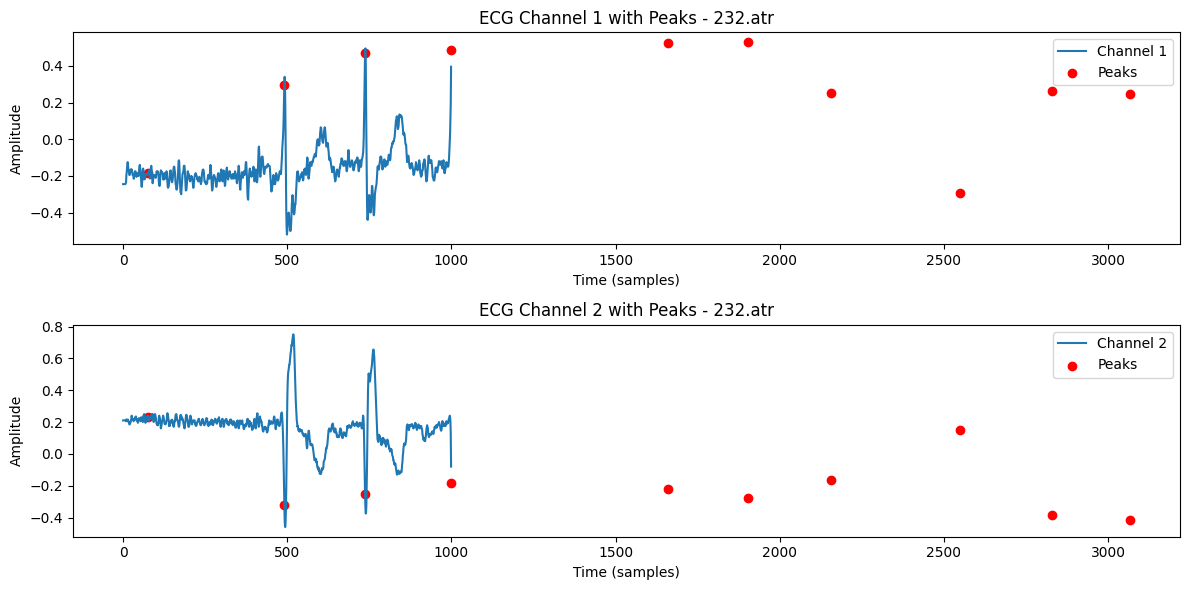

Peaks for 233.atr: [     3     42    320 ... 649518 649730 649946]


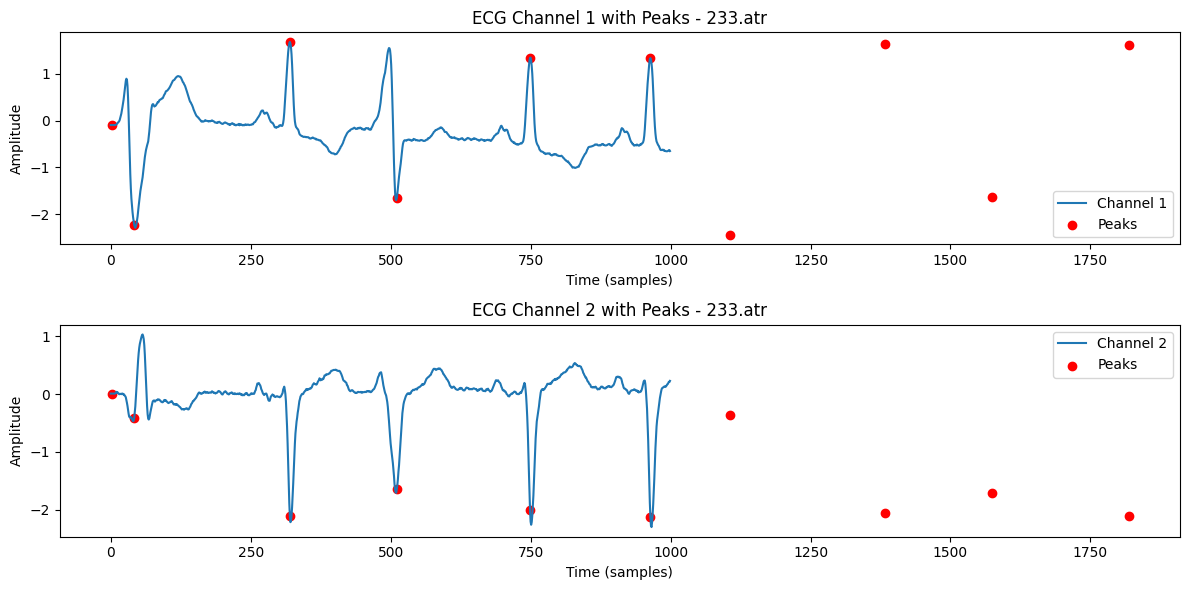

Peaks for 223.atr: [    96    204    480 ... 649349 649599 649849]


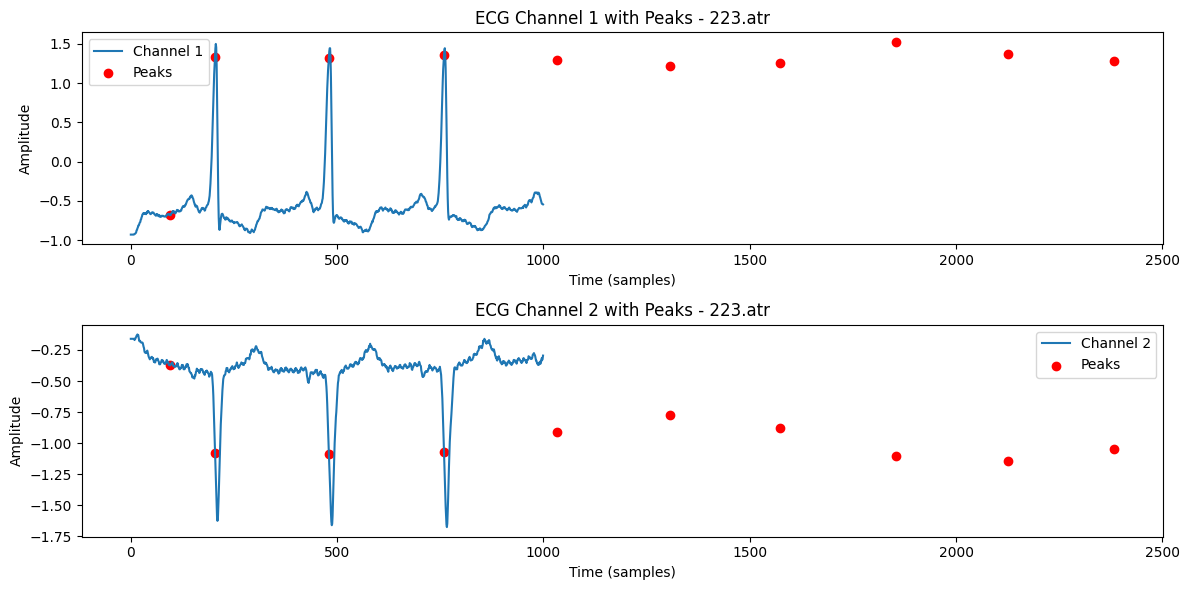

Peaks for 222.atr: [    17     81    361 ... 649317 649600 649859]


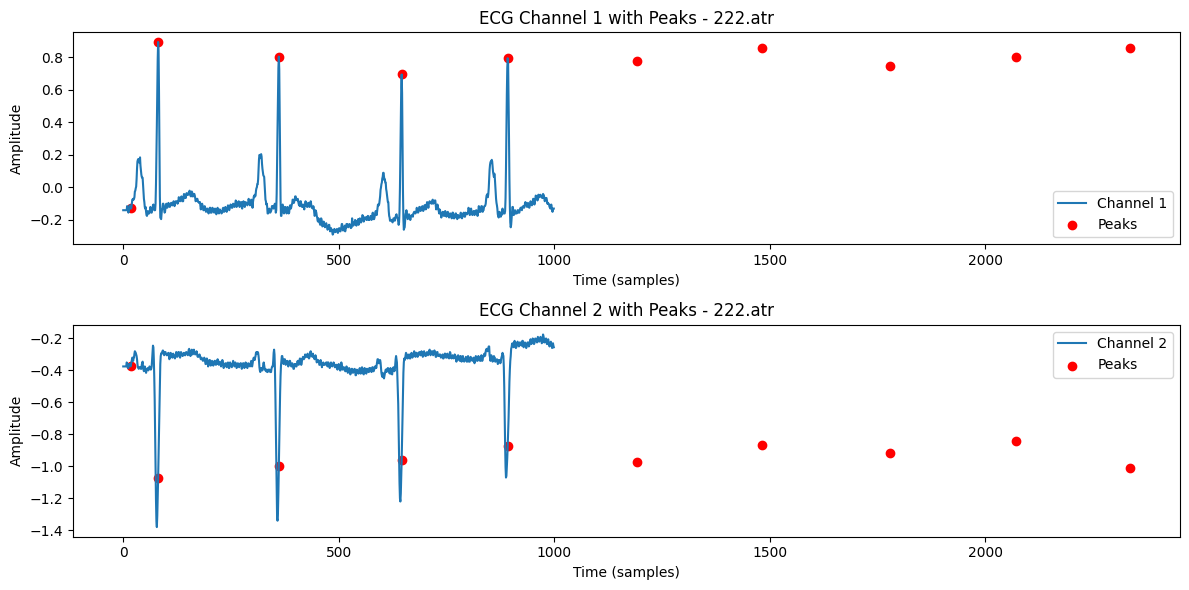

Peaks for 220.atr: [     0     28    313 ... 649277 649584 649904]


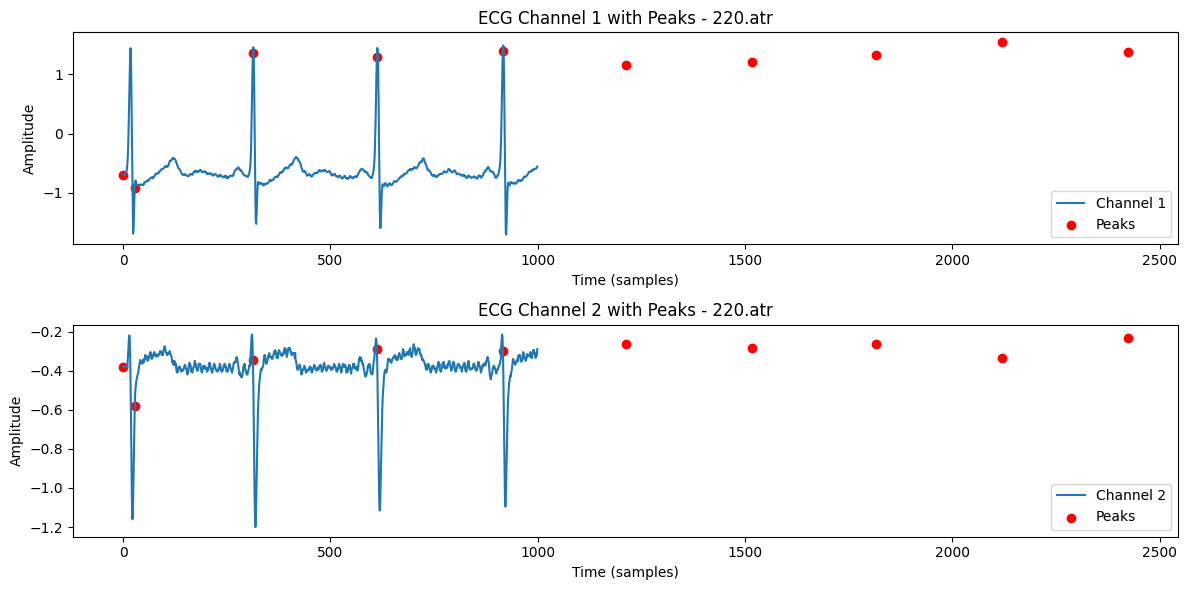

Peaks for 234.atr: [    52    135    366 ... 649292 649536 649772]


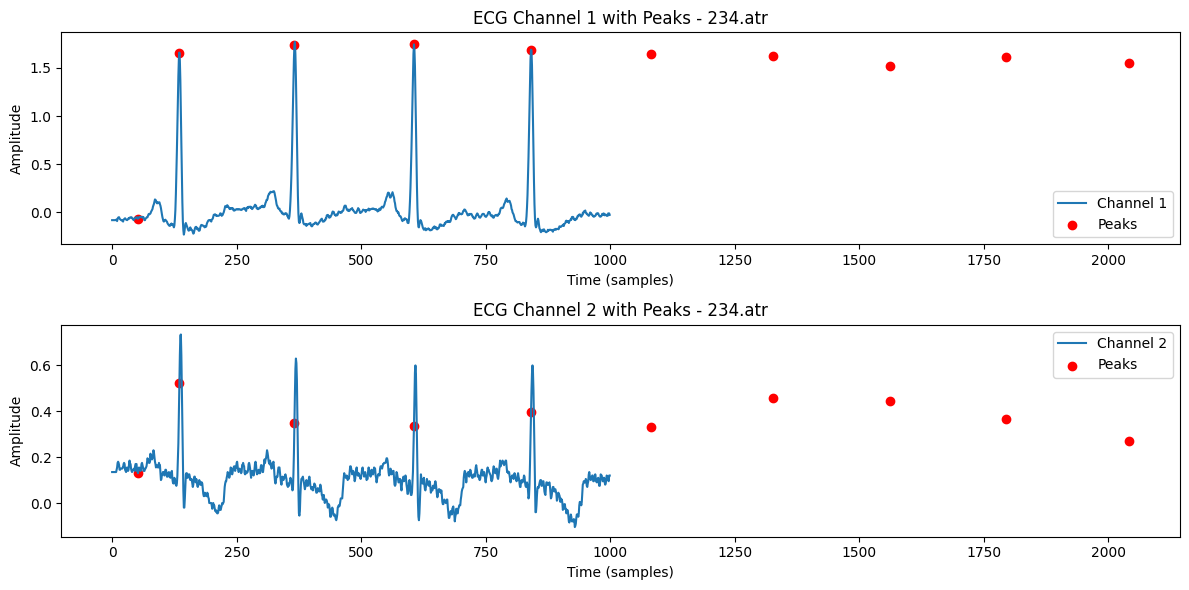

Peaks for 208.atr: [     9     46    209 ... 649411 649704 649935]


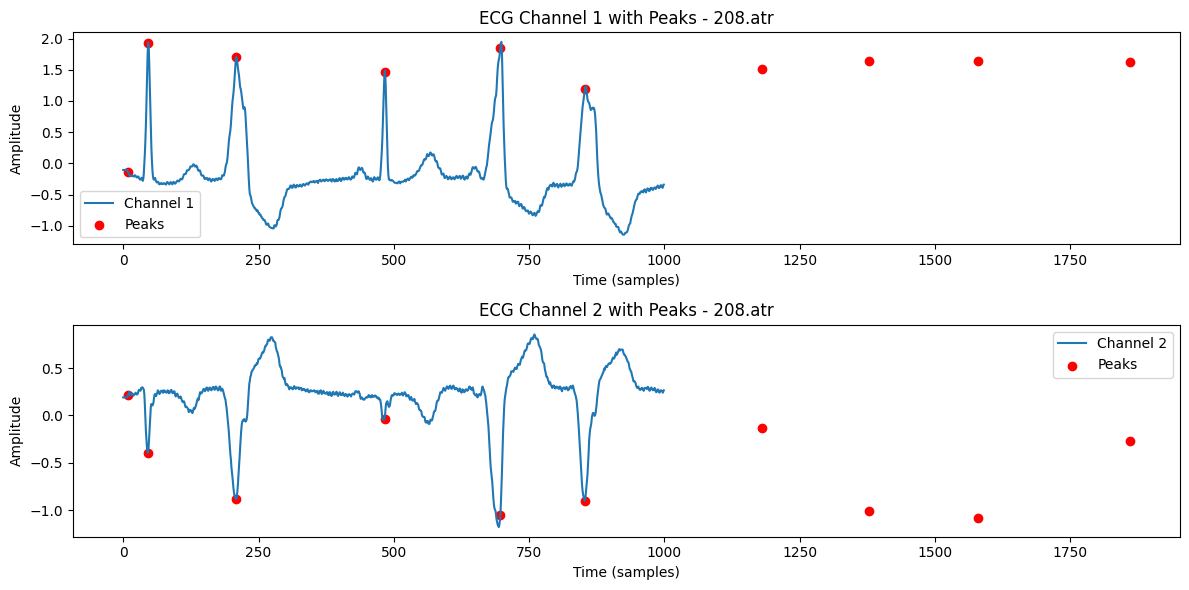

Peaks for 209.atr: [    84    189    425 ... 649387 649627 649857]


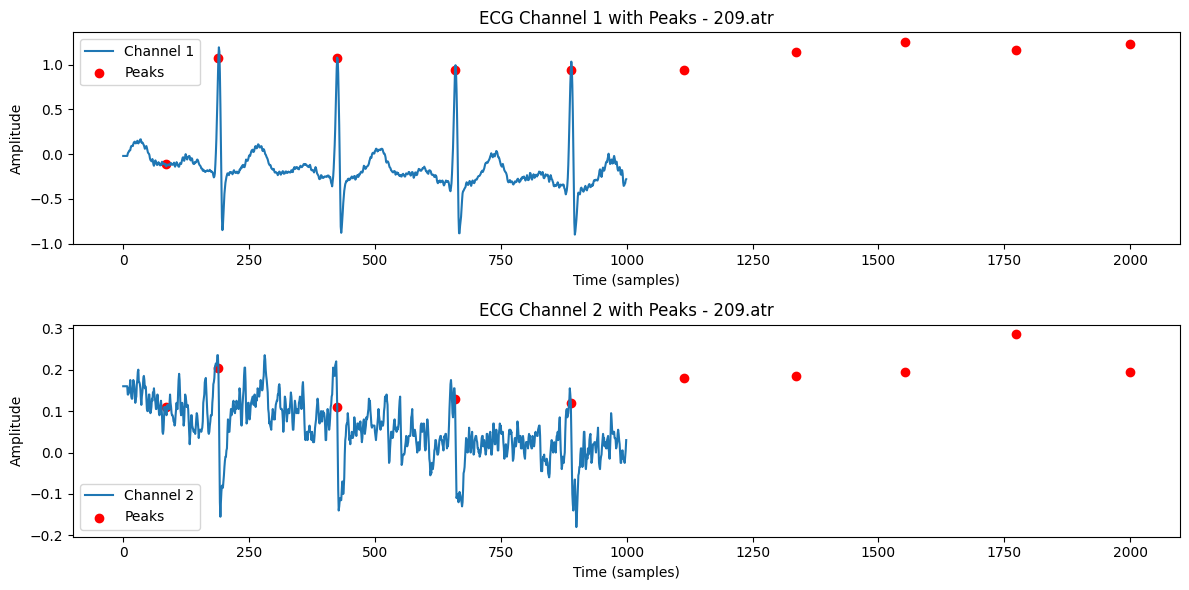

Peaks for 221.atr: [    28    220    442 ... 649236 649530 649810]


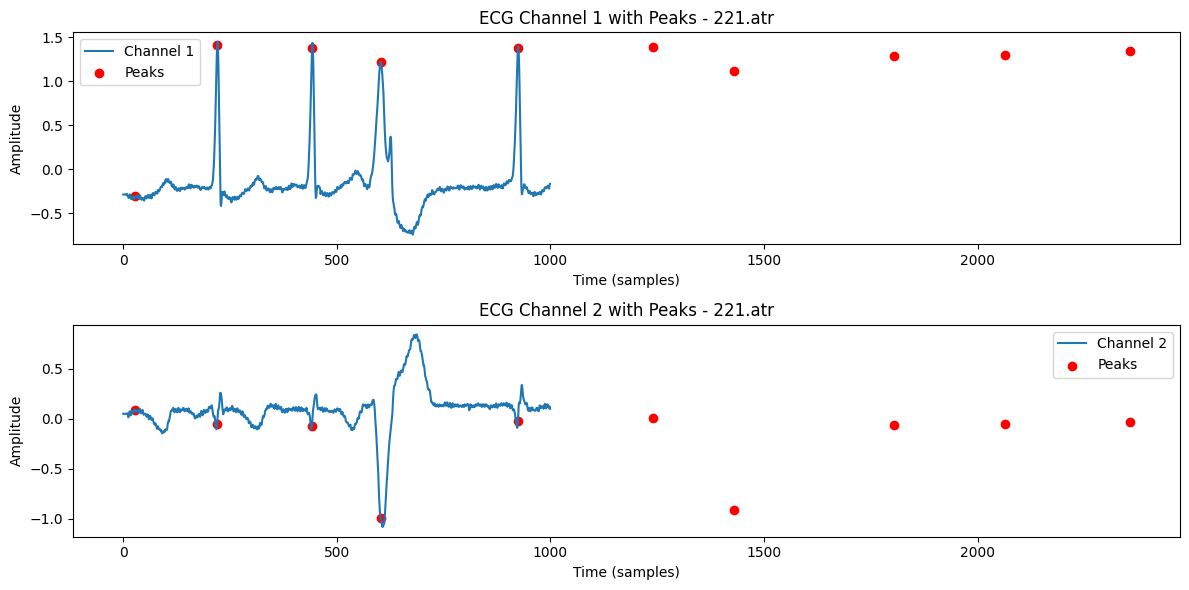

Peaks for 210.atr: [    13     57    250 ... 649513 649758 649962]


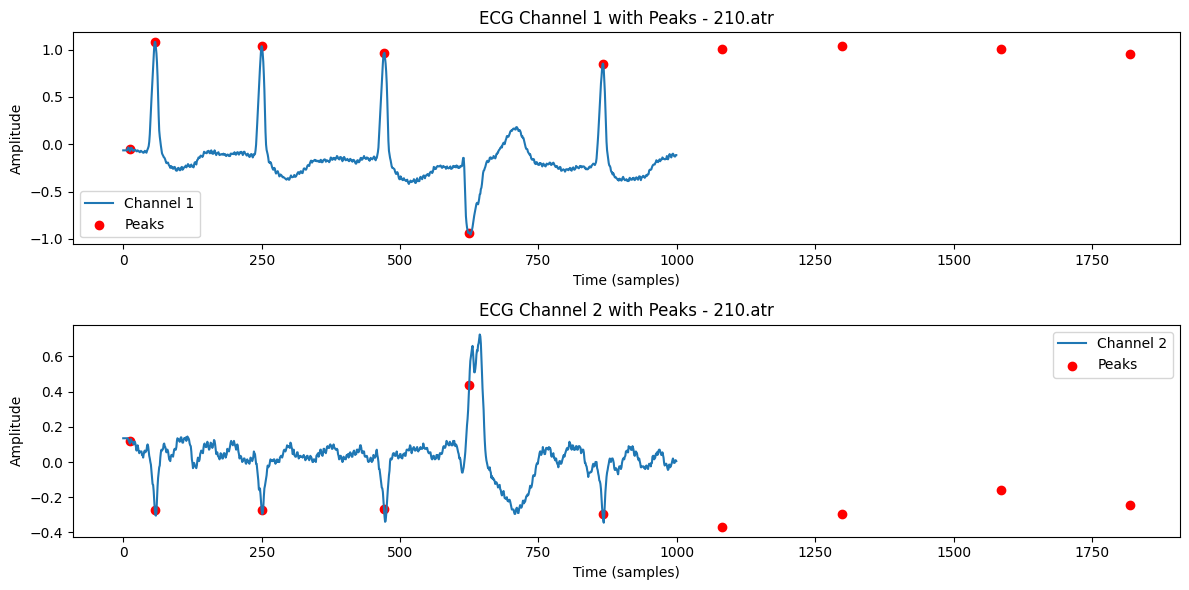

Peaks for 205.atr: [    15    229    466 ... 649326 649596 649857]


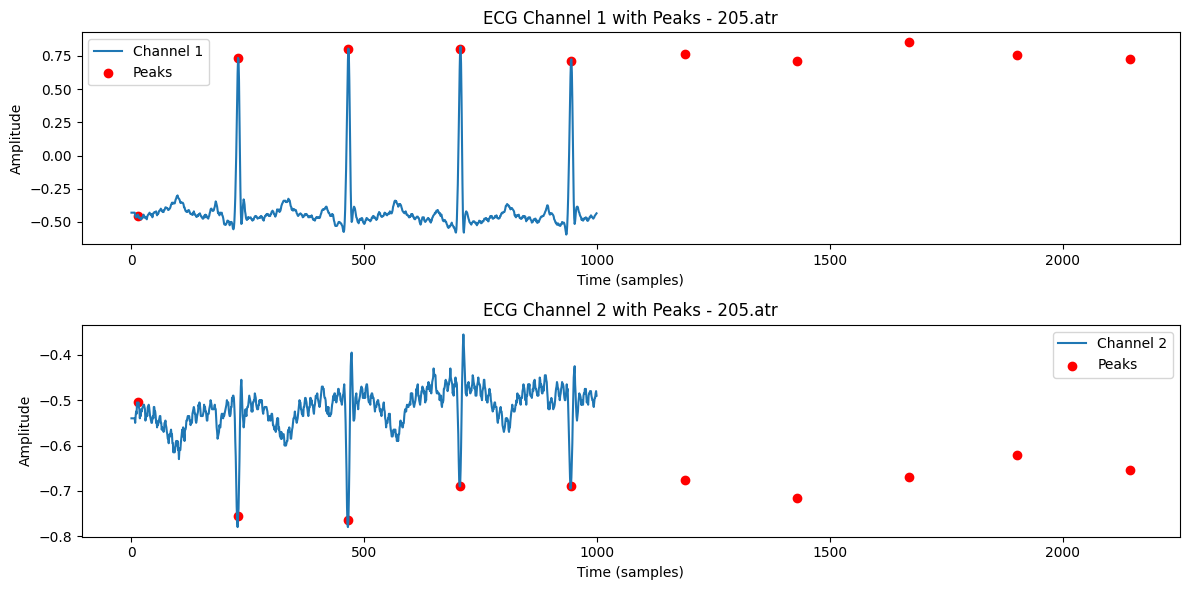

Peaks for 213.atr: [    18     95    253 ... 649577 649790 649992]


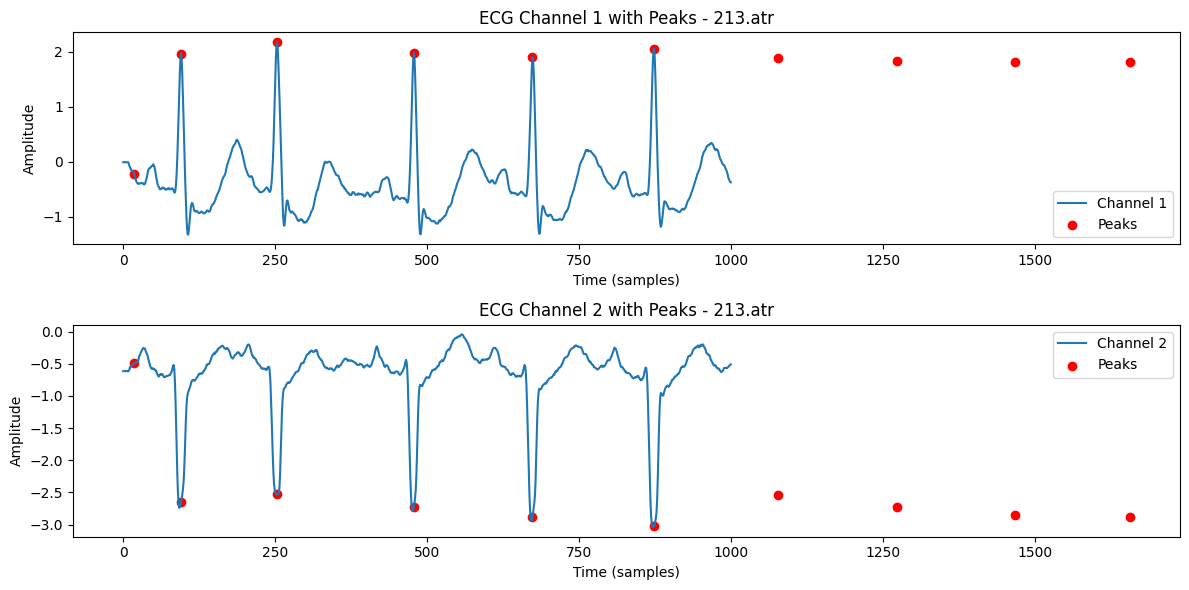

Peaks for 207.atr: [     9     50    312 ... 649431 649602 649799]


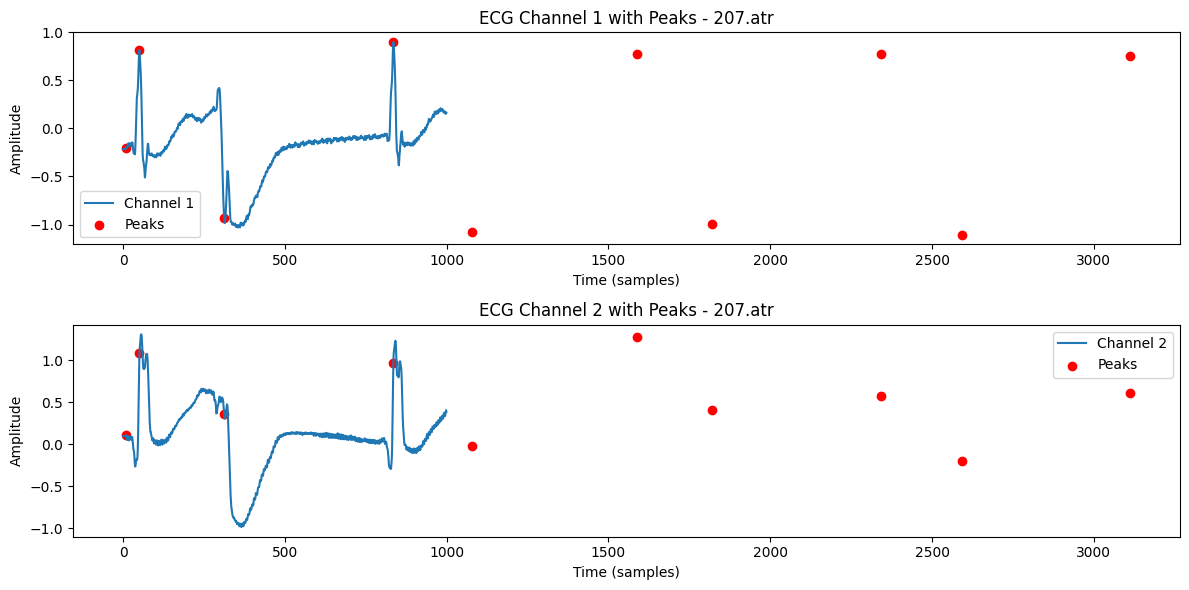

Peaks for 212.atr: [   125    214    451 ... 649414 649673 649945]


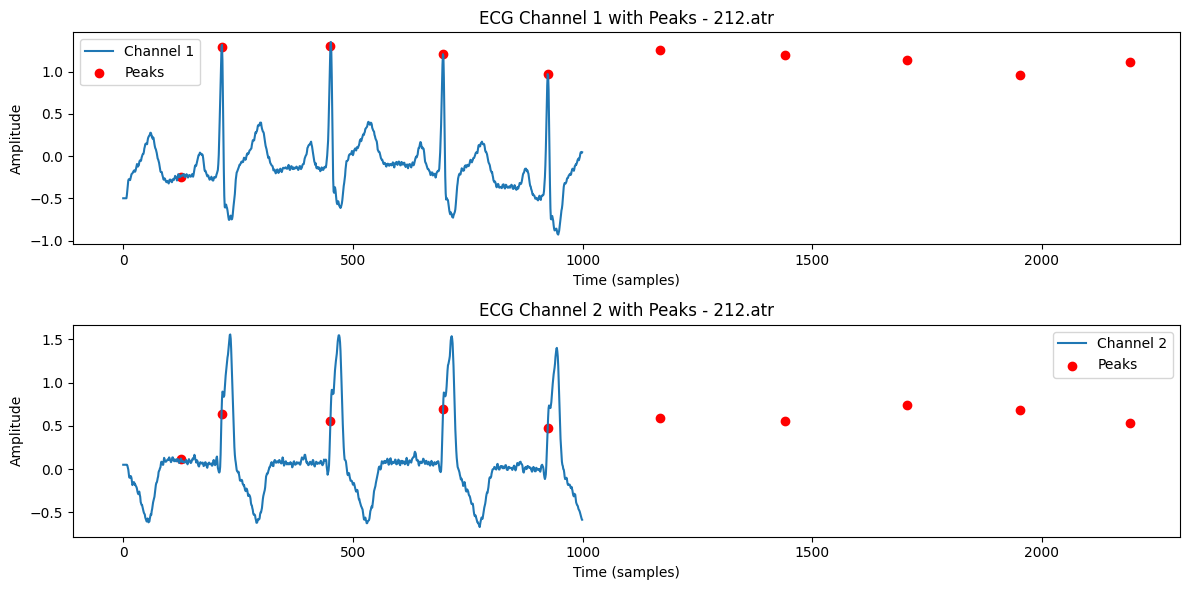

Peaks for 202.atr: [   183    348    742 ... 649342 649615 649877]


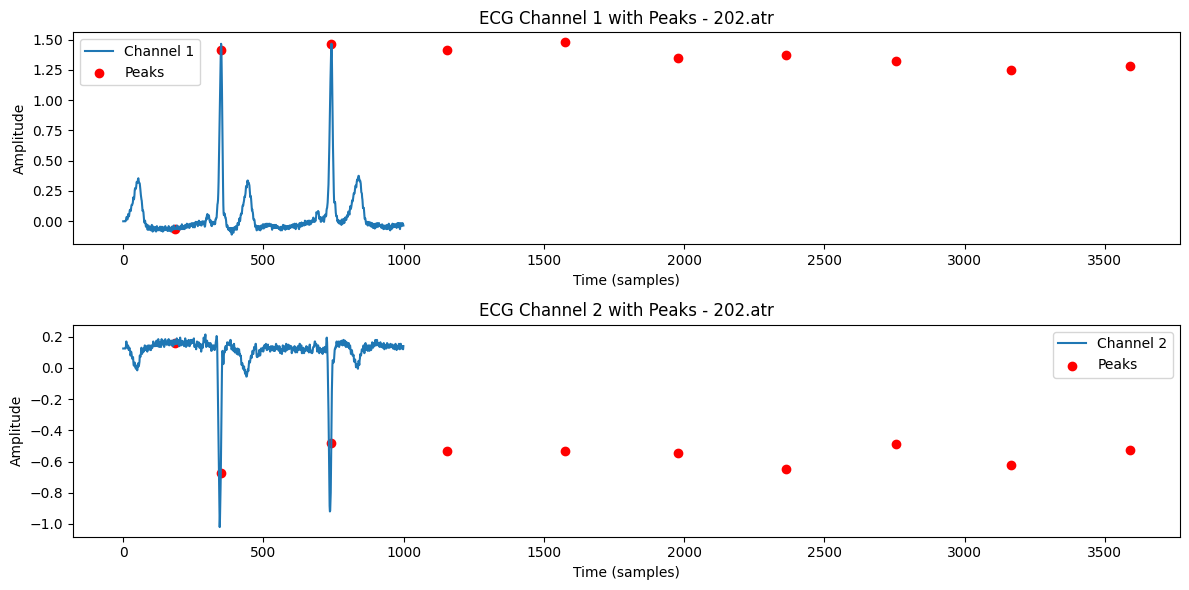

Error processing 102-0.atr: [Errno 2] No such file or directory: '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/102-0.hea'
Peaks for 203.atr: [    14     24     99 ... 649237 649448 649777]


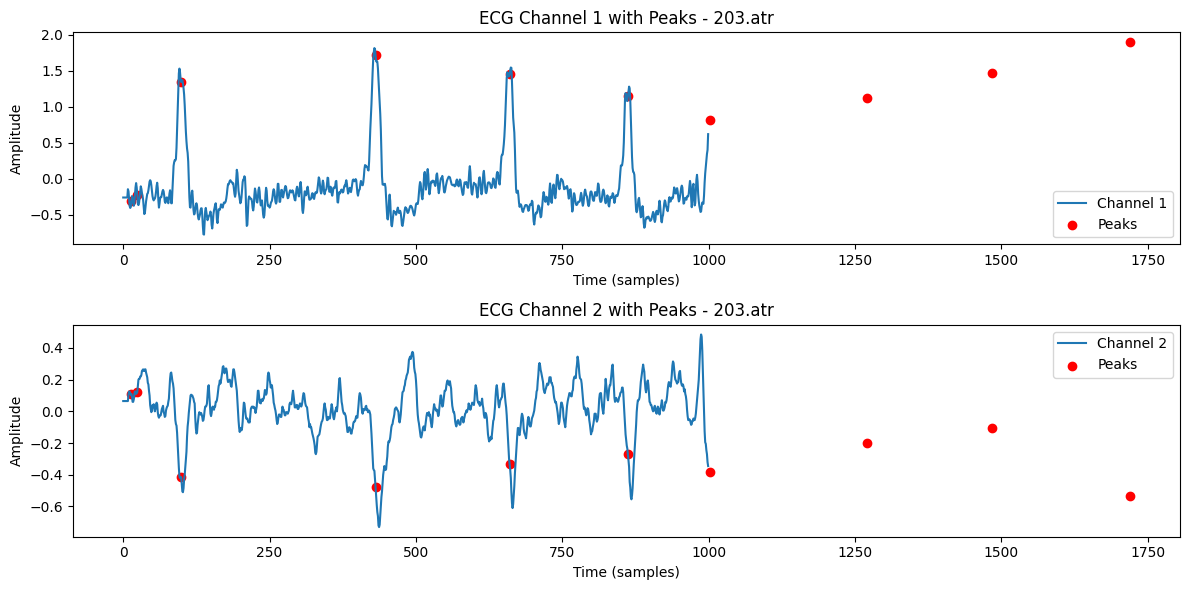

Peaks for 217.atr: [   102    205    500 ... 649114 649429 649738]


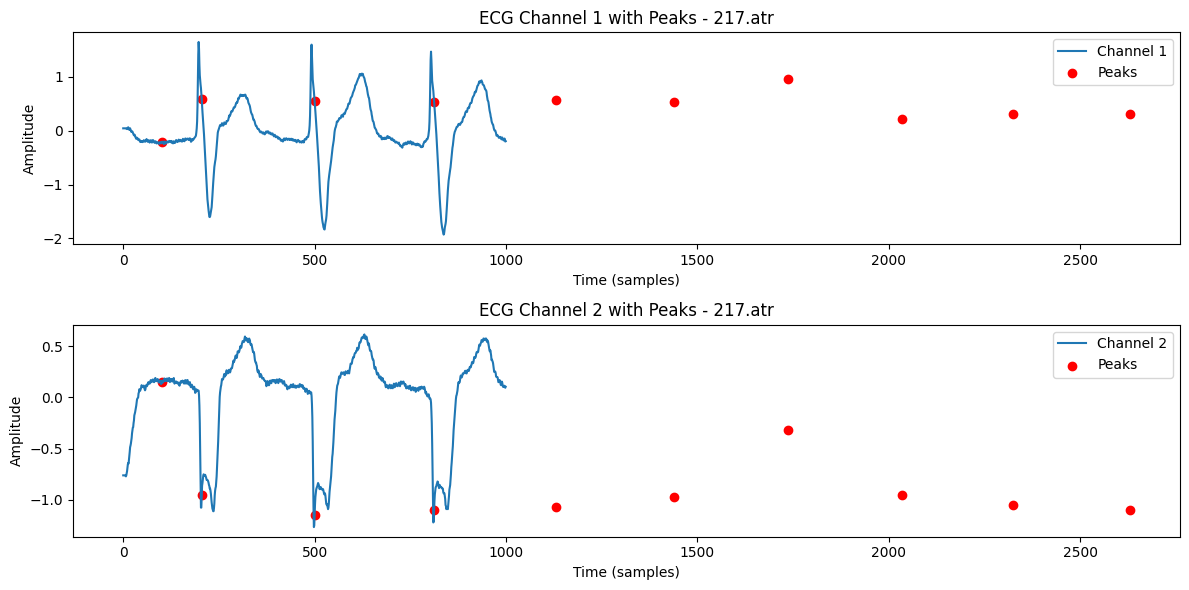

Peaks for 201.atr: [    60    159    415 ... 649104 649181 649800]


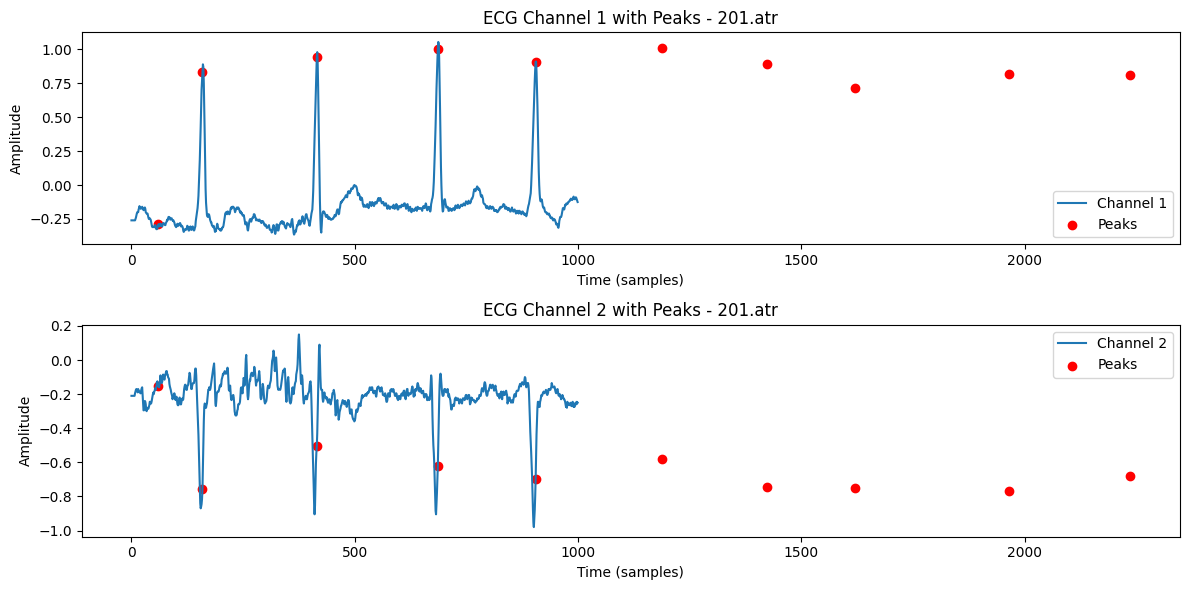

Peaks for 215.atr: [    41    124    313 ... 649501 649685 649875]


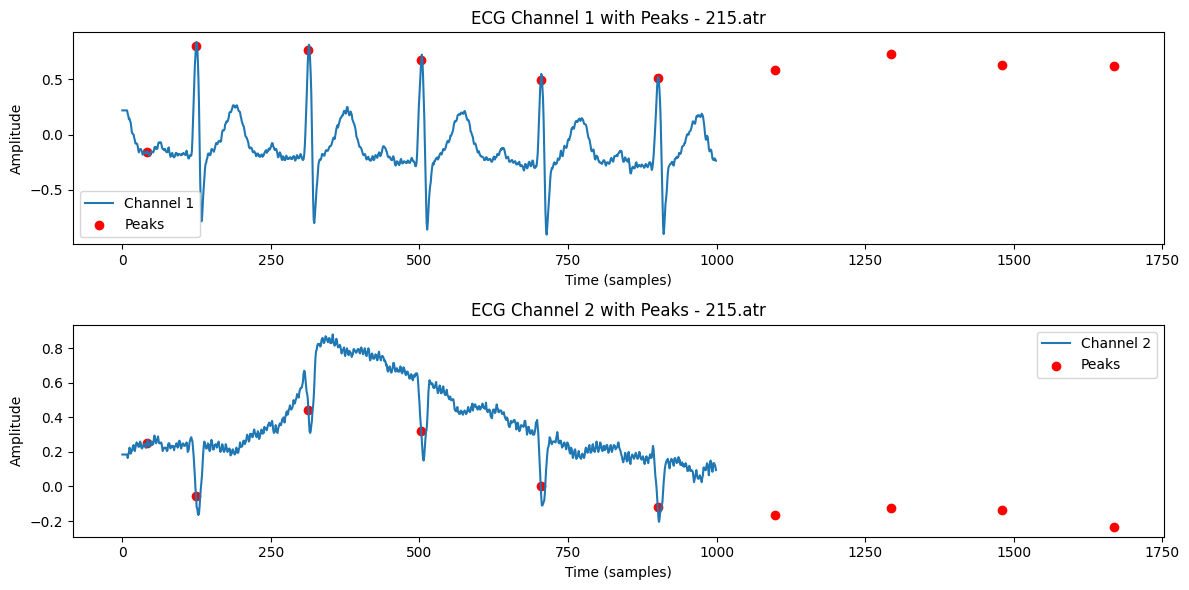

Peaks for 228.atr: [    27    160    433 ... 649108 649332 649761]


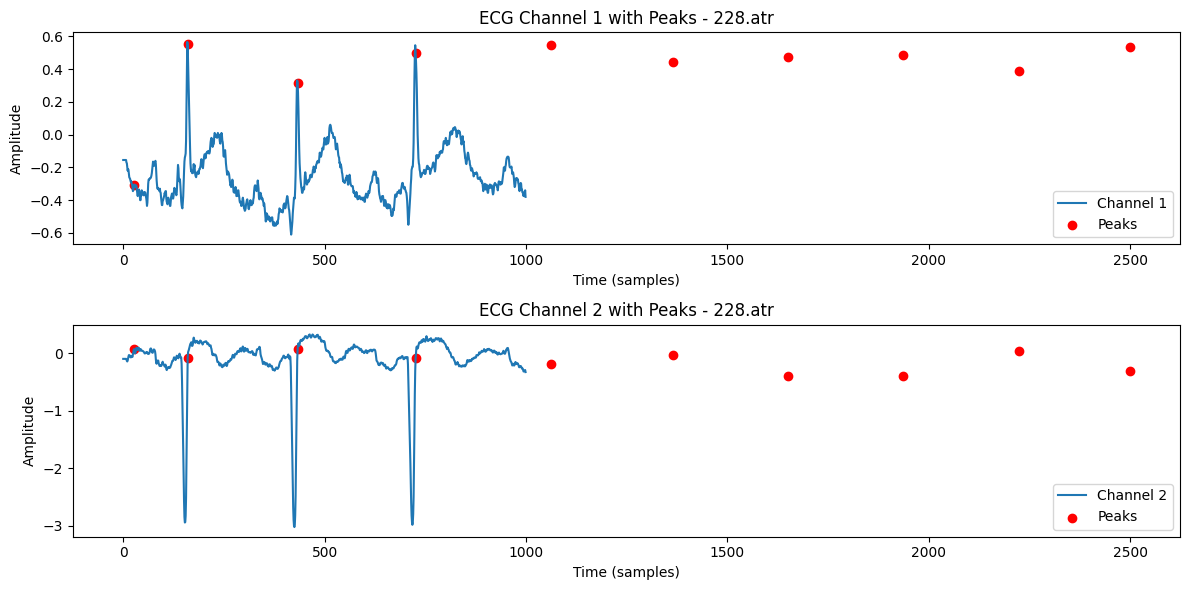

Peaks for 214.atr: [    19     58    346 ... 649379 649627 649891]


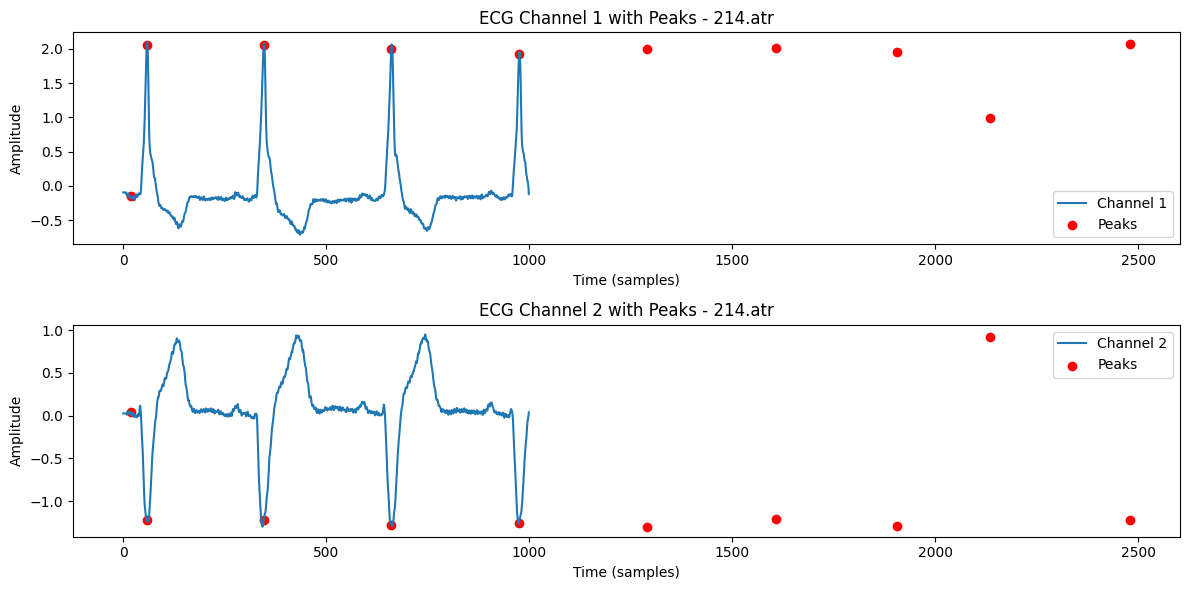

Peaks for 200.atr: [    67    225    487 ... 649408 649664 649927]


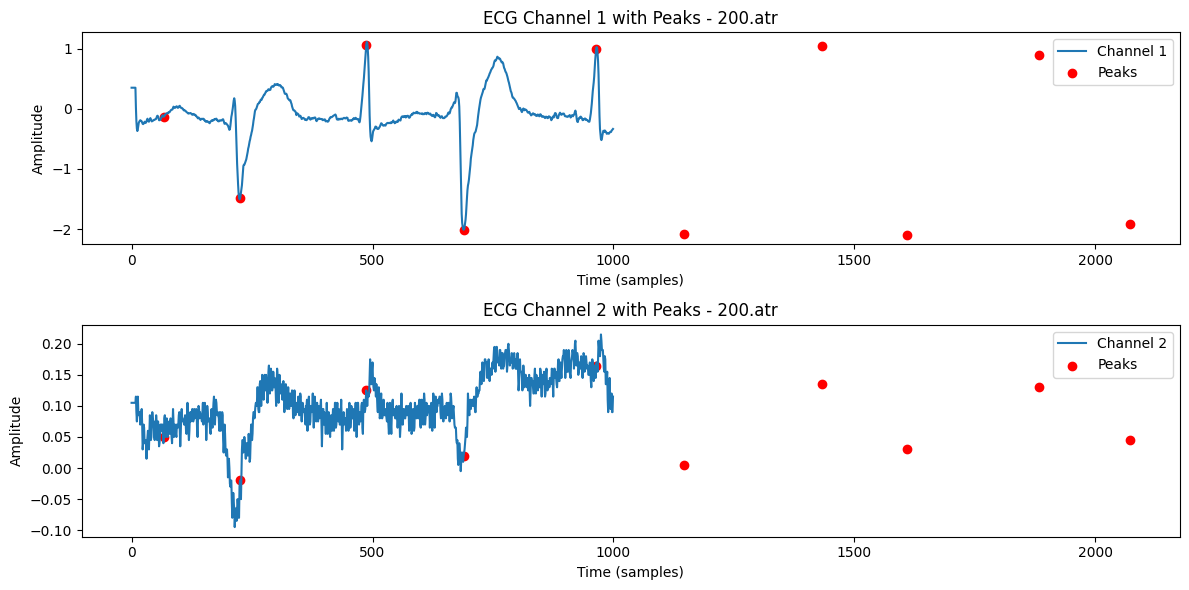

Peaks for 111.atr: [    31    197    489 ... 649148 649441 649724]


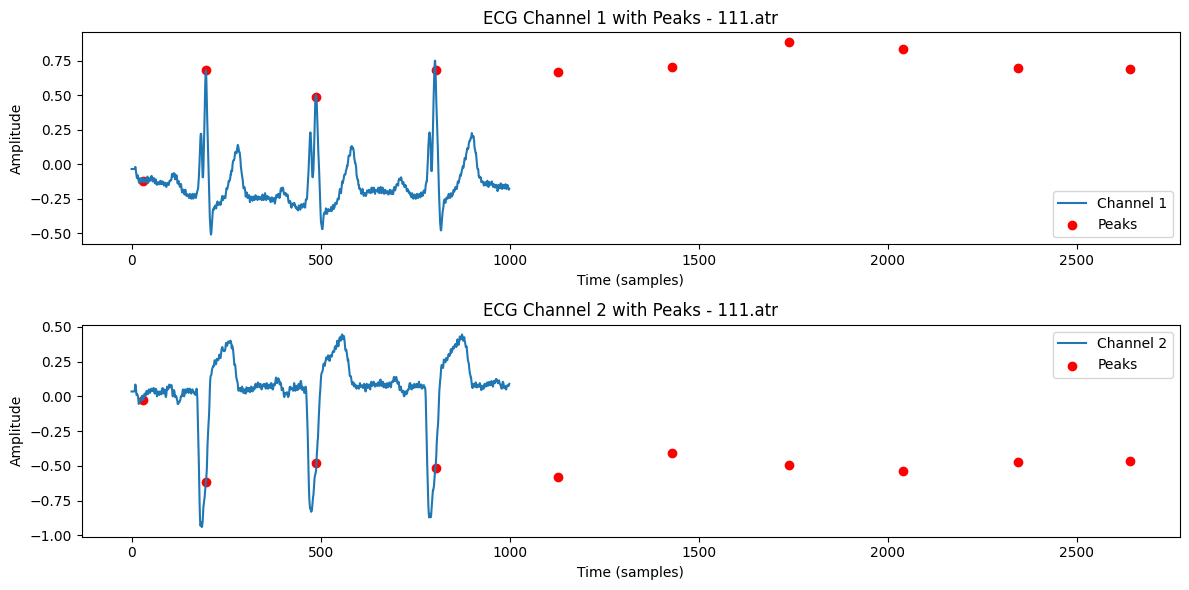

Peaks for 105.atr: [    67    197    459 ... 649221 649471 649740]


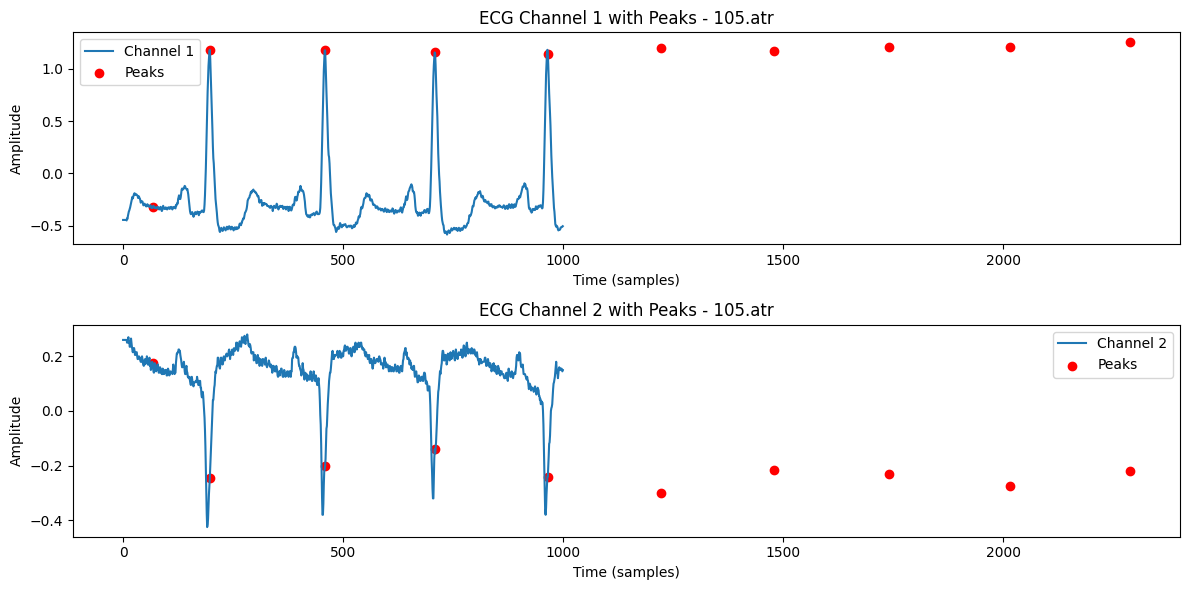

Peaks for 104.atr: [    36     73    316 ... 649300 649580 649876]


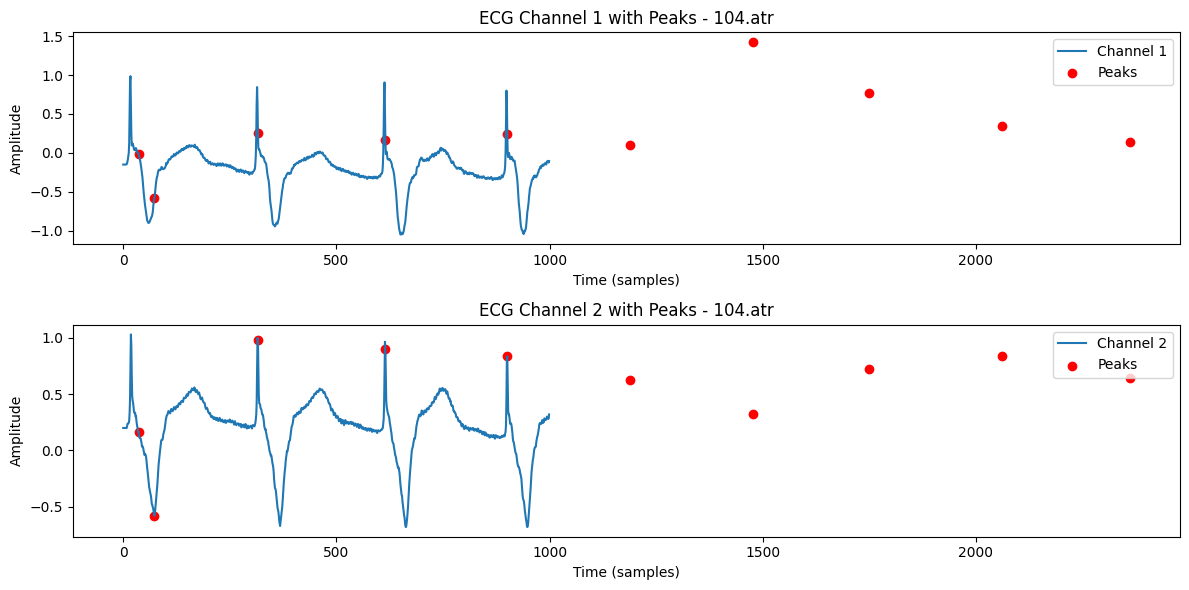

Peaks for 106.atr: [    83    229    351 ... 649162 649340 649791]


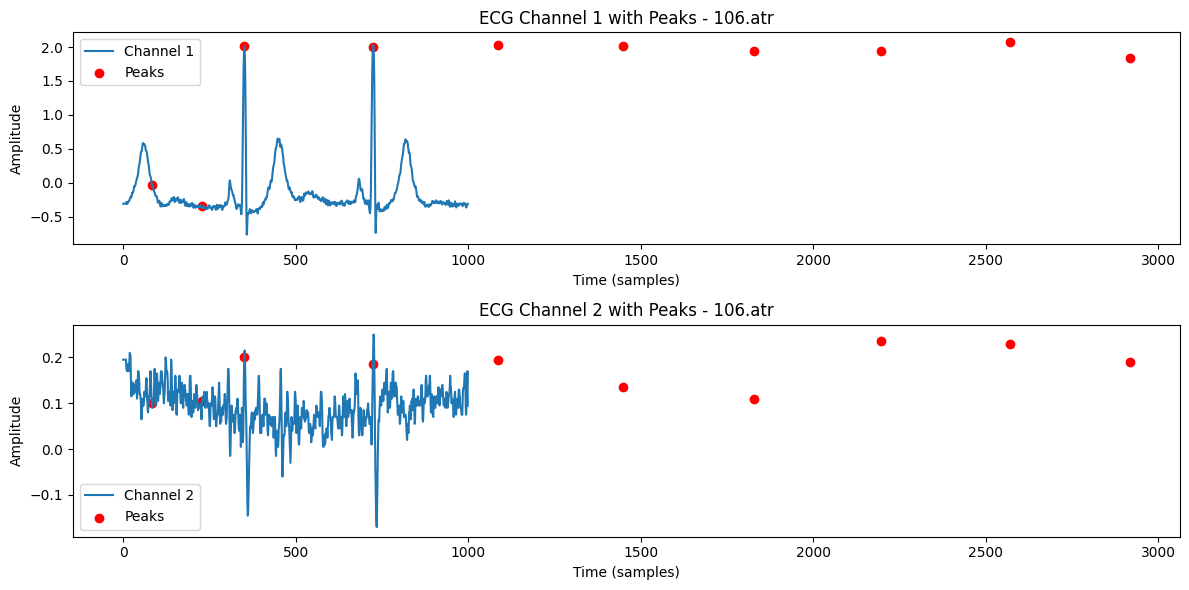

Peaks for 112.atr: [    15    124    382 ... 649361 649626 649883]


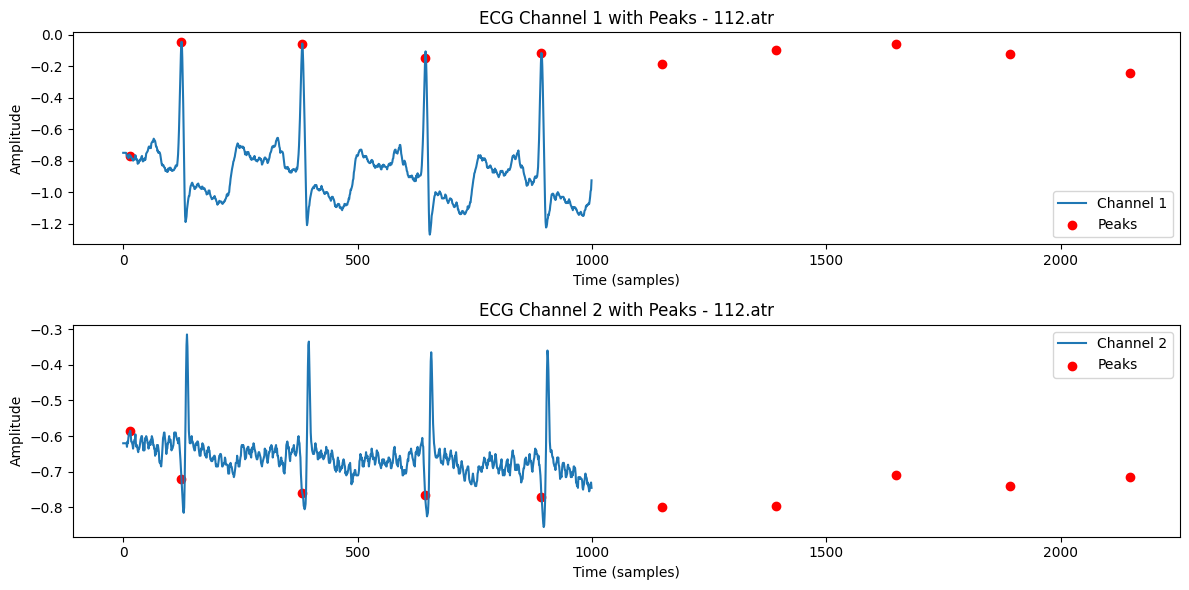

Peaks for 113.atr: [    22    170    583 ... 649364 649675 649994]


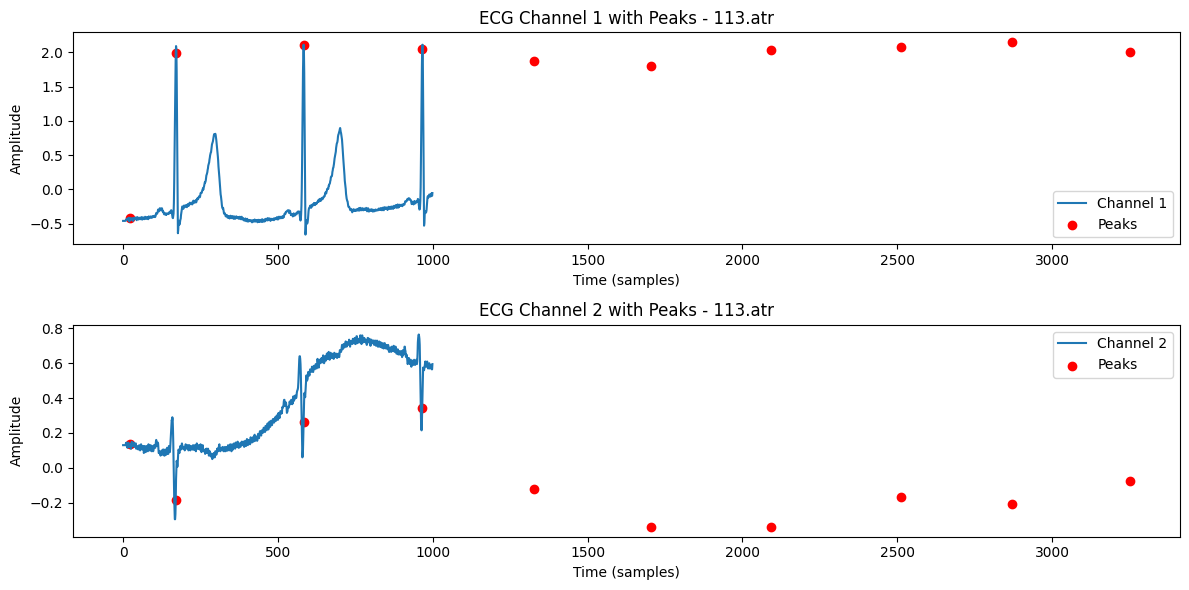

Peaks for 107.atr: [    47     95    272 ... 649129 649441 649748]


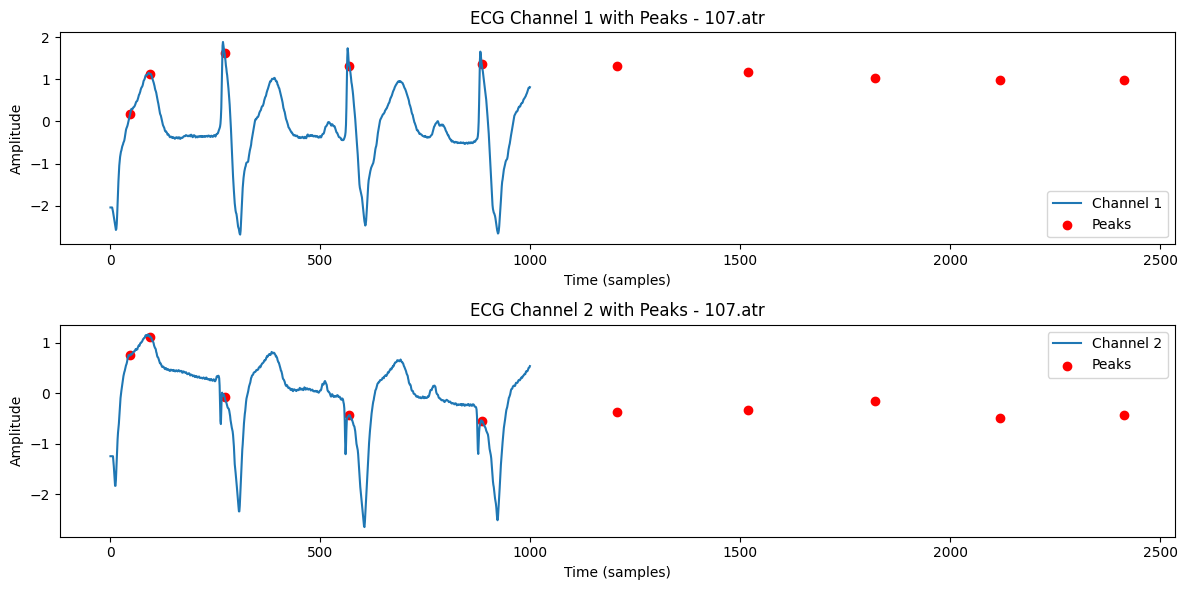

Peaks for 103.atr: [    21    265    575 ... 649195 649534 649875]


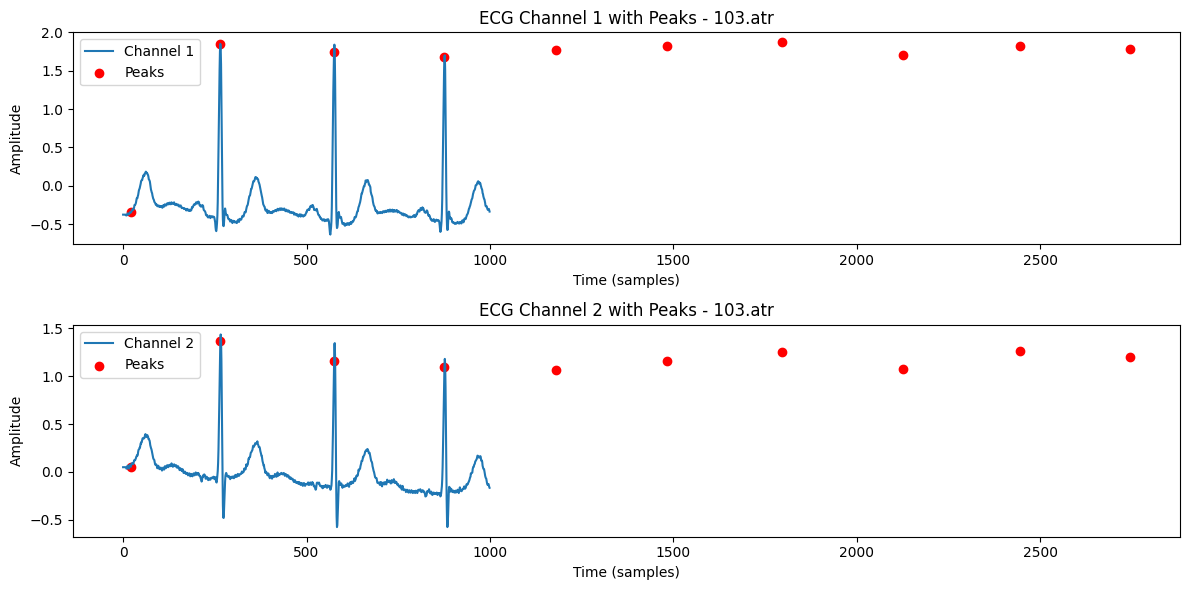

Peaks for 117.atr: [    72    189    598 ... 649070 649498 649926]


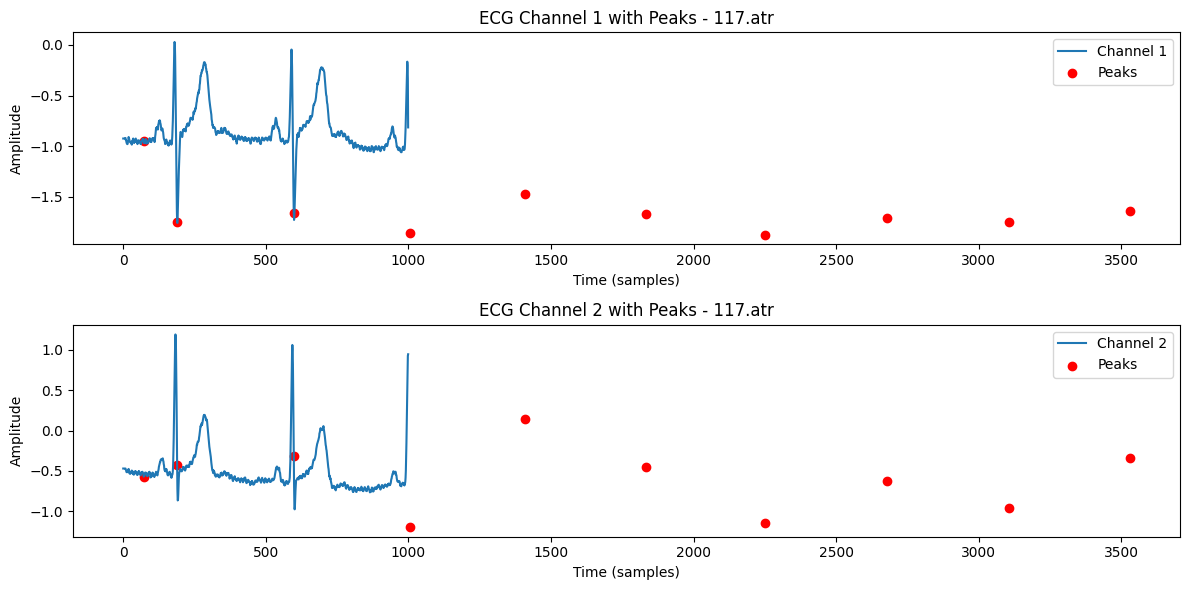

Peaks for 116.atr: [   174    282    561 ... 649442 649701 649957]


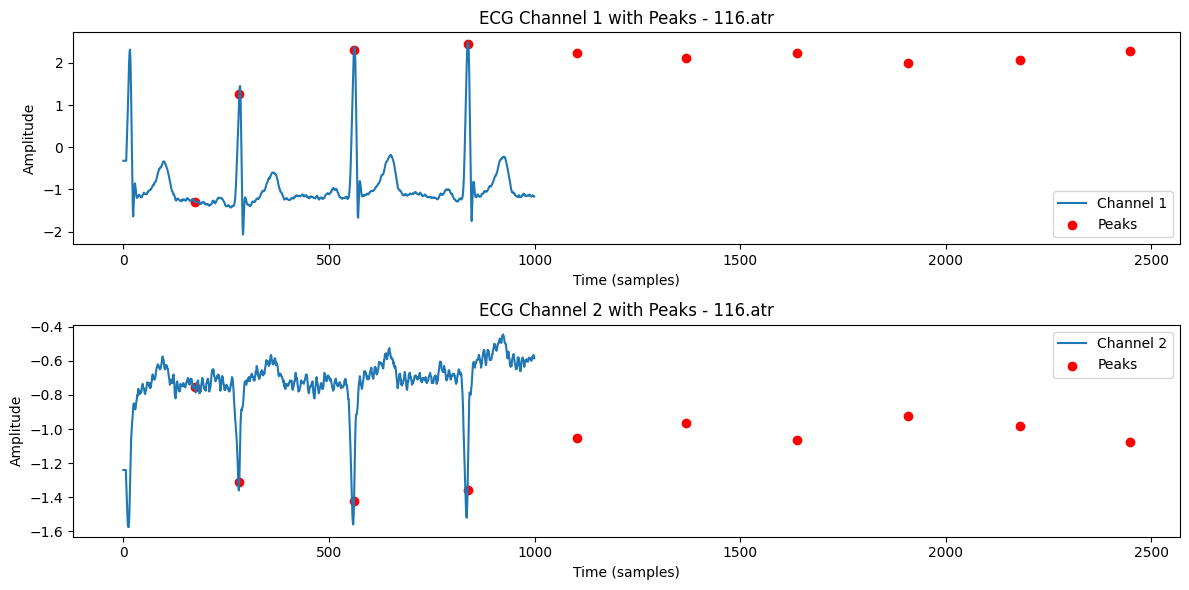

Peaks for 102.atr: [    68    136    410 ... 649244 649553 649852]


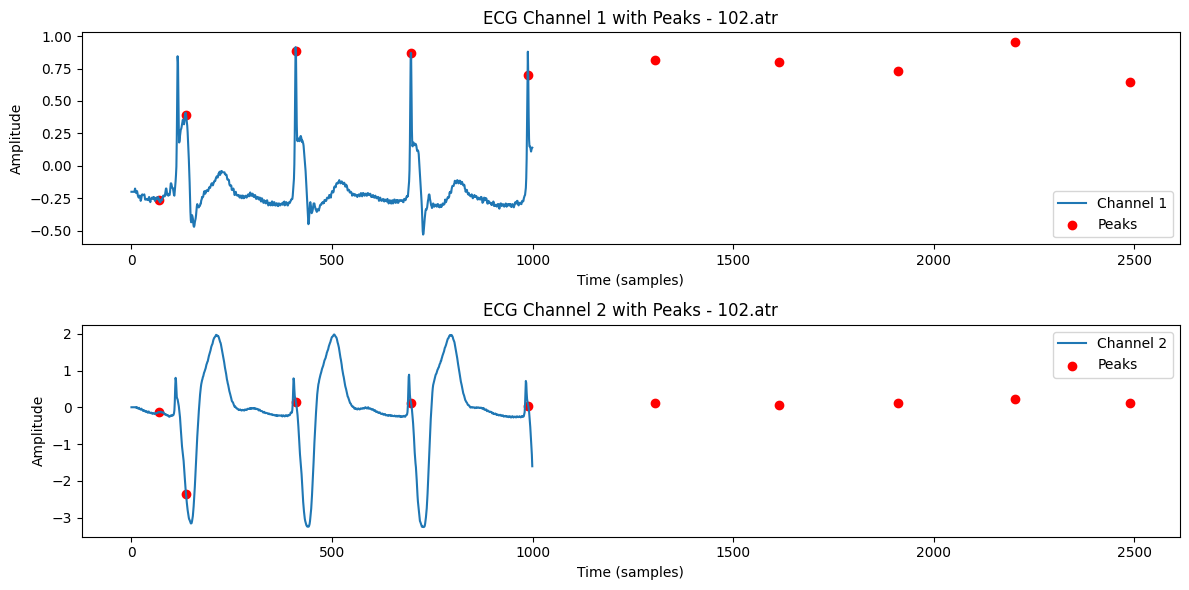

Peaks for 114.atr: [    21    310    726 ... 649261 649523 649783]


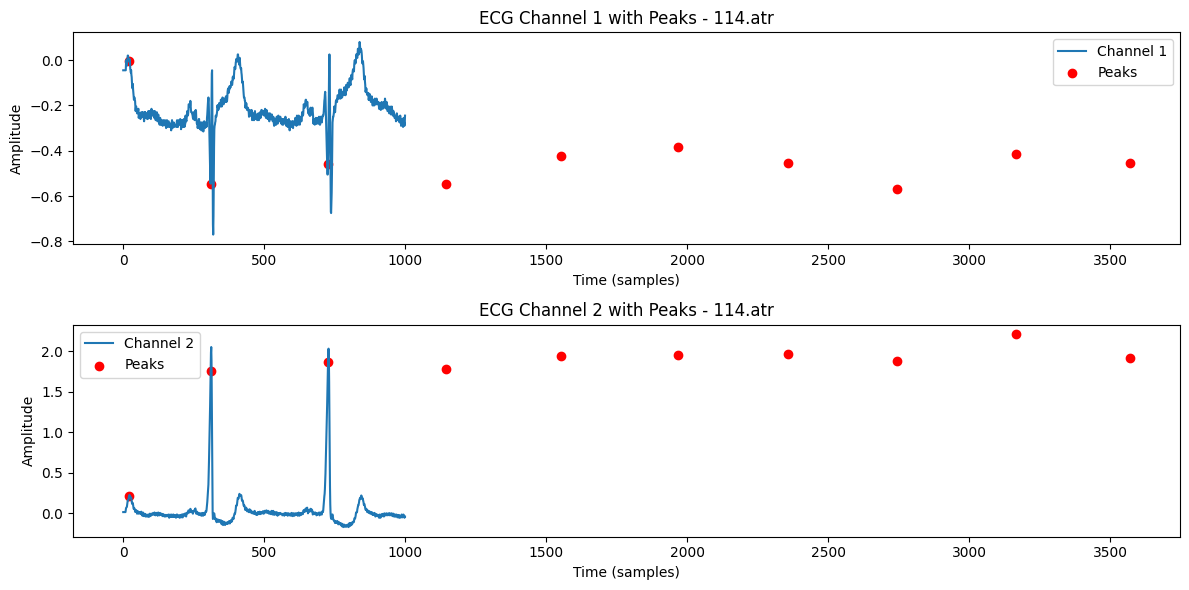

Peaks for 100.atr: [    18     77    370 ... 649484 649734 649991]


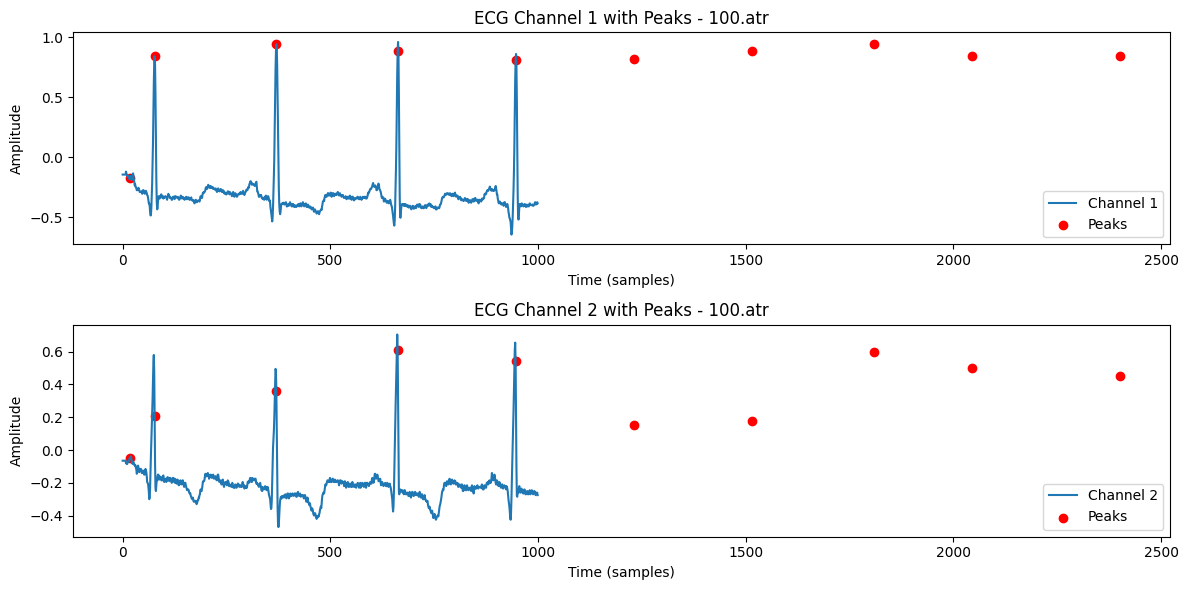

Peaks for 101.atr: [     7     83    396 ... 649004 649372 649751]


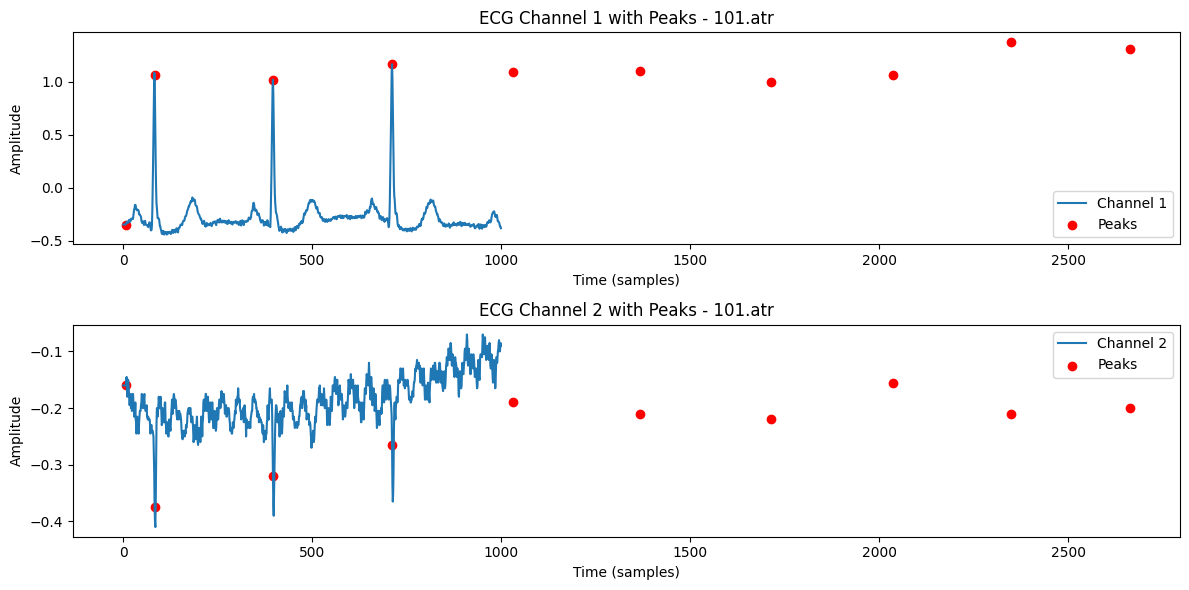

Peaks for 115.atr: [    44    161    518 ... 649357 649647 649955]


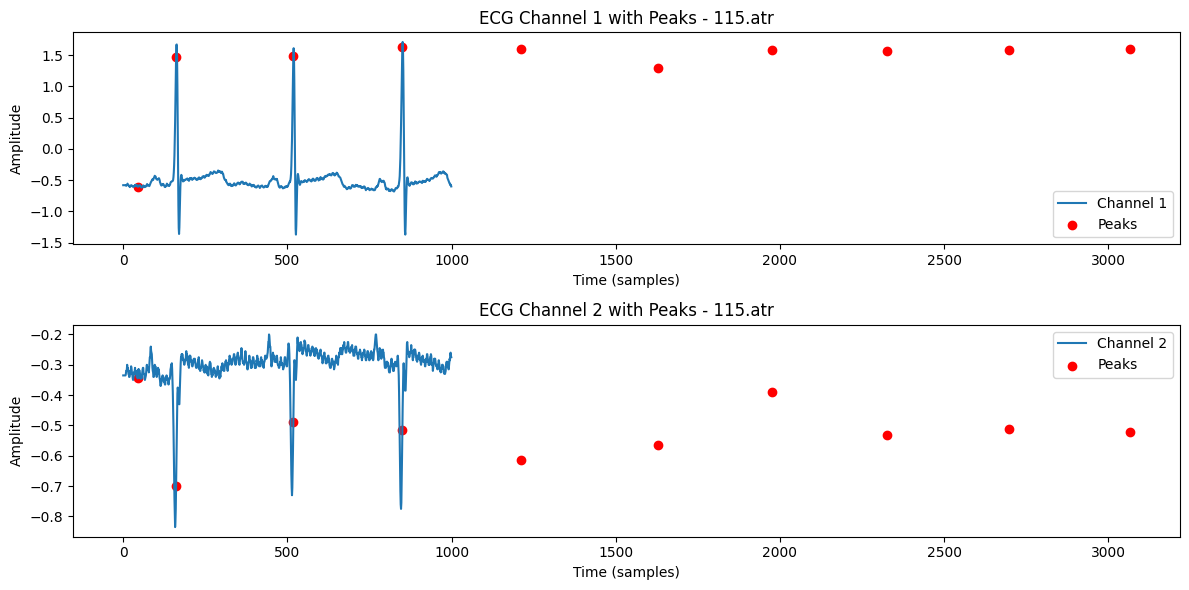

In [18]:
# importing all the libraries i need to use
import wfdb #waveform data base (writes ECG data - find source again to cite?
import numpy as np
import os
import matplotlib.pyplot as plt #plotting library

# Set the directory where the signals are stored
data_directory = '/Users/madalynneufeld/Desktop/RIC 2002 /data/mit-bih-arrhythmia-database-1.0.0 2/'
files = os.listdir(data_directory)

for file in files: #loops the files in that list
    if file.endswith('.atr'): #file has .atr extension - .atr contains the singals - note. what are the others?
        record_name = file.split('.')[0]  # Extract base name from .atr file
        
        try:
            # Load ECG record and annotations
            record = wfdb.rdrecord(os.path.join(data_directory, record_name))
            annotation = wfdb.rdann(os.path.join(data_directory, record_name), 'atr')
            
            # Extract both channels of the ECG signal (we have 2 channel signals)
            ecg_signal_channel_1 = record.p_signal[:, 0]  # Channel 1
            ecg_signal_channel_2 = record.p_signal[:, 1]  # Channel 2
            
            # Annotated peak indices
            peak_indices = annotation.sample  # Indices of the annotated peaks
            
            # Print peak indices for inspection
            print(f"Peaks for {file}: {peak_indices}")
            
            # Plot the first 1000 samples for both channels
            plt.figure(figsize=(12, 6))  # Create a figure with larger size
            plt.subplot(2, 1, 1)  # Plot channel 1 on top
            plt.plot(ecg_signal_channel_1[:1000], label="Channel 1")
            plt.scatter(peak_indices[:10], ecg_signal_channel_1[peak_indices[:10]], color='red', label="Peaks")
            plt.title(f"ECG Channel 1 with Peaks - {file}")
            plt.xlabel("Time (samples)")
            plt.ylabel("Amplitude")
            plt.legend()
            
            plt.subplot(2, 1, 2)  # Plot channel 2 below
            plt.plot(ecg_signal_channel_2[:1000], label="Channel 2")
            plt.scatter(peak_indices[:10], ecg_signal_channel_2[peak_indices[:10]], color='red', label="Peaks")
            plt.title(f"ECG Channel 2 with Peaks - {file}")
            plt.xlabel("Time (samples)")
            plt.ylabel("Amplitude")
            plt.legend()
            
            plt.tight_layout()  # To prevent overlapping of the plots
            plt.show()

        except Exception as e:
            # Handle any errors during processing
            print(f"Error processing {file}: {e}")
